<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Select only residential homes.  
house_df = house[house['MSZoning'] != 'C (all)']

In [6]:
house_df = house_df[house_df['MSZoning'] !='FV']

Doing Fillna Alley column with none!
    #house_df['Alley'].unique()
    #house_df['Alley'].fillna('none', inplace=True)
Dropping all the below columns as they are too many nulls.

In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1459
Data columns (total 81 columns):
Id               1385 non-null int64
MSSubClass       1385 non-null int64
MSZoning         1385 non-null object
LotFrontage      1134 non-null float64
LotArea          1385 non-null int64
Street           1385 non-null object
Alley            65 non-null object
LotShape         1385 non-null object
LandContour      1385 non-null object
Utilities        1385 non-null object
LotConfig        1385 non-null object
LandSlope        1385 non-null object
Neighborhood     1385 non-null object
Condition1       1385 non-null object
Condition2       1385 non-null object
BldgType         1385 non-null object
HouseStyle       1385 non-null object
OverallQual      1385 non-null int64
OverallCond      1385 non-null int64
YearBuilt        1385 non-null int64
YearRemodAdd     1385 non-null int64
RoofStyle        1385 non-null object
RoofMatl         1385 non-null object
Exterior1st      1385 non-n

In [9]:
house_df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [7]:

house_df = house_df.drop('Alley',axis=1)

In [8]:
#Setting row 1379 Electrical same as row 1378
house_df.loc[1379,'Electrical']=house_df.loc[1378,'Electrical']

In [9]:
house_df['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'], dtype=object)

In [10]:
house_df['LotFrontage'].fillna(house_df['LotFrontage'].mean(), inplace=True)

In [11]:
house_df['LotFrontage'].isnull().sum()

0

In [39]:
house_df['PSF'] = house_df['SalePrice']/house_df['GrLivArea']

In [40]:
house_df['Age'] = house_df['YrSold'] - house_df['YearBuilt']

# EDA - Distribution of sales prices

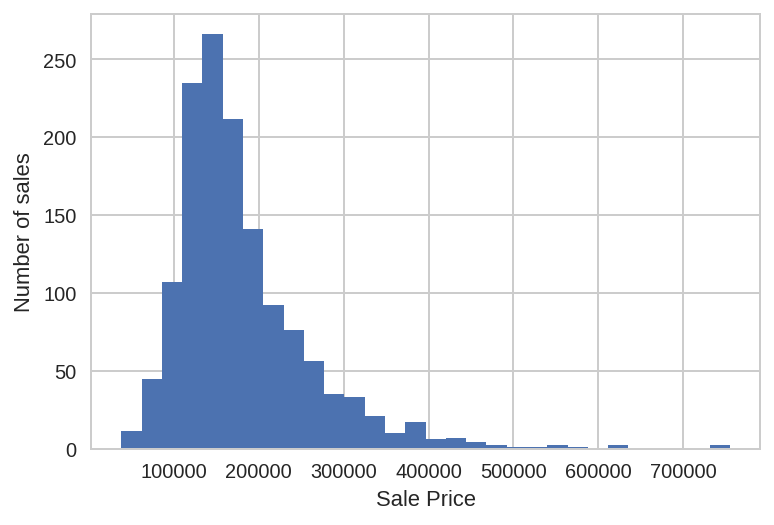

In [41]:
plt.hist(house_df['SalePrice'], bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Number of sales")
plt.show()

# Sales prices, by living area
There is a relationship between sales price and above ground living area. Some outliers are present in the data.

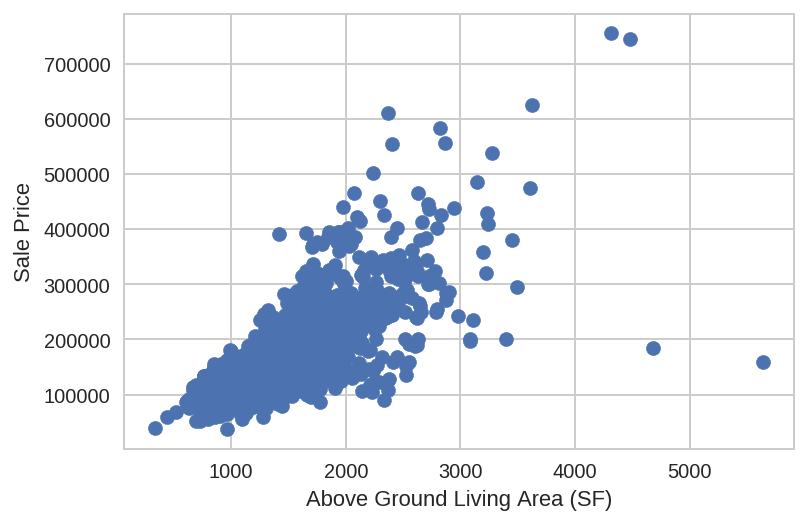

In [42]:
plt.scatter(house_df['GrLivArea'], house_df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above Ground Living Area (SF)')
plt.show()

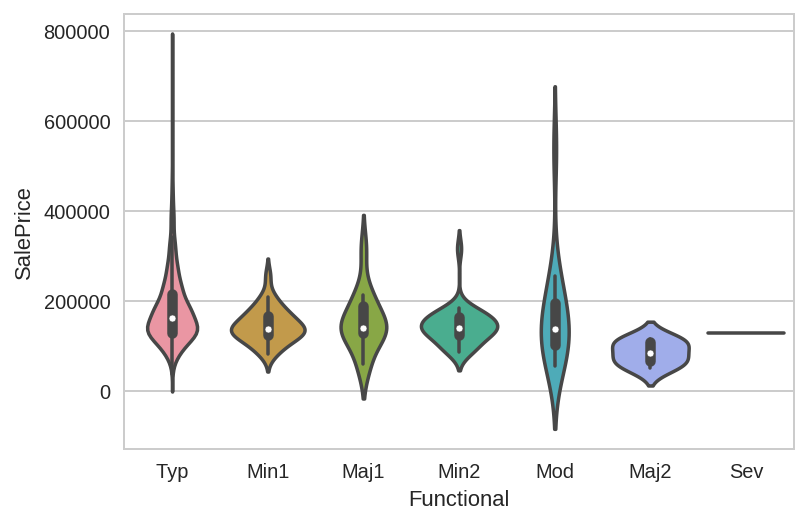

In [43]:
#Home Functionality
sns.violinplot('Functional', 'SalePrice', data = house_df)
plt.show()

# Price per square foot
It's useful to look at price per square foot, a typically used metric. The majority of sales in Ames, Iowa during the time period were focused around a price of roughly $125 per square foot.


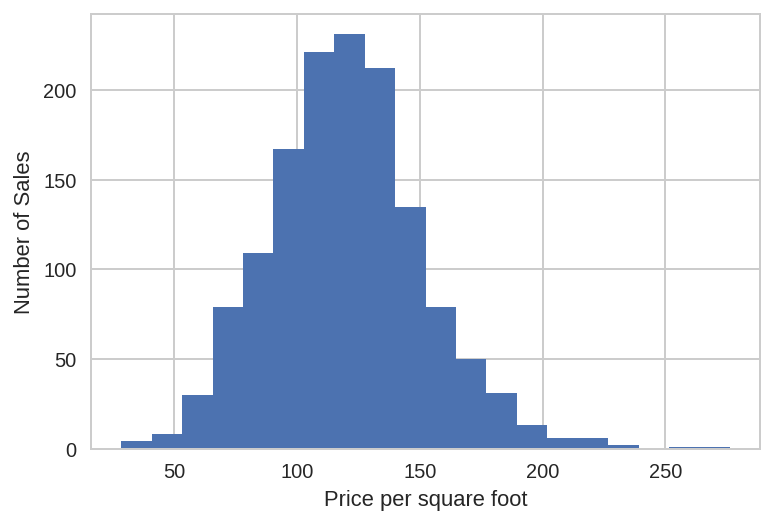

In [44]:
house_df['PSF'] = house_df['SalePrice']/house_df['GrLivArea']
plt.hist(house_df['PSF'], bins=20)
plt.ylabel('Number of Sales')
plt.xlabel('Price per square foot')
plt.show()

# Price per square foot, by year sold
It's somewhat surprising that the median price per square foot did not change over the time period, which included the mortgage crisis and great recession. The median is heavily influenced by volume of sales in the NWAmes neighborhood which had the highest volume of sales.

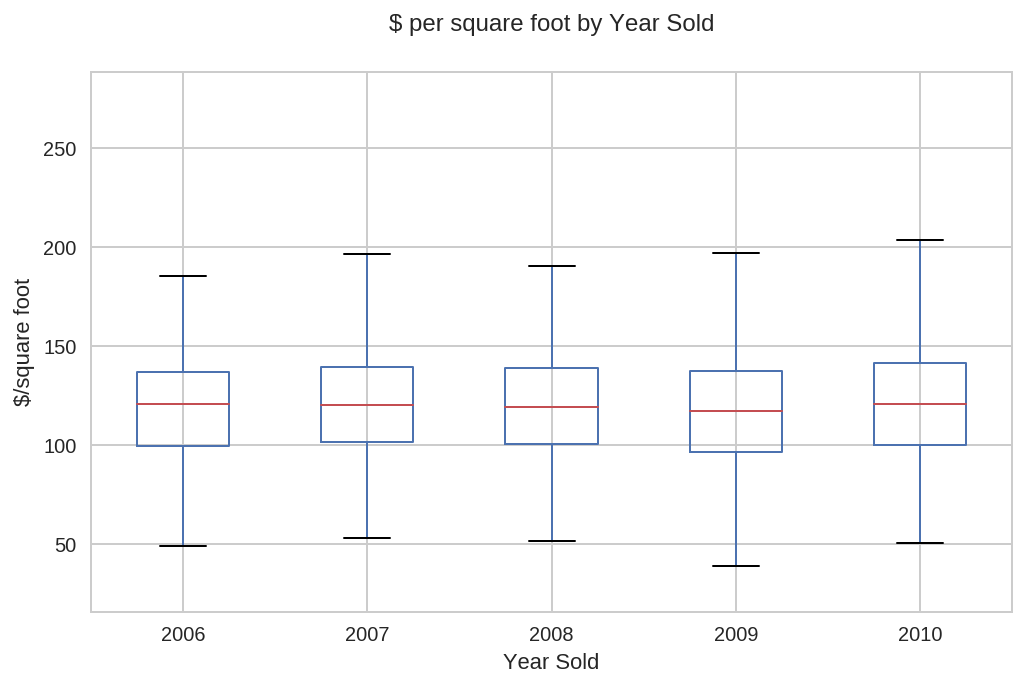

In [45]:
house_df.boxplot(column=['PSF'], by=['YrSold'], figsize=(8,5))
plt.suptitle('$ per square foot by Year Sold')
plt.title('')
plt.ylabel('$/square foot')
plt.xlabel('Year Sold')
plt.show()

# Home Age
Price per square foot appears to trend down with the age of the home, as expected.

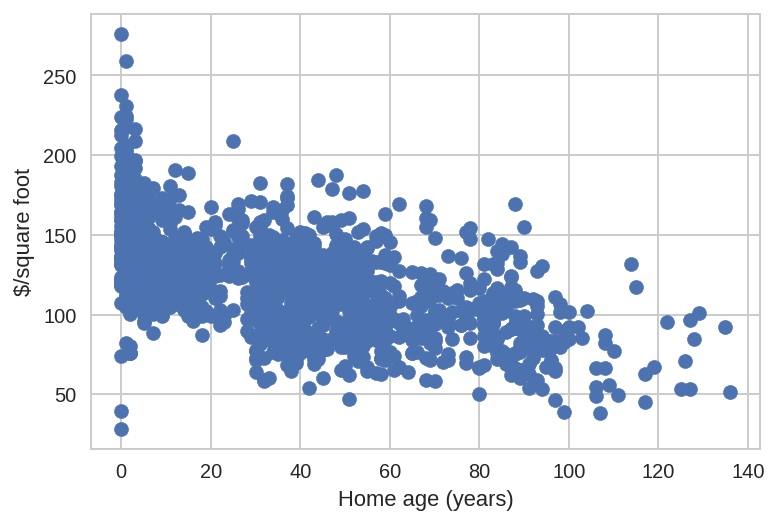

In [46]:
house_df['Age'] = house_df['YrSold'] - house_df['YearBuilt']
plt.scatter(house_df['Age'], house_df['PSF'])
plt.ylabel('$/square foot')
plt.xlabel('Home age (years)')
plt.show()

# Price per square foot, by neighborhood
Location matters. Data from 2009, the year of highest volume of sales, is used in order to reduce the influence of varying market conditions across years.

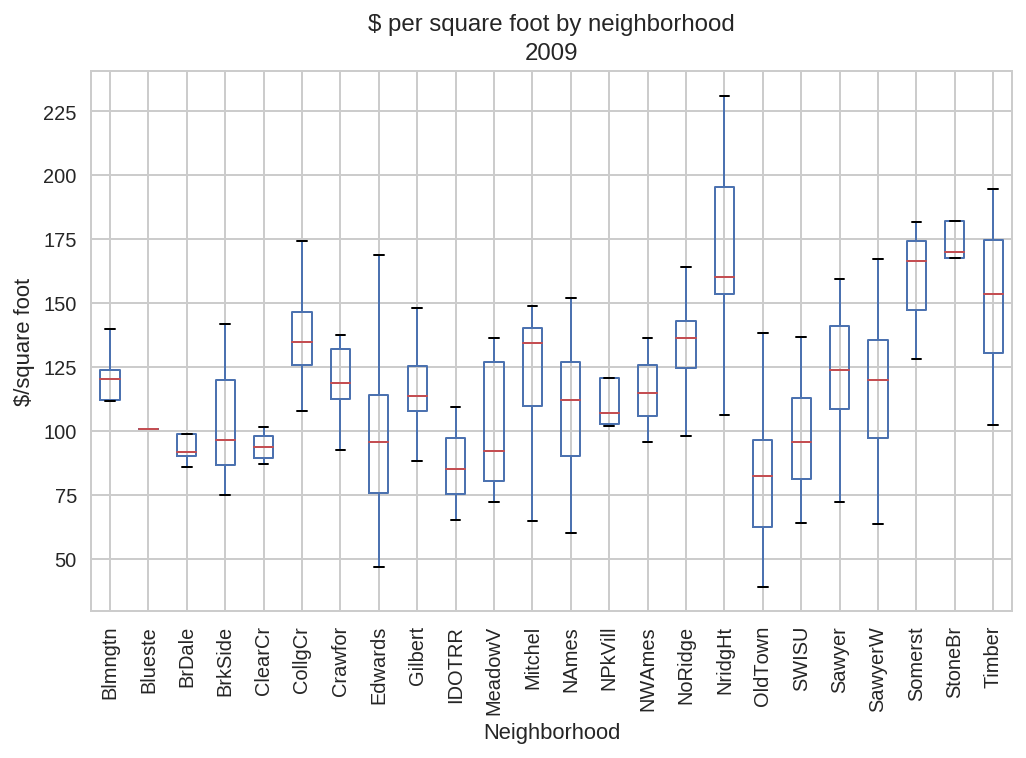

In [47]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['Neighborhood'], figsize=(8,5), rot=90)
plt.suptitle('$ per square foot by neighborhood')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Neighborhood')
plt.show()

# Price per square foot, by building type
Single family dwellings and townhome end units sold at higher prices per square foot.

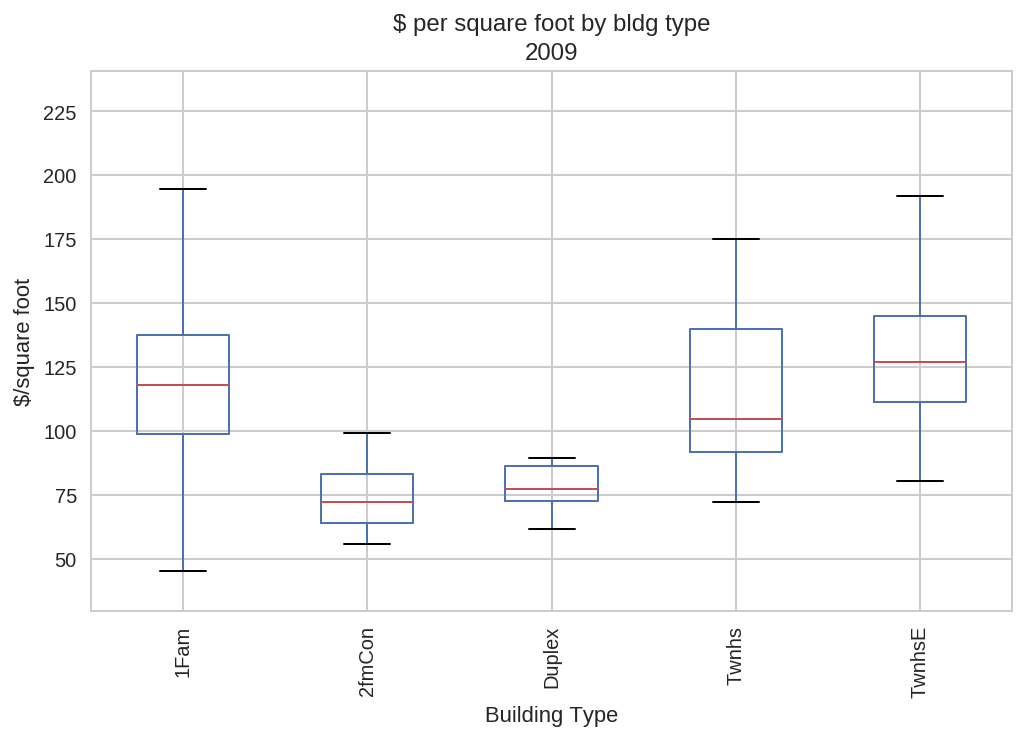

In [48]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['BldgType'], figsize=(8,5), rot=90)
plt.suptitle('$ per square foot by bldg type')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Building Type')
plt.show()

# Price per square foot, by number of bedrooms
All else being equal, homes in larger size categories typically sell for lower psf - the boxplot may reflect this.



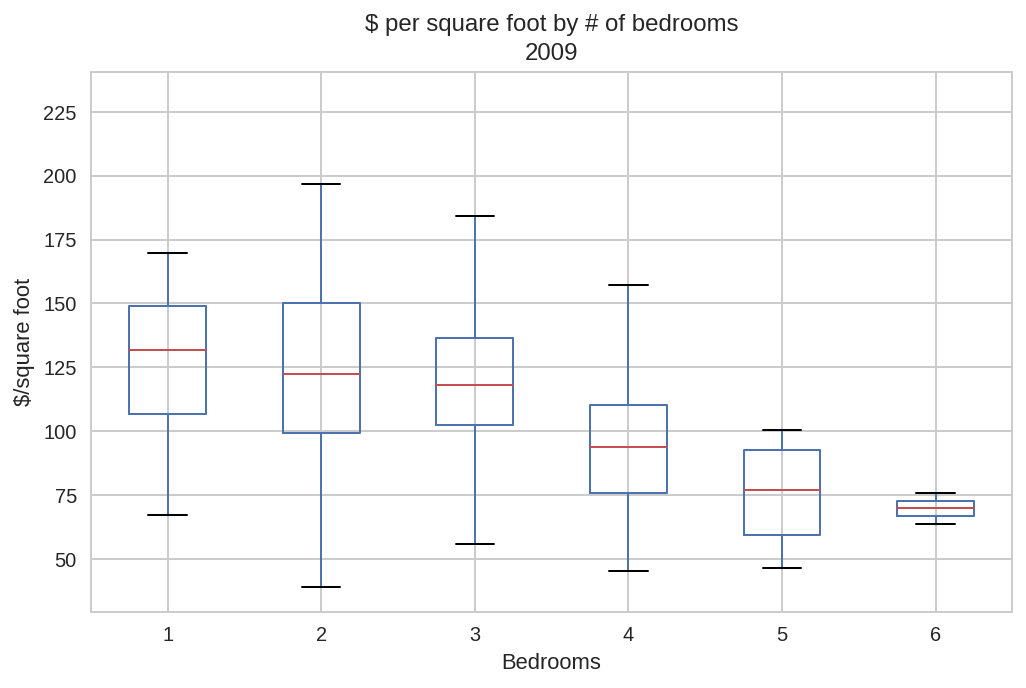

In [49]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['BedroomAbvGr'], figsize=(8,5))
plt.suptitle('$ per square foot by # of bedrooms')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Bedrooms')
plt.show()

# Price per square foot, by overall quality
Sales price appears to reflect quality to some degree.

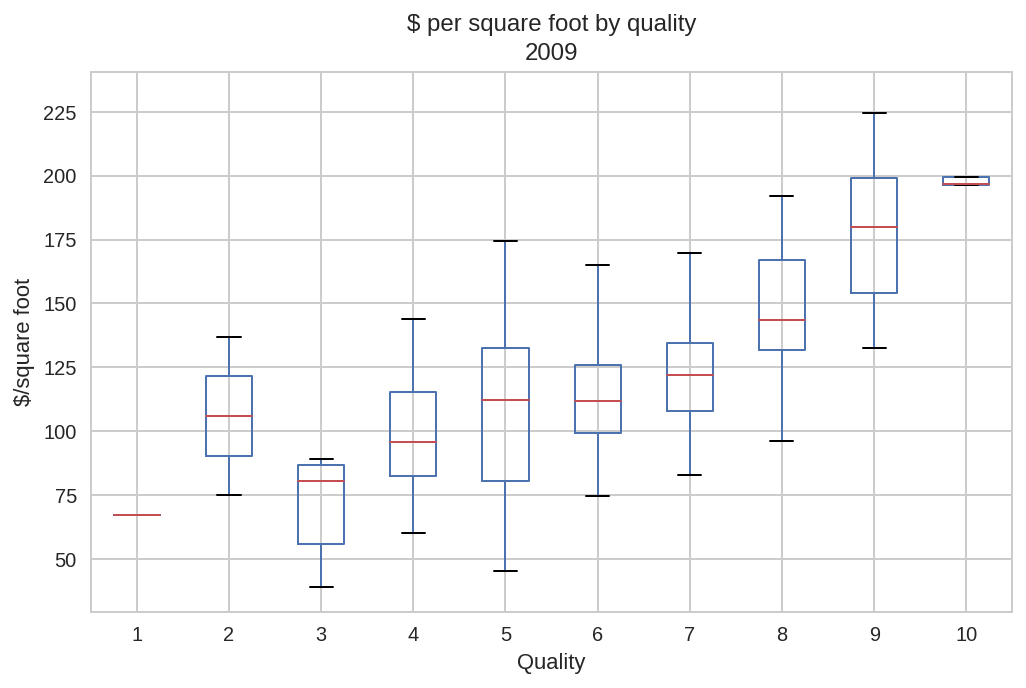

In [50]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['OverallQual'], figsize=(8,5))
plt.suptitle('$ per square foot by quality')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Quality')
plt.show()

# Price per square foot, by overall condition
The influence of overall condition is evident to a lesser degree.

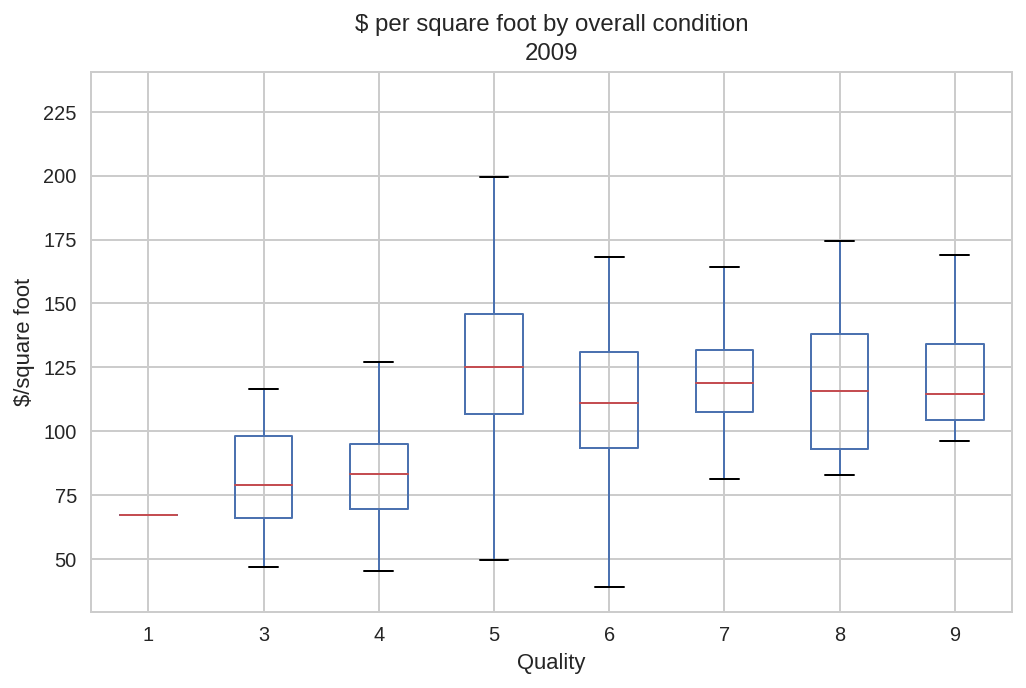

In [51]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['OverallCond'], figsize=(8,5))
plt.suptitle('$ per square foot by overall condition')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Quality')
plt.show()

# Price per square foot, by functionality rating
The functionality rating of most homes was considered typical. The limited data reflects expected lower prices for homes with inferior ratings.

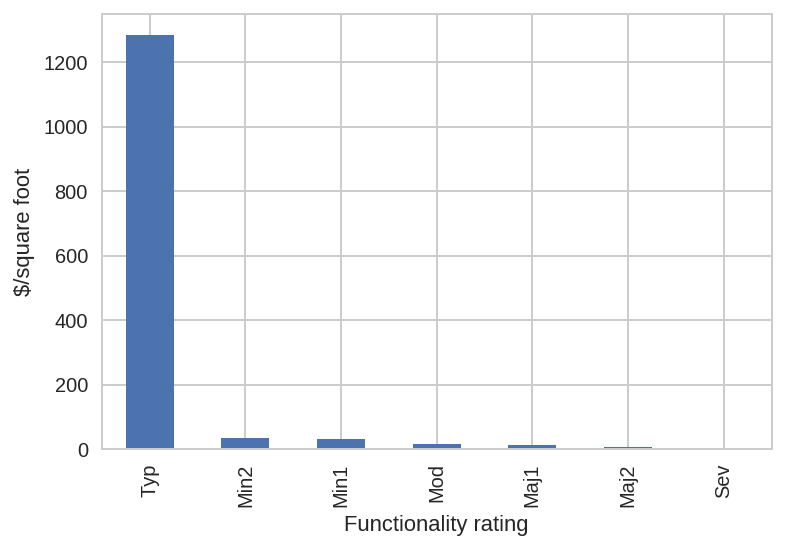

In [52]:
house_df['Functional'].value_counts().plot(kind='bar')
plt.ylabel('$/square foot')
plt.xlabel('Functionality rating')
plt.show()

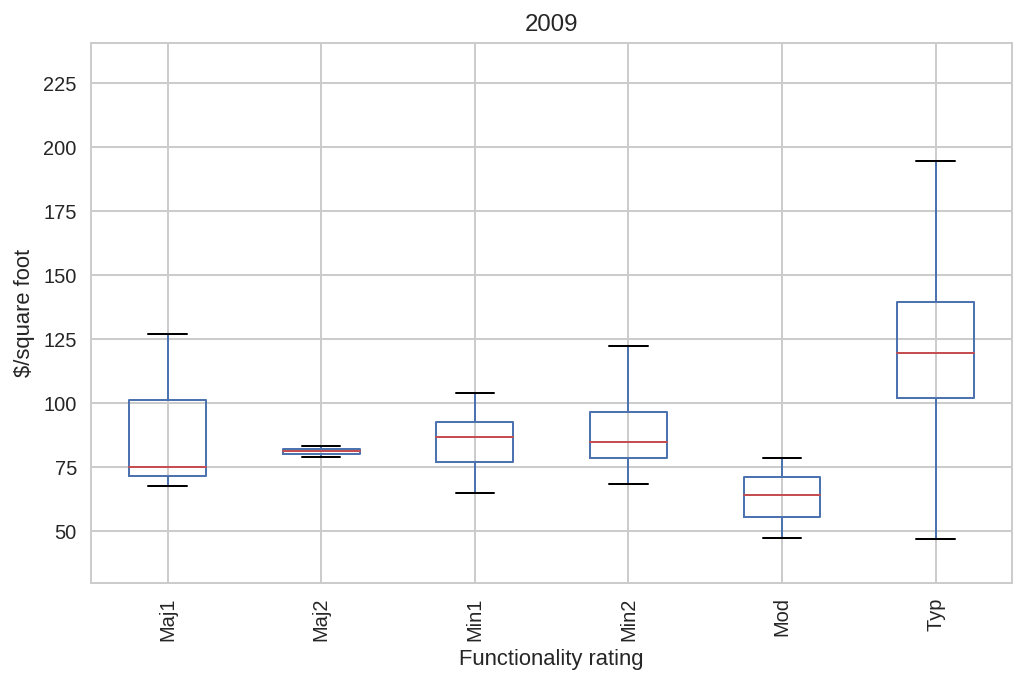

In [53]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['Functional'], figsize=(8,5), rot=90)
plt.suptitle('')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Functionality rating')
plt.show()

# Price per square foot, by sale condition
Most sales are considered normal. It appears that partial sales have higher per square foot prices.

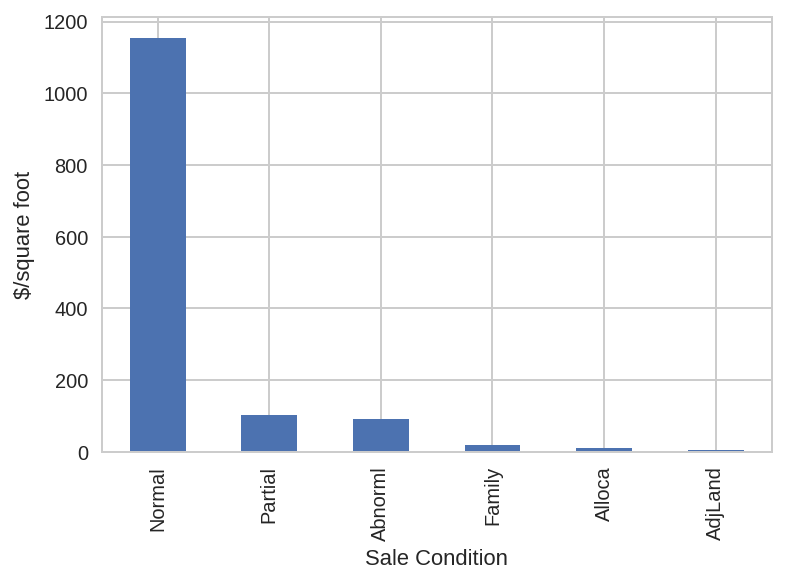

In [54]:
house_df['SaleCondition'].value_counts().plot(kind='bar')
plt.ylabel('$/square foot')
plt.xlabel('Sale Condition')
plt.show()

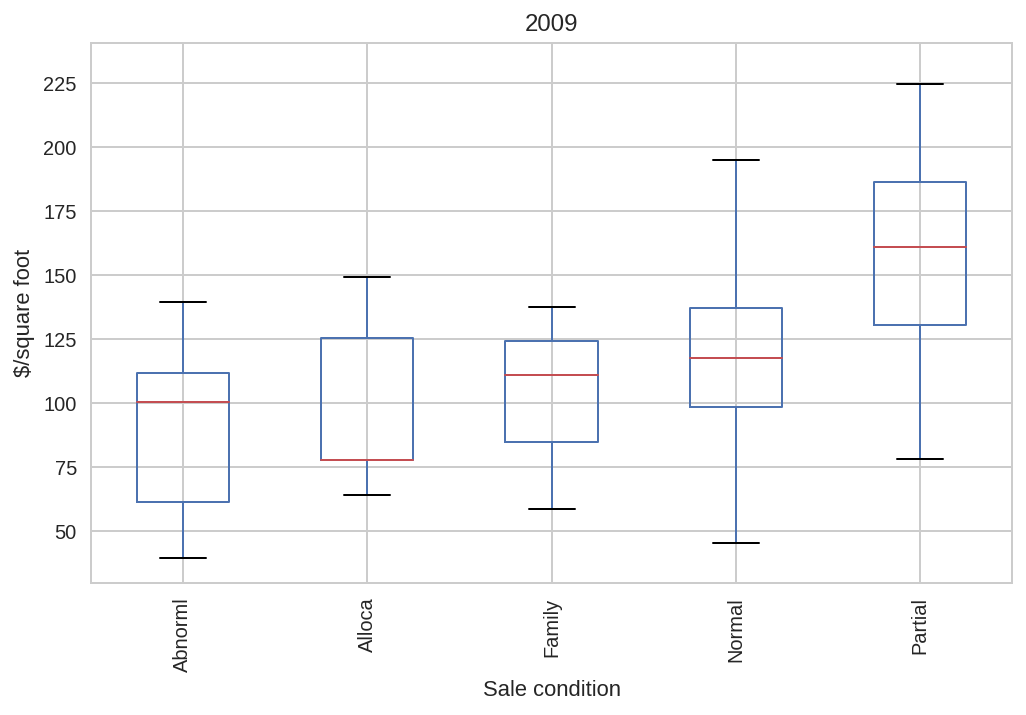

In [55]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['SaleCondition'], figsize=(8,5), rot=90)
plt.suptitle('')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Sale condition')
plt.show()

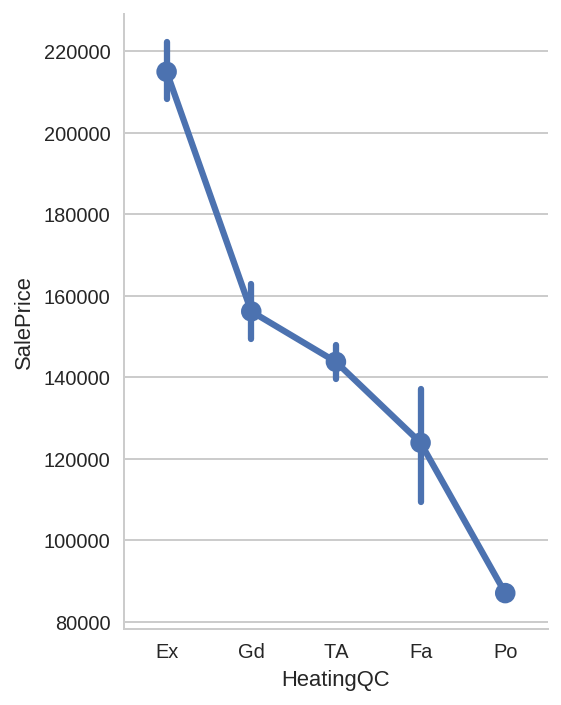

In [56]:
sns.factorplot(x="HeatingQC", y="SalePrice", data=house_df,size=5, aspect=.8)

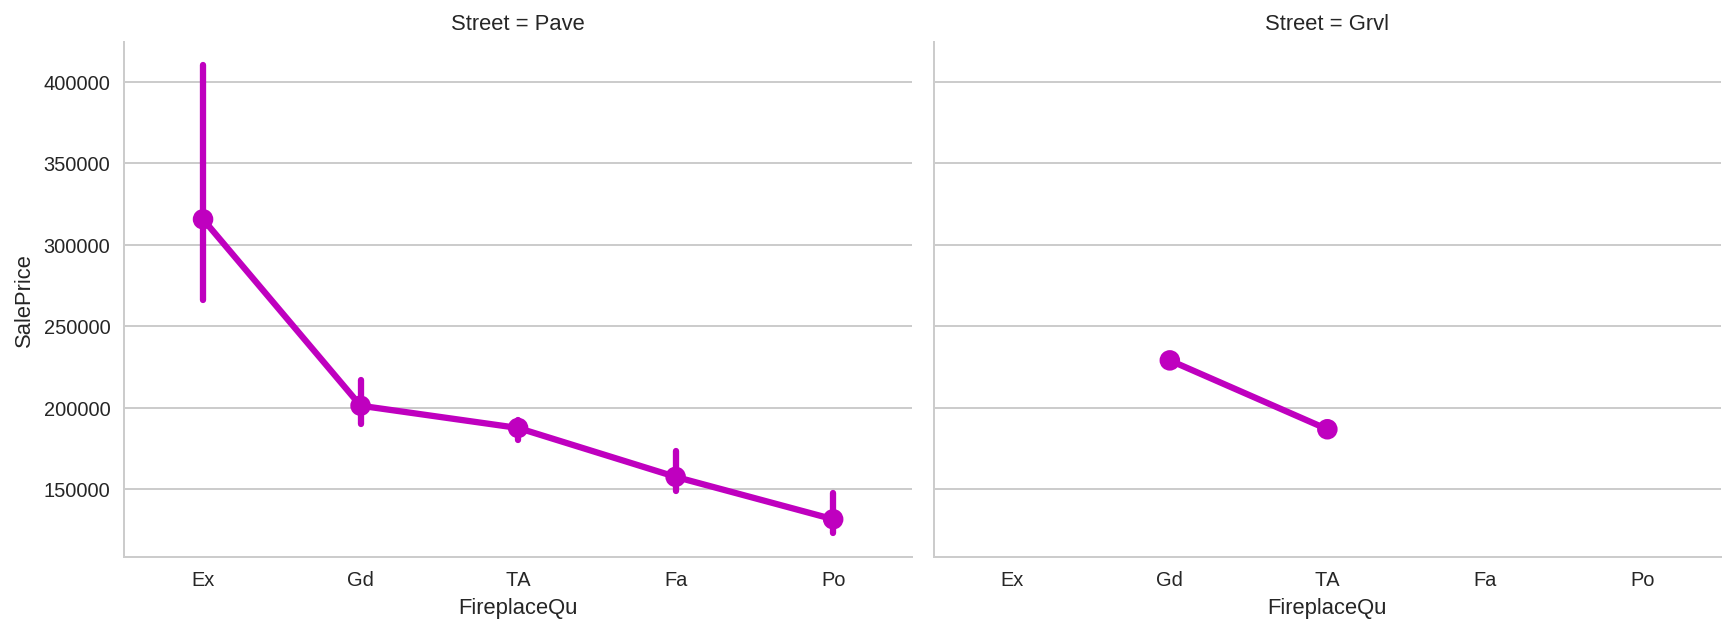

In [57]:
sns.factorplot('FireplaceQu', 'SalePrice', data = house_df, color = 'm',col = "Street", \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

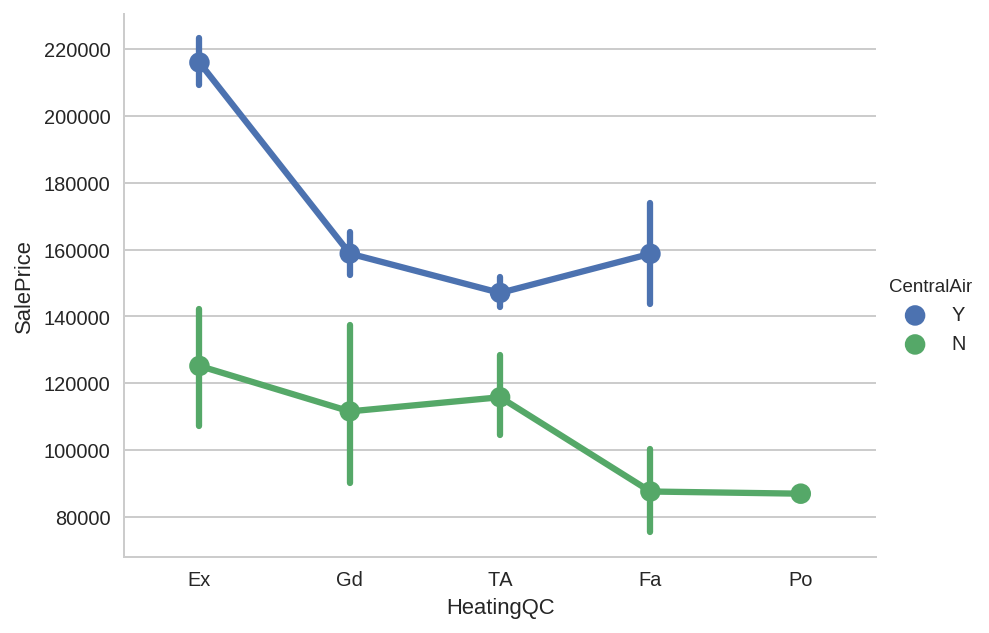

In [58]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = house_df, 
             size = 4.5, aspect = 1.4)

In [59]:
#Heating
pd.crosstab(house_df.HeatingQC, house_df.CentralAir)

CentralAir,N,Y
HeatingQC,,
Ex,7,674
Fa,24,25
Gd,13,220
Po,1,0
TA,44,377


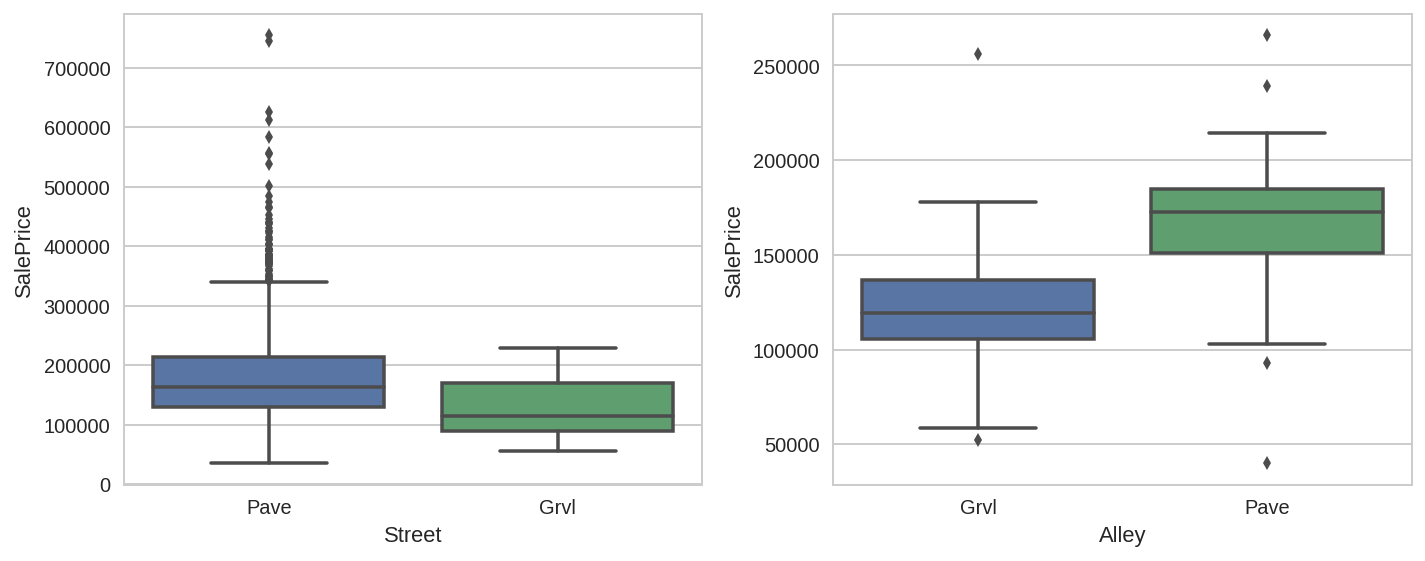

In [60]:
#Street & Alley Access
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = house, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = house, ax = ax[1])
plt.tight_layout()

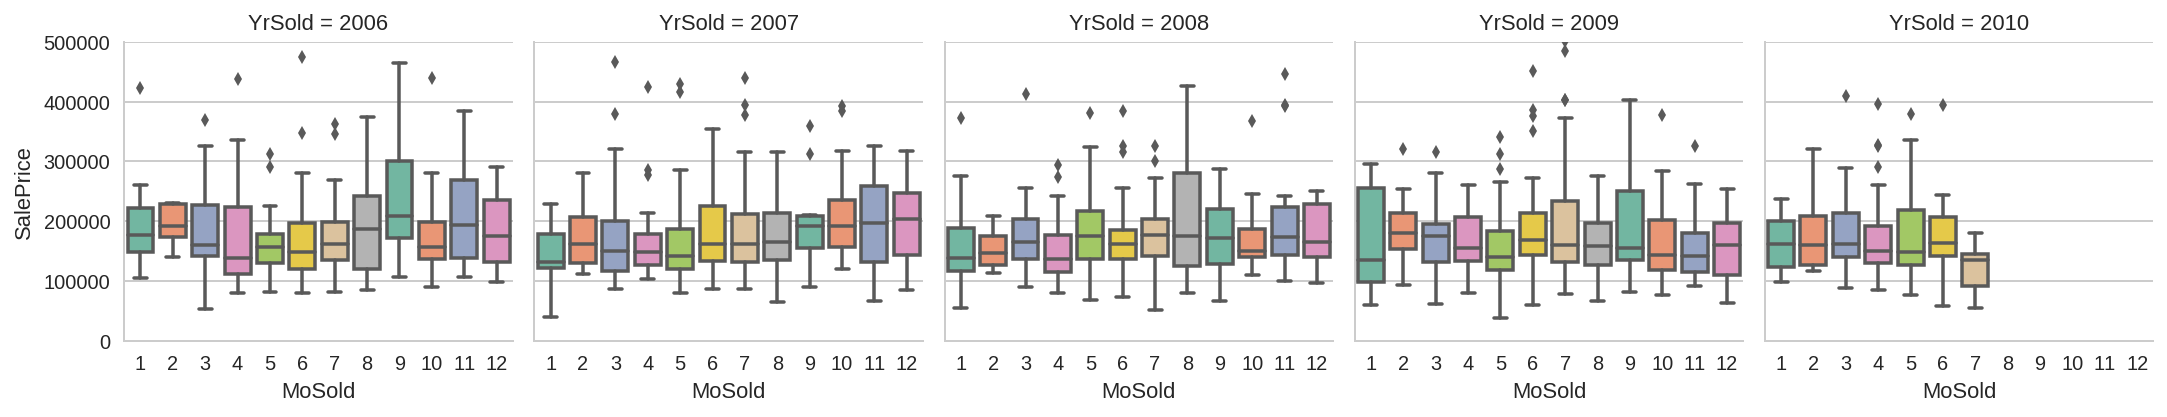

In [61]:
g = sns.FacetGrid(house_df, col = 'YrSold', col_wrap = 6)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13))\
.set(ylim = (0, 500000))
plt.tight_layout()

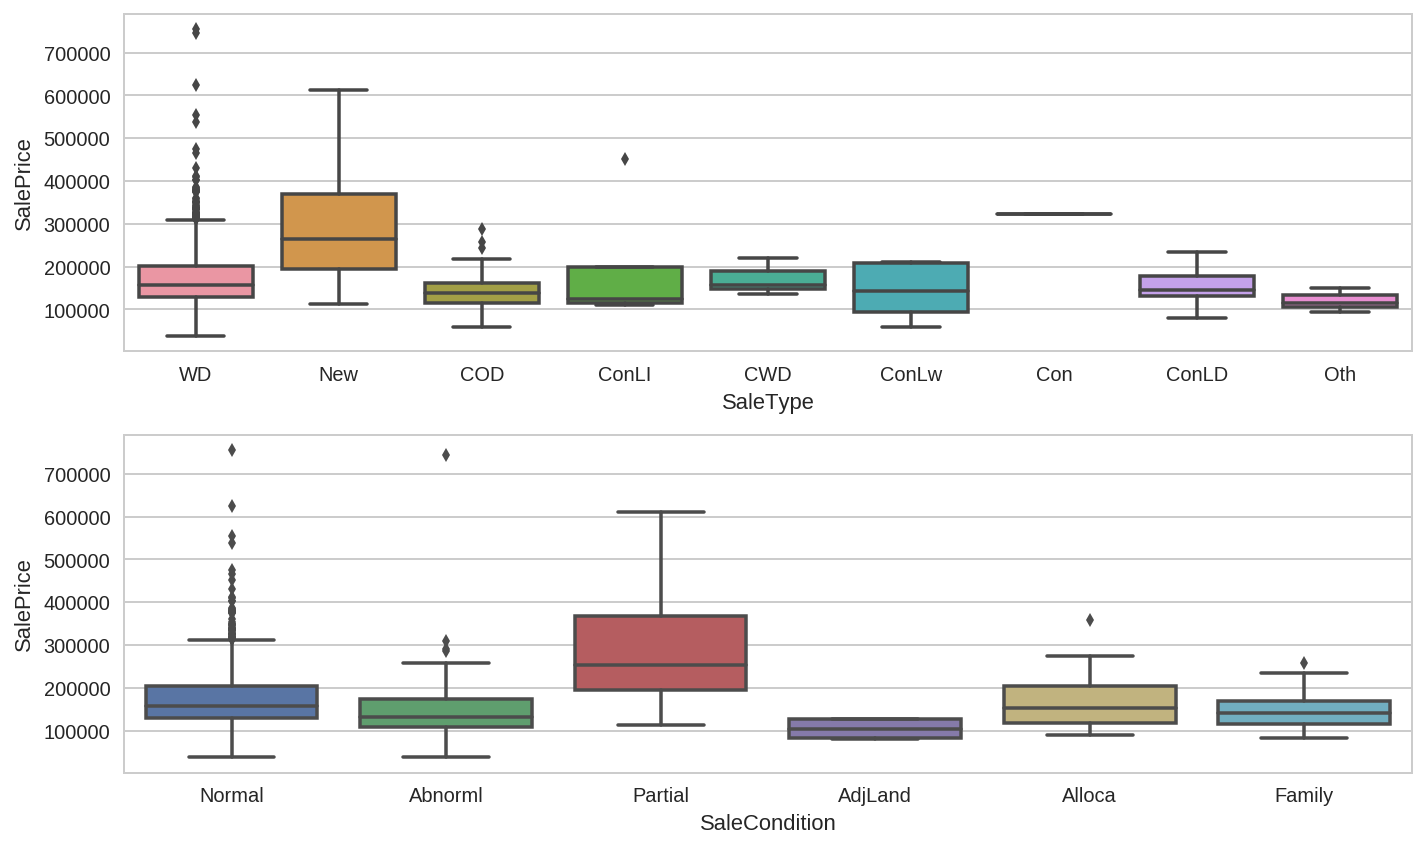

In [62]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = house_df, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house_df, ax = ax[1])
plt.tight_layout()

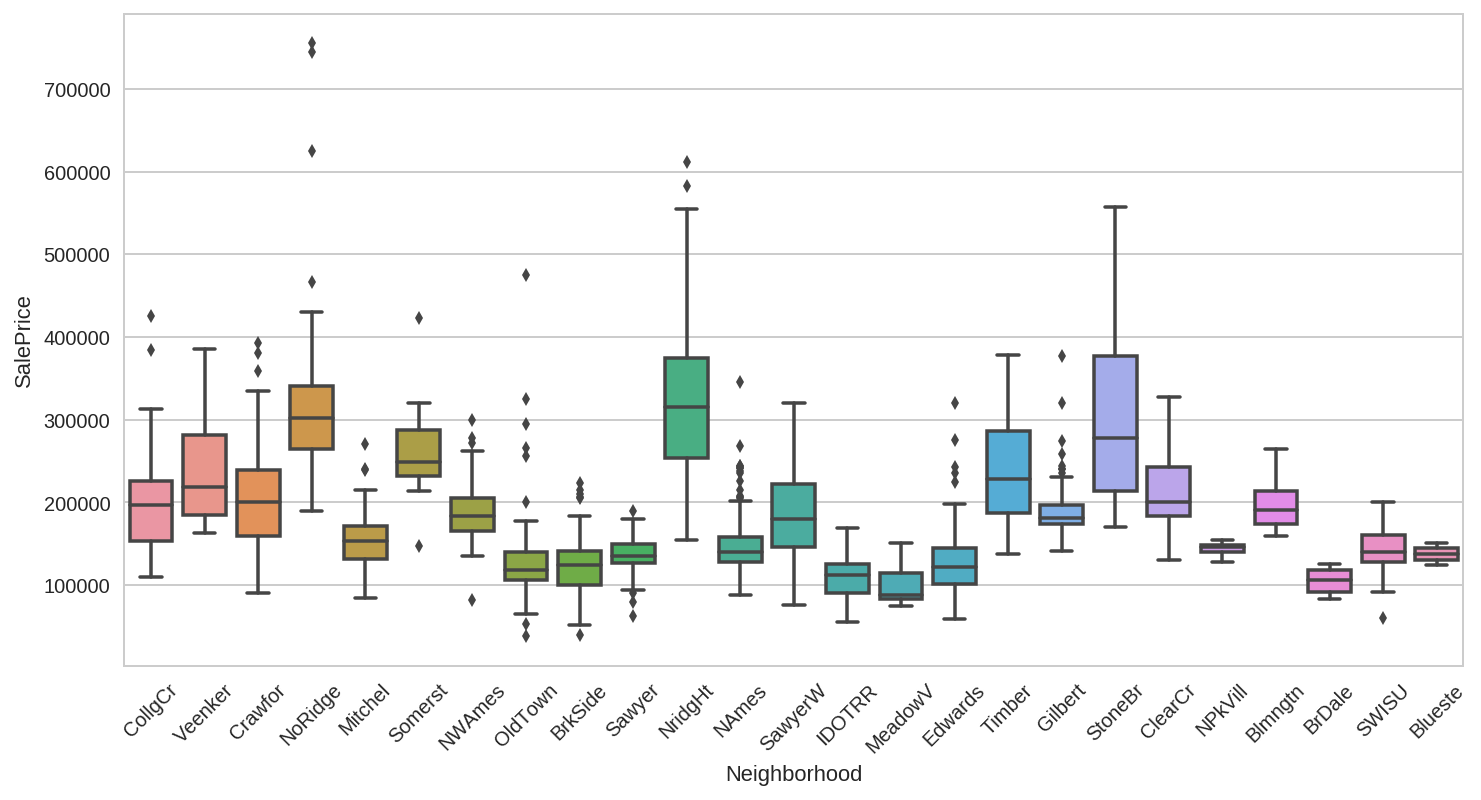

In [63]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = house_df)
xt = plt.xticks(rotation=45)

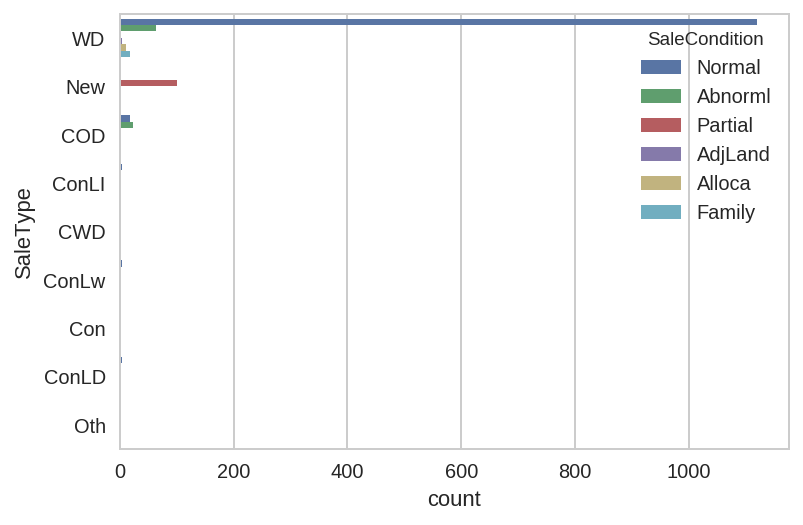

In [64]:
#Show value counts for two categorical variables:
ax = sns.countplot(y="SaleType", hue="SaleCondition", data=house_df)

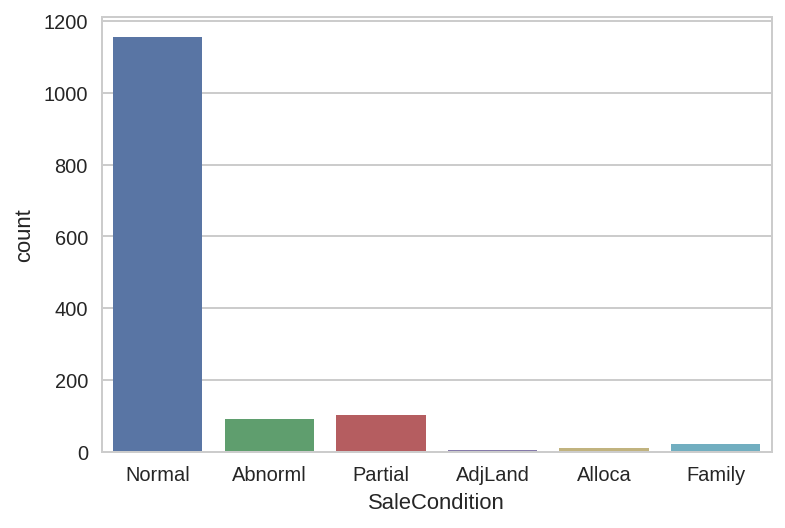

In [65]:
# Show value counts for a single categorical variable:
ax = sns.countplot(x="SaleCondition", data=house_df)

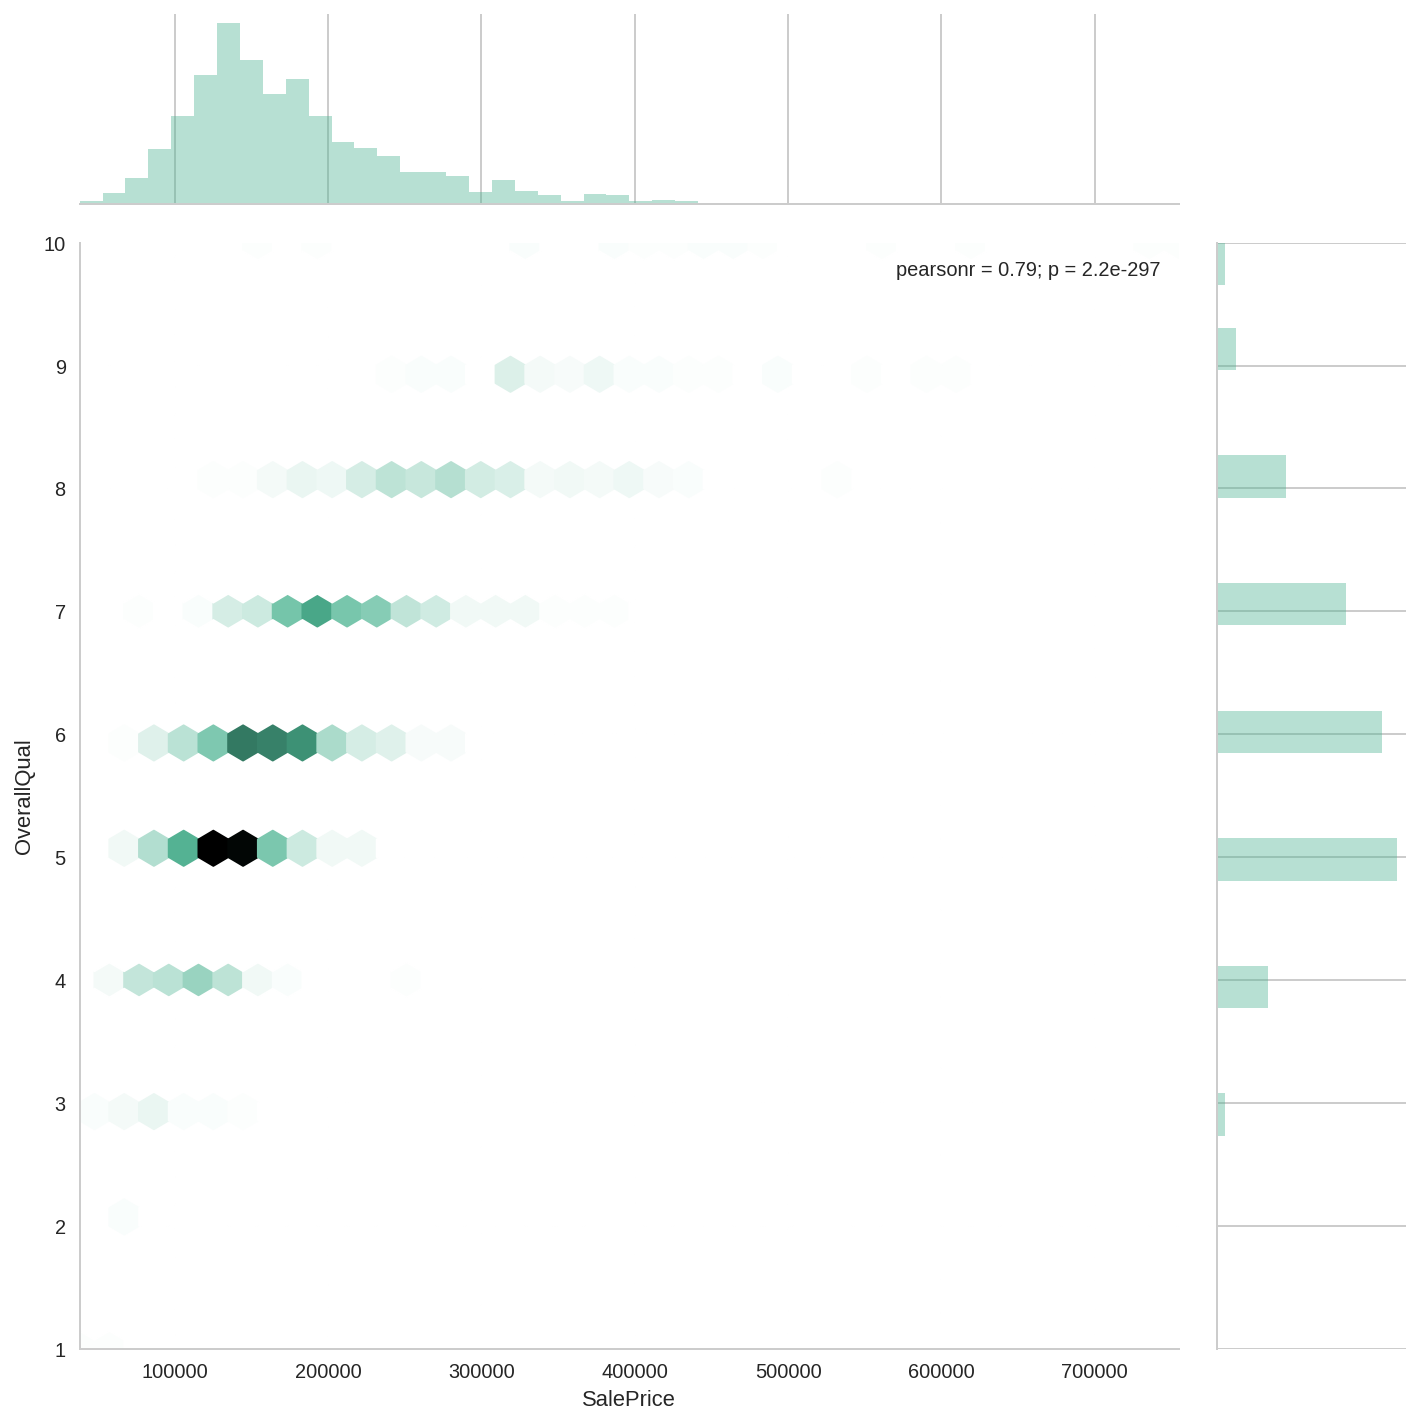

In [66]:
sns.jointplot(x="SalePrice", y="OverallQual", data=house_df, size=10, kind="hex", color="#4CB391")

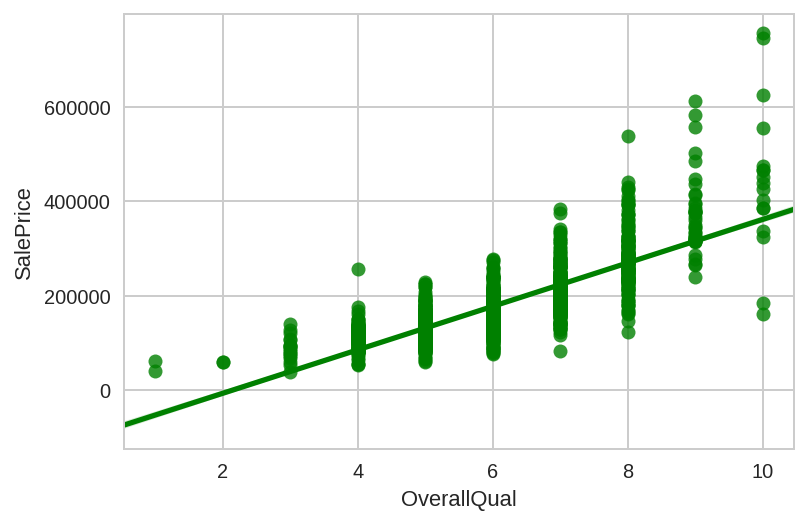

In [67]:
#Plot data and a linear regression model fit.
#Use a 68% confidence interval, which corresponds with the standard error of the estimate:
ax = sns.regplot(x = 'OverallQual', y = 'SalePrice', data = house_df, color = 'Green',ci=68)

In [68]:
fixed_df = house_df[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood',  'BldgType',
       'HouseStyle','YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl',   'Foundation',    'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
       'TotRmsAbvGrd', 'Functional', 'Fireplaces',  'GarageCars', 'GarageArea',  'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
        'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

In [69]:
fixed_df['MSSubClass'] = fixed_df['MSSubClass'].astype(object)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
#fixed_df.info().sum()

In [71]:
fixed_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [72]:
dumfixed_df = pd.get_dummies(fixed_df)

In [73]:
X_train = dumfixed_df[dumfixed_df['YrSold'] != 2010]

In [74]:
y_train = house_df[['SalePrice', 'YrSold']]

In [75]:
y_train = y_train[y_train['YrSold'] != 2010]['SalePrice']

Mike's suggestion for y_train

    y_train = house_df[house_df['YrSold'] != 2010]['SalePrice']

In [76]:
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [77]:
X_train.shape

(1221, 165)

In [78]:
y_train.shape

(1221,)

In [79]:
X_test = dumfixed_df[dumfixed_df['YrSold'] == 2010]

In [80]:
y_test =  house_df[['SalePrice', 'YrSold']]

In [81]:
y_test = y_test[y_test['YrSold'] == 2010]['SalePrice']

In [82]:
y_test.head()

16    149000
24    154000
26    134800
27    306000
33    165500
Name: SalePrice, dtype: int64

In [83]:
X_test.shape

(164, 165)

In [84]:
y_test.shape

(164,)

In [85]:
X_train['LotFrontage'].mean()

70.405076071742741

In [86]:
#X_train.isnull().sum().sort_values(ascending=False)

# Solution 1

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification, make_regression
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

## Modeling with Random Forest Regressor

If you get that weird warning from Lasso(), try increasing alpha before max_iter. 

In [60]:
#Setting up the pipe
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sfm', SelectFromModel(Lasso(max_iter=100000))),
    ('rfr', RandomForestRegressor())
])

#Setting up the params
rf_params = {
    'rfr__n_estimators':range(10,50, 10),
    'sfm__threshold': [.01, .05, .1],
    'rfr__max_depth':[1,5,10,20,25,30,None],
    'rfr__max_features':['auto','log2']
}

In [61]:
# Using Grid Search
rfgs = GridSearchCV(rf_pipe,rf_params,cv=5, n_jobs=-1)

In [62]:
# Fitting Random Forest regressor with Grid Search
rfgs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sfm', SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=Fal...timators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'rfr__n_estimators': range(10, 50, 10), 'sfm__threshold': [0.01, 0.05, 0.1], 'rfr__max_depth': [1, 5, 10, 20, 25, 30, None], 'rfr__max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [63]:
rfgs.best_params_

{'rfr__max_depth': None,
 'rfr__max_features': 'auto',
 'rfr__n_estimators': 30,
 'sfm__threshold': 0.1}

In [64]:
rfgs.score(X_train,y_train)

0.9742117156801765

# $R^2$

In [70]:
rfgs_score = rfgs.score(X_test,y_test)

In [73]:
rfgs_score

0.86560715873632177

In [66]:
sfm_mask = rfgs.best_estimator_.named_steps['sfm'].get_support()
sfm_mask.sum()

142

In [67]:
y_pred_rfgs = rfgs.predict(X_test)

# RMSE or MSE

In [87]:
RMSE_rfgs = np.sqrt(mean_squared_error(y_test,y_pred_rfgs))
RMSE_rfgs

29675.274901833858

# Mean Absolute Error (MAE_fixed)

In [75]:
MAE_rfgs = abs(y_pred_rfgs - y_test).mean()
MAE_rfgs

19793.932723577236

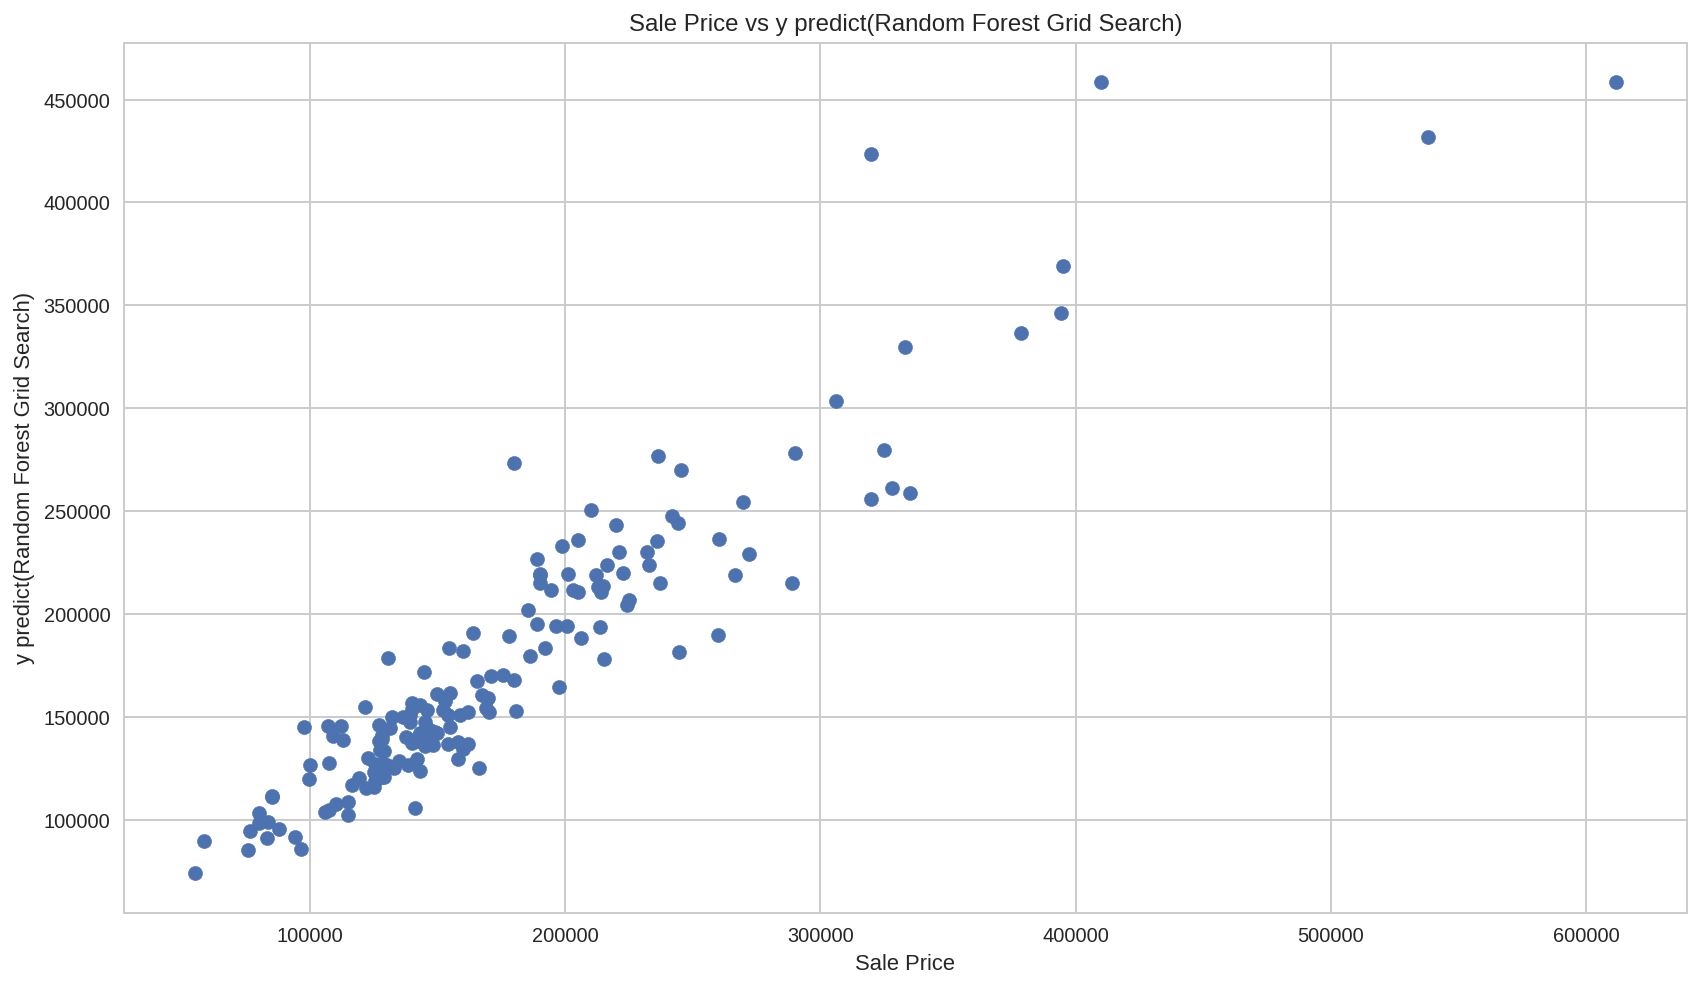

In [68]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,y_pred_rfgs)
plt.title('Sale Price vs y predict(Random Forest Grid Search)')
plt.xlabel('Sale Price')
plt.ylabel('y predict(Random Forest Grid Search)')
plt.show()

In [69]:
rfgs.best_params_

{'rfr__max_depth': None,
 'rfr__max_features': 'auto',
 'rfr__n_estimators': 30,
 'sfm__threshold': 0.1}

### Running without gridsearch to obtain important features.

In [94]:
model = RandomForestRegressor(n_estimators =100, oob_score = True)

In [95]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [96]:
 model.score(X_train,y_train)

0.9766309062502706

# $R^2$

In [100]:
rfwo_gsore = model.score(X_test,y_test)
rfwo_gsore

0.88251516477540282

In [101]:
y_pred_model = model.predict((X_test))

# RMSE or MSE

In [102]:
RMSE_model = np.sqrt(mean_squared_error(y_test,y_pred_model))
RMSE_model

27745.821568343952

# Mean Absolute Error (MAE_model)

In [108]:
MAE_model = abs(y_pred_model - y_test).mean()
MAE_model

18255.78158536585

In [109]:
feature_importances = model.feature_importances_

In [110]:
feature_imp = list(zip(X_train, feature_importances))

In [111]:
feature_imp = pd.DataFrame(feature_imp)
feature_imp.rename(columns={1:'importance',0:'column'}, inplace=True)
feature_imp = feature_imp.sort(columns='importance', ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  This is separate from the ipykernel package so we can avoid doing imports until


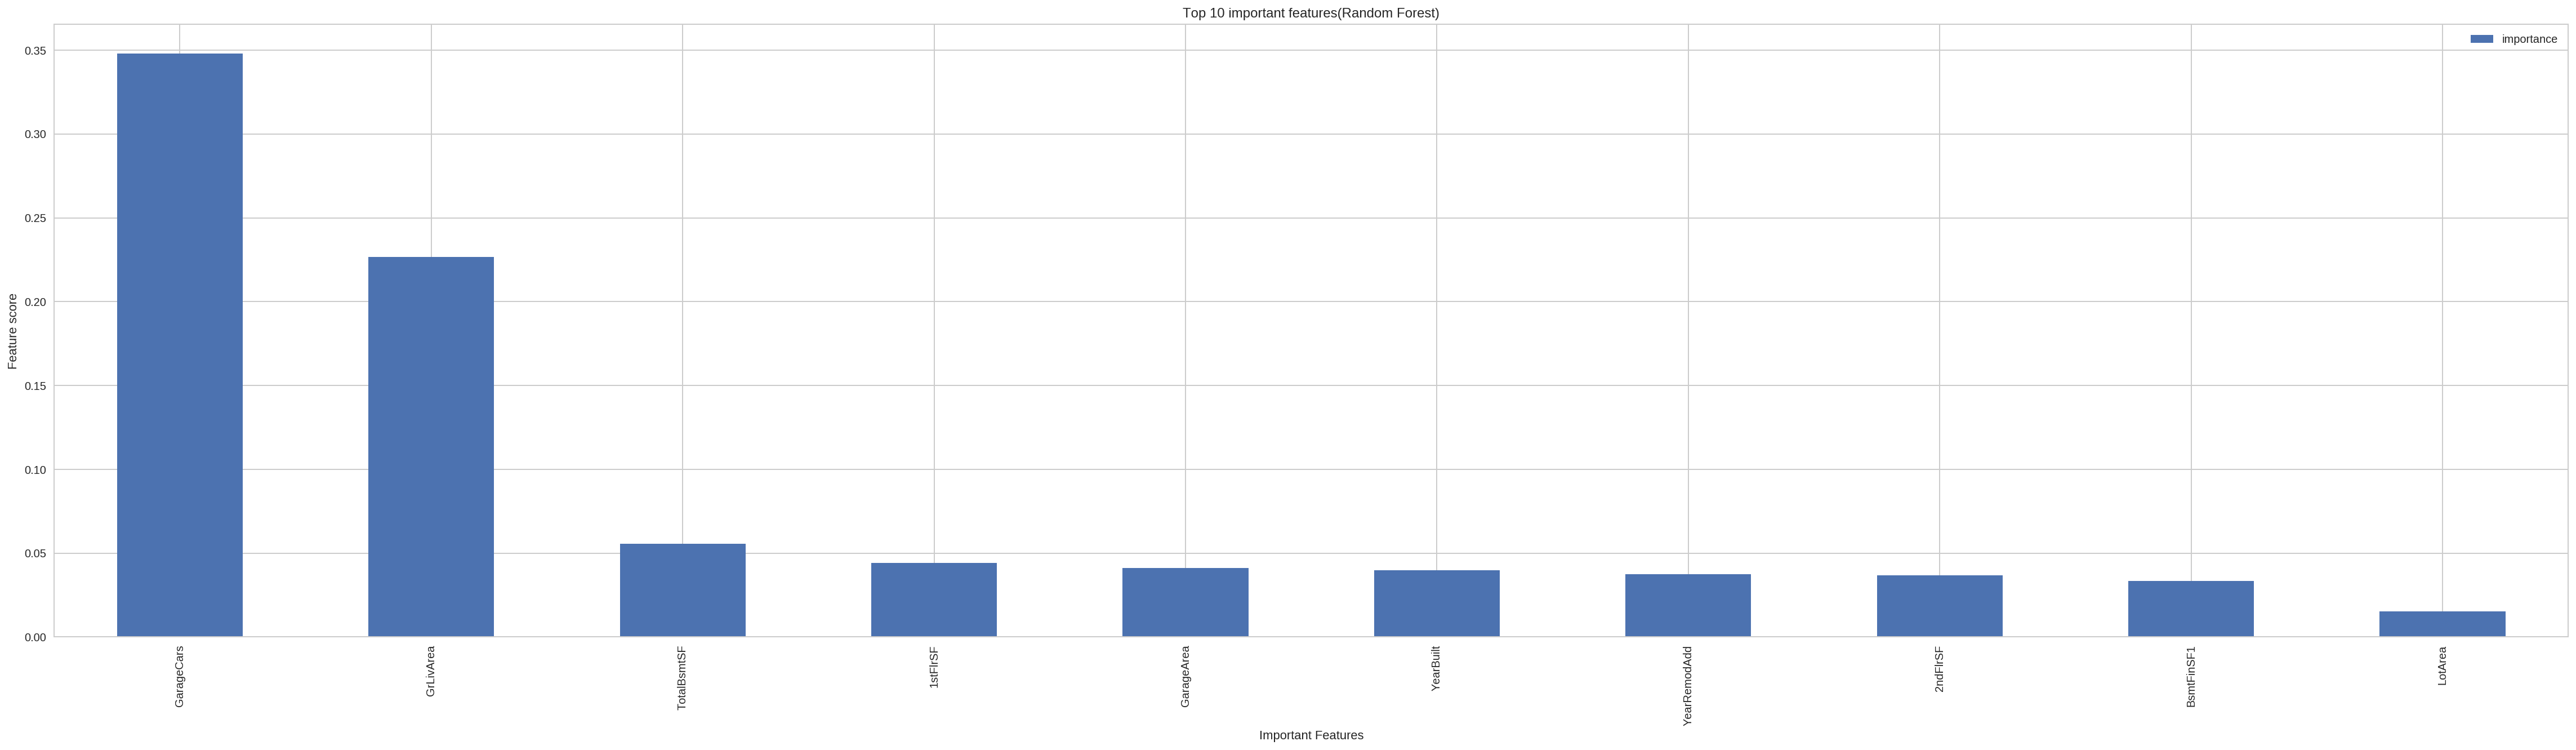

In [112]:
feature_imp.head(10).plot.bar('column','importance', figsize=(40,10))
plt.title('Top 10 important features(Random Forest)')
plt.xlabel('Important Features')
plt.ylabel('Feature score')
plt.show()

### The above plot indicates the below features as most important.


In [113]:
feature_imp.head(10)

,column,importance
20,GarageCars,0.348004
11,GrLivArea,0.226853
8,TotalBsmtSF,0.055782
9,1stFlrSF,0.044212
21,GarageArea,0.041095
3,YearBuilt,0.039933
4,YearRemodAdd,0.037547
10,2ndFlrSF,0.036916
5,BsmtFinSF1,0.033547
2,LotArea,0.015258


In [114]:
y_pred_model.shape

(164,)

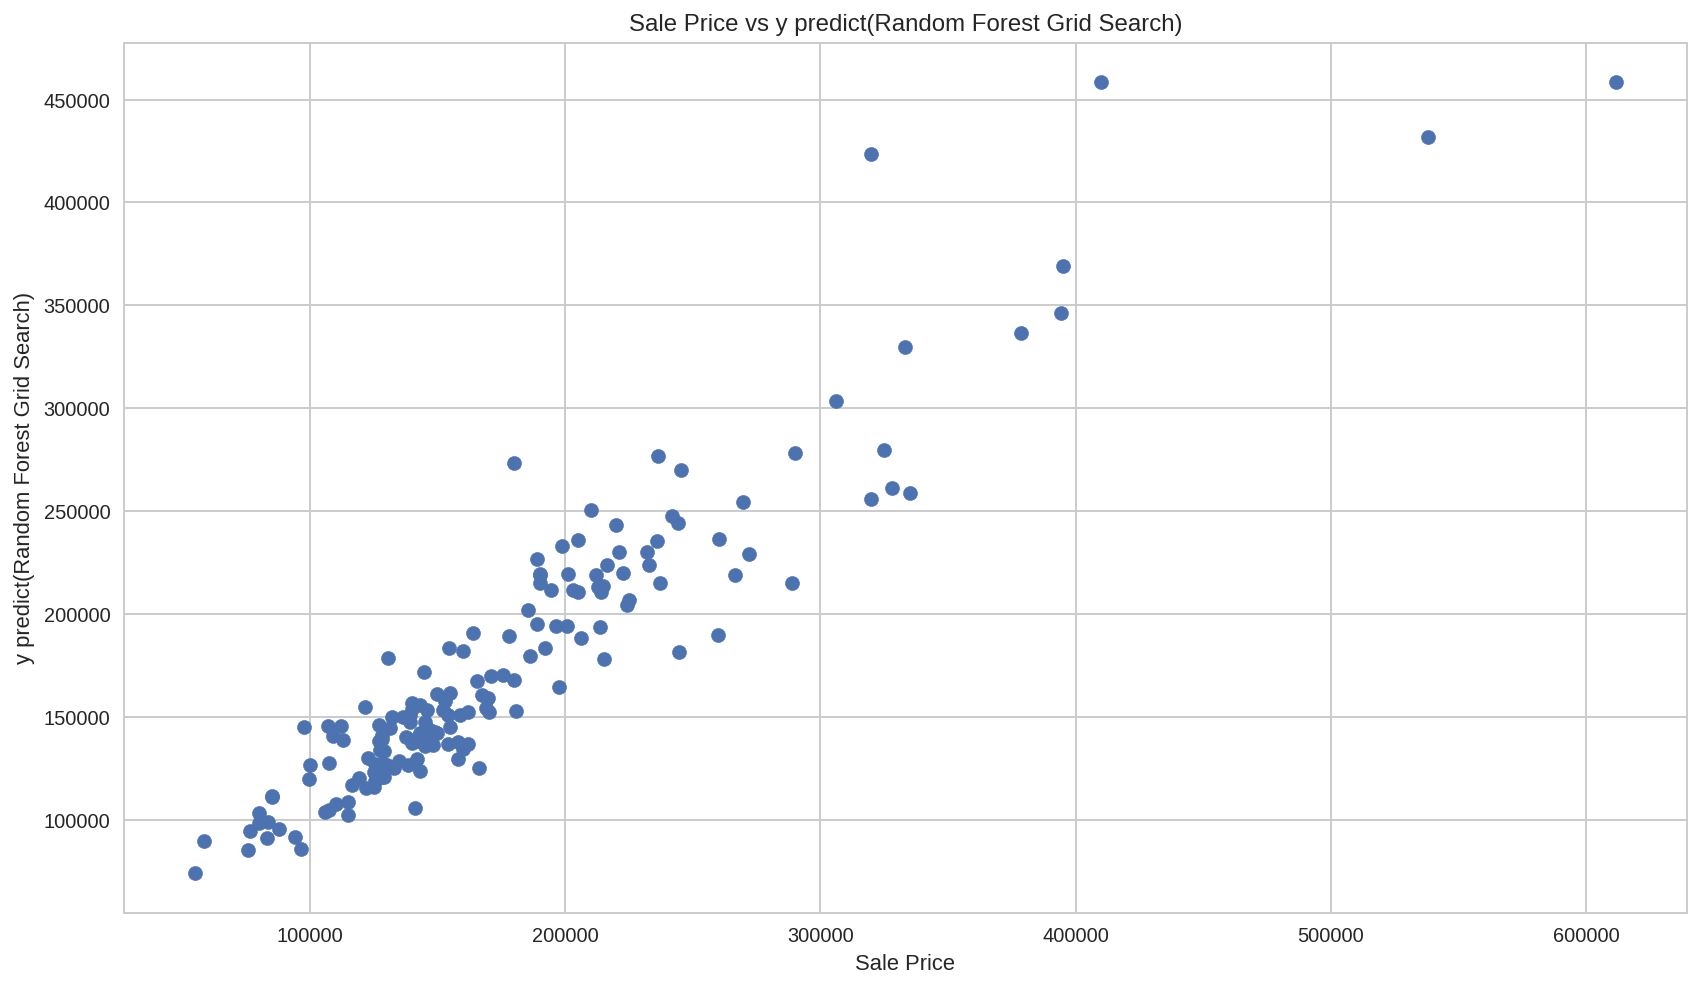

In [115]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,y_pred_rfgs)
plt.title('Sale Price vs y predict(Random Forest Grid Search)')
plt.xlabel('Sale Price')
plt.ylabel('y predict(Random Forest Grid Search)')
plt.show()

#### Modeling with ExtraTreesRegressor

In [116]:
etparams = {
    'clf__bootstrap':[False,True],
    'clf__n_estimators':[11,23,31,41,51,61,71,300]
}

In [117]:
et_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', ExtraTreesRegressor())
])

et_gs = GridSearchCV(et_pipe, param_grid=etparams, cv=5, n_jobs=-1)

In [118]:
y_train.shape

(1221,)

In [119]:
et_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'clf__bootstrap': [False, True], 'clf__n_estimators': [11, 23, 31, 41, 51, 61, 71, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [120]:
et_gs.score(X_train,y_train)

1.0

# $R^2$

In [121]:
etgs_score = et_gs.score(X_test,y_test)

In [122]:
y_train_pred = et_gs.predict(X_train)

In [123]:
y_pred_et_gs = et_gs.predict(X_test)

# RMSE or MSE (Mean Squared Error) & MAE

In [124]:
from sklearn.metrics import mean_squared_error
#rmse(y_test, y_pred_et_gs)
RMSE_et = np.sqrt(mean_squared_error(y_test,y_pred_et_gs))
RMSE_et

26347.55110278694

In [125]:
MAE_et = abs(y_pred_et_gs - y_test).mean()
MAE_et

16715.264794082366

In [126]:
print("Root Mean Square Error or Mean Square Error", RMSE_et)
print("Mean Absolute Error", MAE_et)

Root Mean Square Error or Mean Square Error 26347.5511028
Mean Absolute Error 16715.2647941


In [180]:
#y_pred = et_gs.predict()

In [181]:
#et_gs.grid_scores_

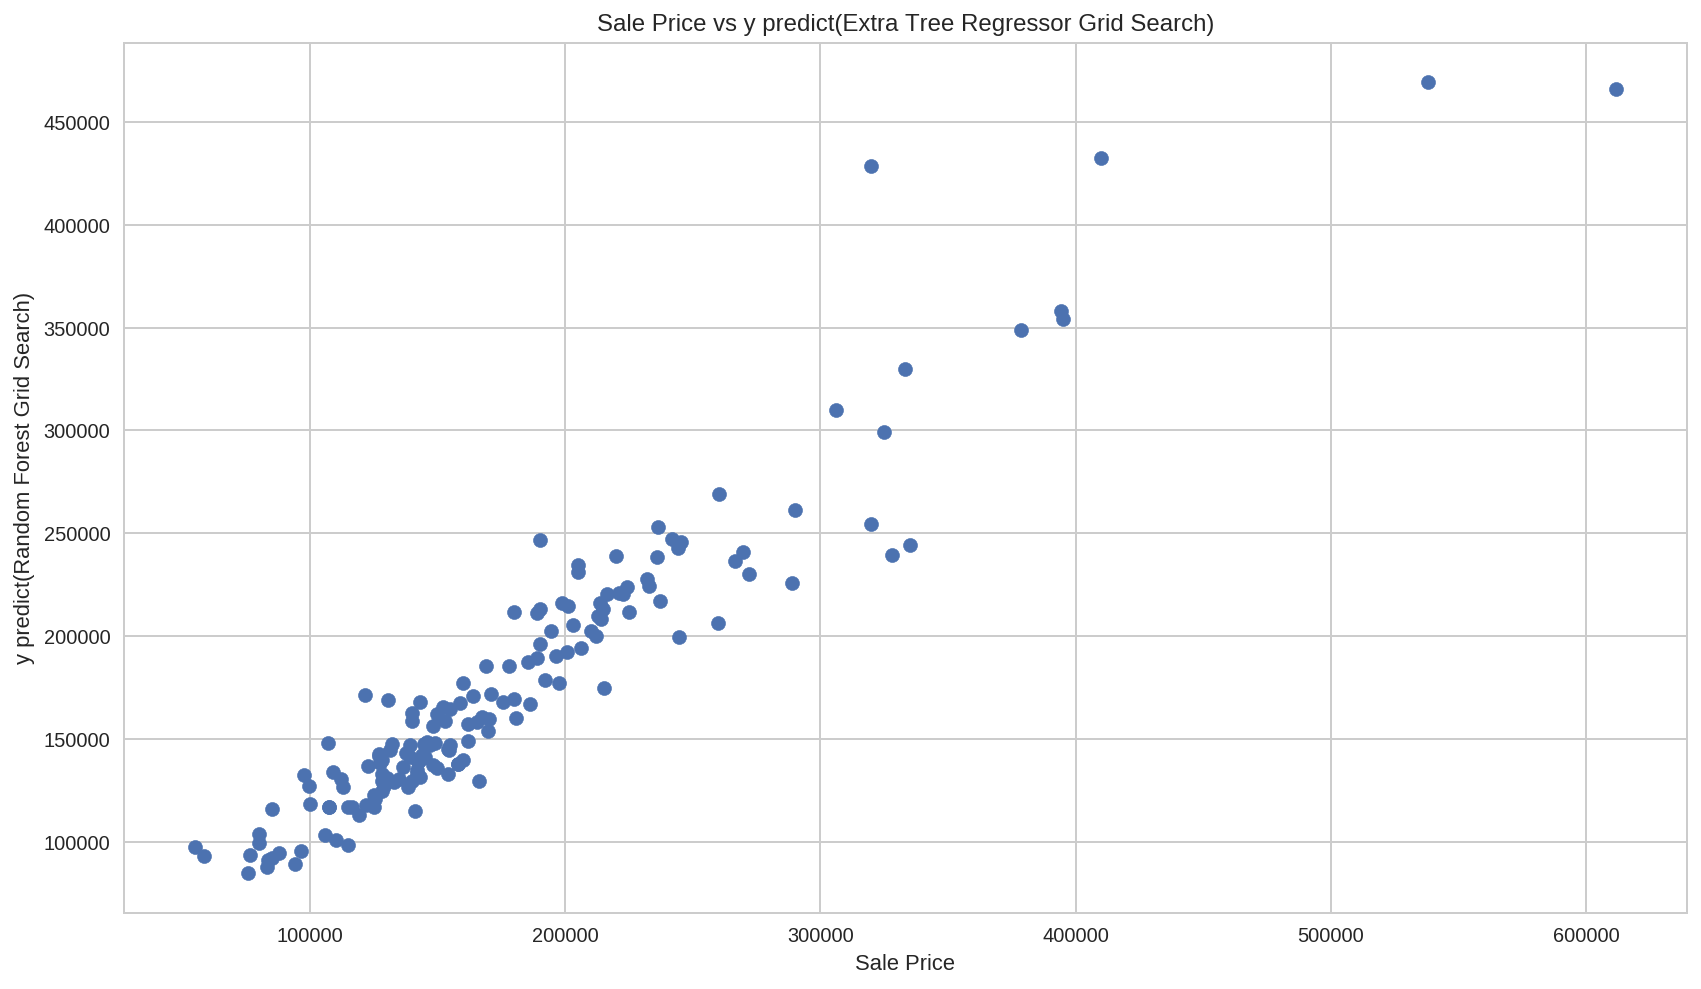

In [128]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,y_pred_et_gs)
plt.title('Sale Price vs y predict(Extra Tree Regressor Grid Search)')
plt.xlabel('Sale Price')
plt.ylabel('y predict(Random Forest Grid Search)')
plt.show()

In [129]:
etgs_imp = et_gs.best_estimator_.named_steps['clf'].feature_importances_

In [130]:
feat_etgs = list(zip(X_train, etgs_imp))

feat_etgs = pd.DataFrame(feat_etgs)
feat_etgs.rename(columns={1:'importance',0:'column'}, inplace=True)
feat_etgs = feat_etgs.sort(columns='importance', ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """


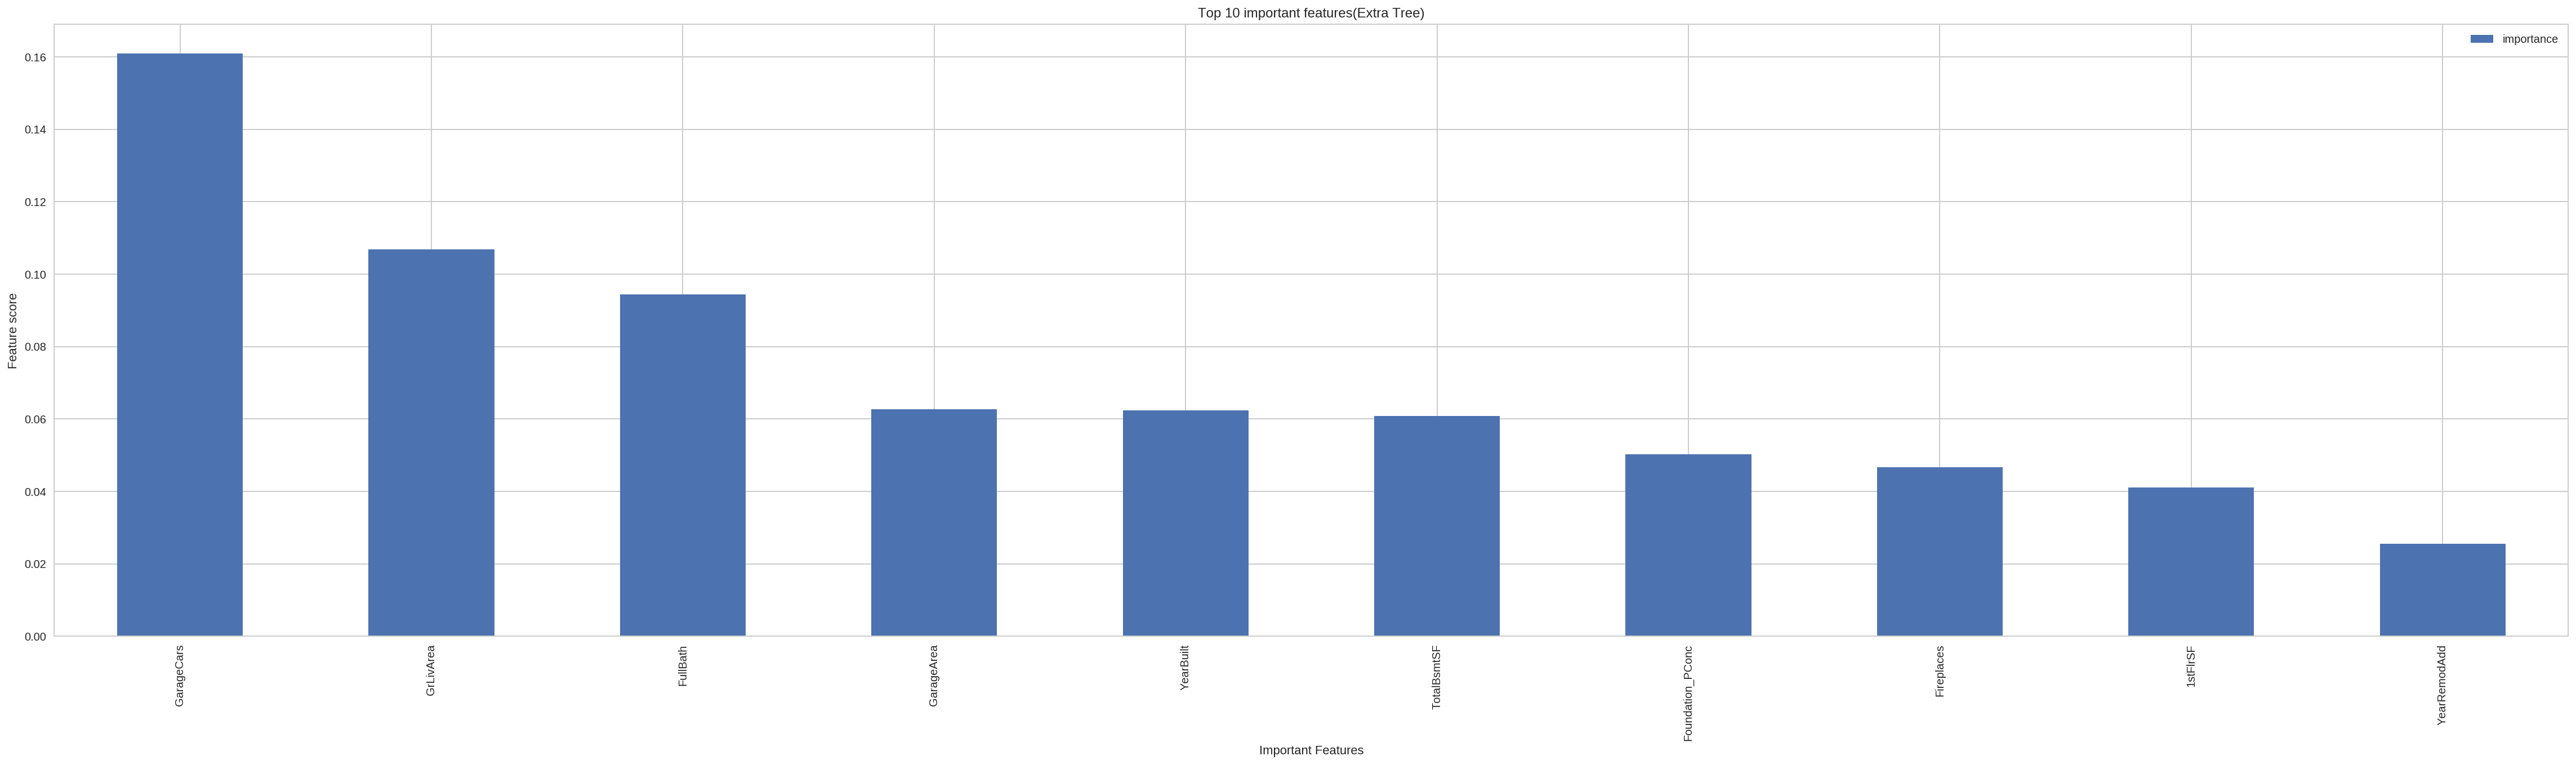

In [131]:
feat_etgs.head(10).plot.bar('column','importance', figsize=(40,10))
plt.title('Top 10 important features(Extra Tree)')
plt.xlabel('Important Features')
plt.ylabel('Feature score')
plt.show()

# Solution 1 - Use Ridge regression

In [95]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 5)

In [96]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
predictions = ridge_reg.predict(X_train)
error = np.mean(np.abs(predictions - y_train))
print( error)

18722.0099164


In [98]:
test_pred_ridge = ridge_reg.predict(X_test)
test_err = np.mean(np.abs(test_pred_ridge - y_test))
print( test_err)

19507.305995


In [99]:
d = {}
for alpha in [0.0, 0.01, 0.1, 1.0, 2.0, 5.0, 100.0, 1000.0]:
    ridge_reg = Ridge(alpha = alpha)
    ridge_reg.fit(X_train, y_train)
    predictions = ridge_reg.predict(X_test)
    test_err = np.mean(np.abs(predictions - y_test))
    d[alpha] = test_err

/opt/conda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.6127284511387708e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [100]:
d

{0.0: 19661.785321960284,
 0.01: 19661.709249100582,
 0.1: 19680.059179571417,
 1.0: 19775.194214744057,
 2.0: 19738.137278886421,
 5.0: 19507.305995047514,
 100.0: 19616.142592831959,
 1000.0: 22079.50207264597}

In [101]:
y_test.shape

(164,)

In [102]:
RMSE = np.sqrt((np.sum(np.square(y_test - predictions))) * 1/164)

In [103]:
RMSE

35827.27620631567

In [104]:
np.sqrt(mean_squared_error(y_test,predictions))


35827.27620631567

In [105]:
MAE = abs(predictions - y_test).mean()

In [106]:
MAE

22079.50207264597

In [107]:
print("Root Mean Square Error or Mean Square Error", RMSE)
print("Mean Absolute Error", MAE)

Root Mean Square Error or Mean Square Error 35827.2762063
Mean Absolute Error 22079.5020726


In [109]:
ridge_reg.score(X_train, y_train)

0.75709245706728612

In [110]:
ridge_reg.score(X_test, y_test)

0.80410911973184107

In [46]:
len(ridge_reg.coef_)

165

In [113]:
ridge_coef_df1 = pd.DataFrame(ridge_reg.coef_, X_test.columns)

In [114]:
ridge_coef_df1 = ridge_coef_df1.reset_index()

In [115]:
ridge_coef_df1.rename(columns={'index':'Features',0:'Coefficients'}, inplace=True)

In [116]:
ridge_coef_df1 = ridge_coef_df1.sort('Coefficients', ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [117]:
ridge_coef_df1 

,Features,Coefficients
19,Fireplaces,3050.961306
85,Neighborhood_NridgHt,2685.030287
94,BldgType_1Fam,2071.526879
146,Functional_Typ,1925.109444
110,RoofStyle_Hip,1860.962708
20,GarageCars,1843.441738
156,SaleType_New,1506.834142
164,SaleCondition_Partial,1473.205363
123,Foundation_PConc,1389.934079
84,Neighborhood_NoRidge,1330.020010


In [118]:
ridge_reg.intercept_

-12650.935396045708

### Top 20 coefficients and features that have a positive impact on the sales price.

In [119]:
ridge_coef_df1.head(20)

,Features,Coefficients
19,Fireplaces,3050.961306
85,Neighborhood_NridgHt,2685.030287
94,BldgType_1Fam,2071.526879
146,Functional_Typ,1925.109444
110,RoofStyle_Hip,1860.962708
20,GarageCars,1843.441738
156,SaleType_New,1506.834142
164,SaleCondition_Partial,1473.205363
123,Foundation_PConc,1389.934079
84,Neighborhood_NoRidge,1330.020010


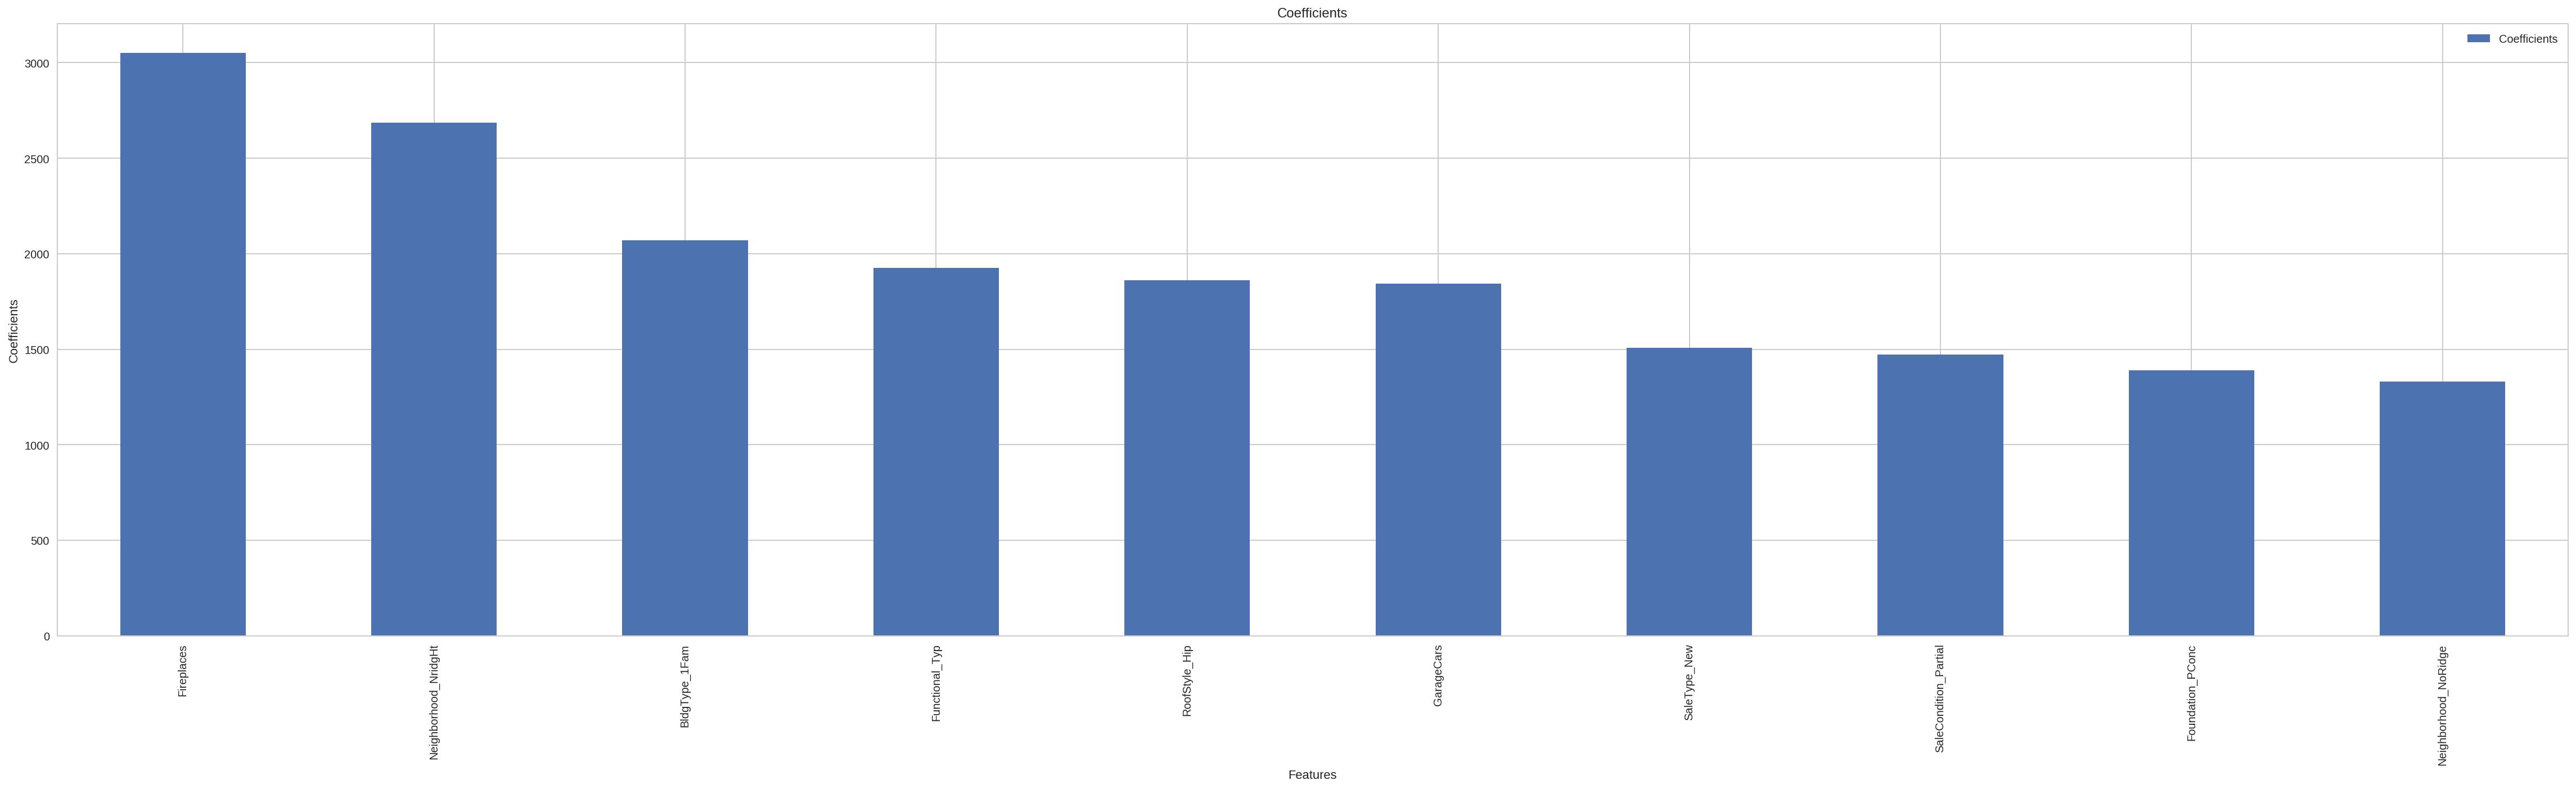

In [120]:
ridge_coef_df1.head(10).plot.bar('Features','Coefficients', figsize=(40,10))
plt.title('Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

### Top 10 coefficients and features that have a negative impact on the sales price.

In [121]:
ridge_coef_df1.tail(10)

,Features,Coefficients
30,YrSold,-932.333927
74,Neighborhood_CollgCr,-968.437478
41,MSSubClass_90,-975.709125
96,BldgType_Duplex,-975.709125
158,SaleType_WD,-1014.376225
76,Neighborhood_Edwards,-1144.643897
17,KitchenAbvGr,-1567.826609
122,Foundation_CBlock,-1790.173560
108,RoofStyle_Gable,-1896.347620
16,BedroomAbvGr,-2955.673970


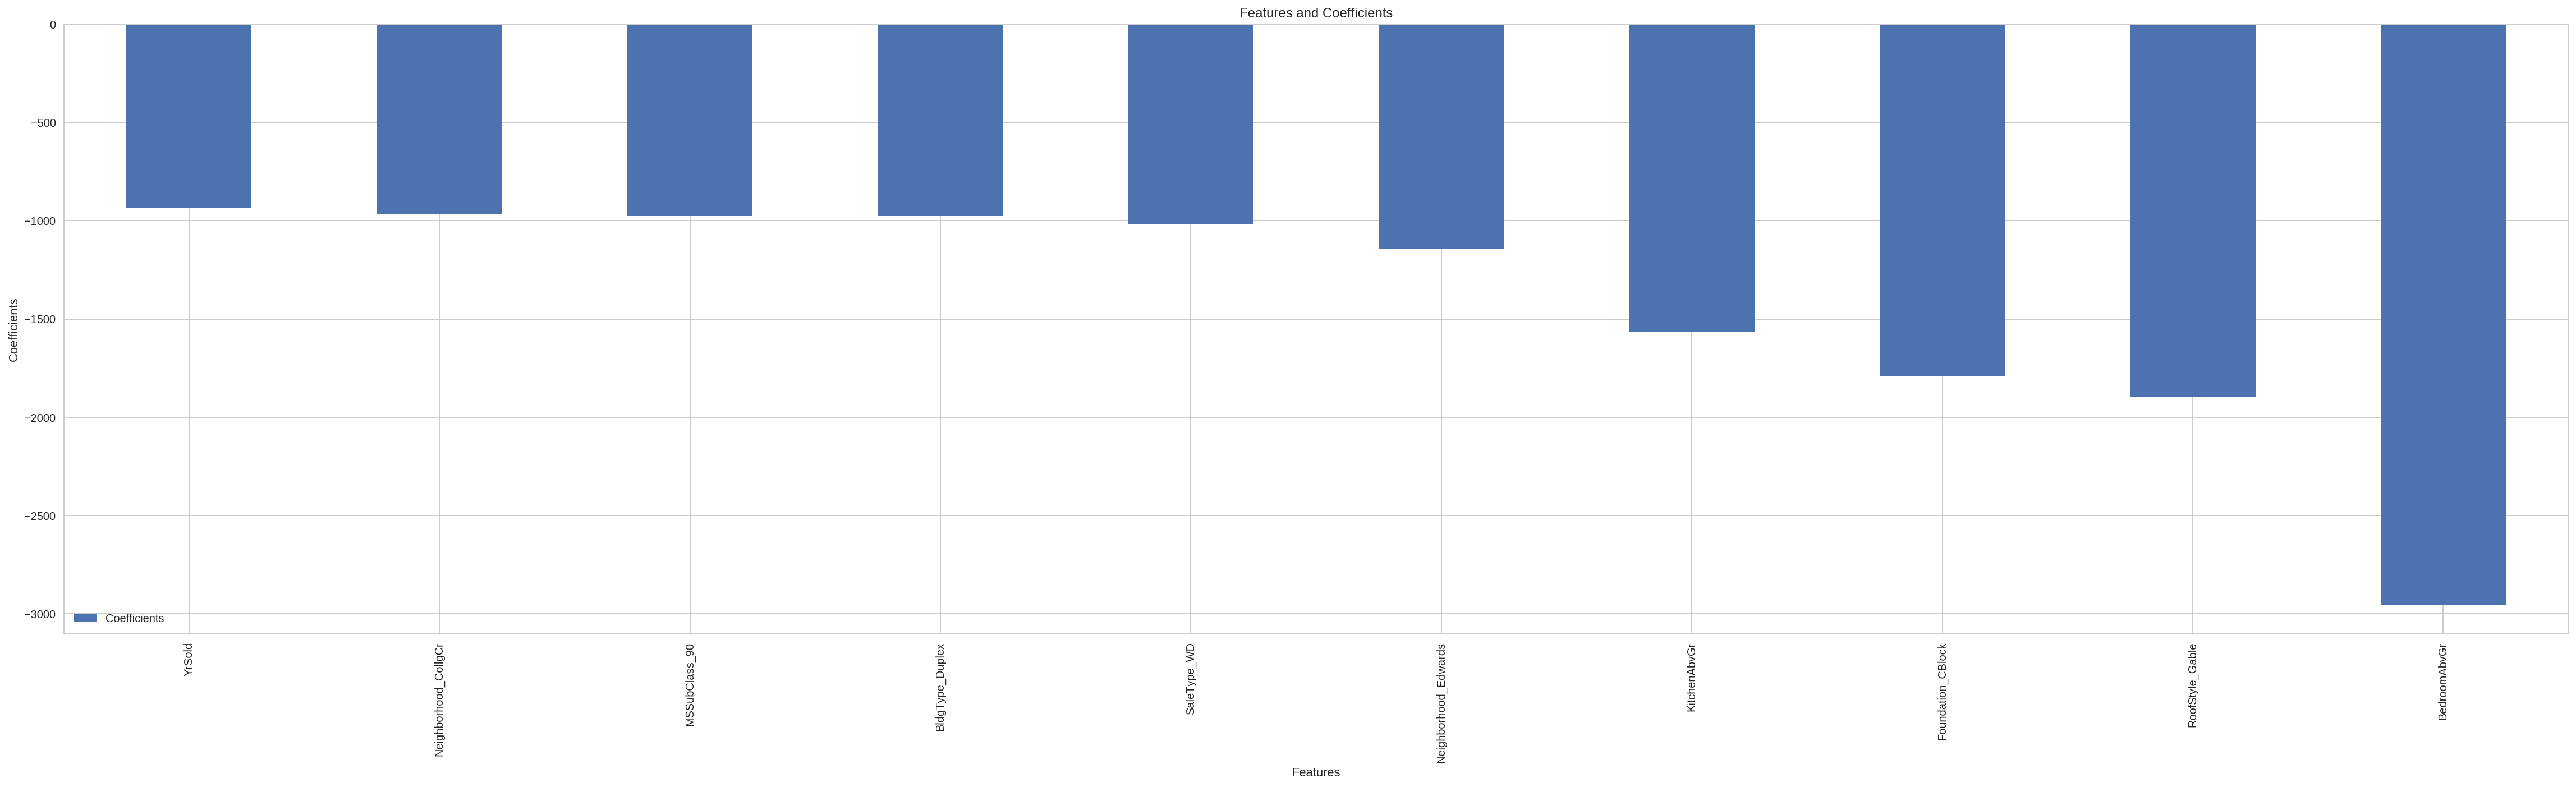

In [122]:
ridge_coef_df1.tail(10).plot.bar('Features','Coefficients', figsize=(40,10))
plt.title('Features and Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

# Summary of Solution 1

1) Tried various models and results are tabulated below.  

2) Top 10 important features listed from Random Forest Trees (See under Random Forest without GS).

3) Plotted the Sales price(actual) versus Predicted Sales Price.

In [148]:

from texttable import Texttable
t = Texttable()
t.add_rows([['Regression Model', 'R squared (test)', 'RMSE/MSE', 'MAE'], 
            ['Random Forest with GS',rfgs_score, RMSE_rfgs, MAE_rfgs],
            ['Random Forest without GS', rfwo_gsore,RMSE_model, MAE_model], 
            ['Extra Trees', etgs_score,RMSE_et, MAE_et], 
            ['Ridge',' ' ,RMSE,MAE],
            
           ])
print(t.draw())

+--------------------------+------------------+-----------+-----------+
|     Regression Model     | R squared (test) | RMSE/MSE  |    MAE    |
+==========================+==================+===========+===========+
| Random Forest with GS    | 0.866            | 29675.275 | 19793.933 |
+--------------------------+------------------+-----------+-----------+
| Random Forest without GS | 0.883            | 27745.822 | 18255.782 |
+--------------------------+------------------+-----------+-----------+
| Extra Trees              | 0.894            | 26347.551 | 16715.265 |
+--------------------------+------------------+-----------+-----------+
| Ridge                    |                  | 35827.276 | 22079.502 |
+--------------------------+------------------+-----------+-----------+


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

# Solution 2

In [38]:
fixed_df.columns[fixed_df.dtypes != 'object']

X_pc = fixed_df[[ 'LotFrontage', 'LotArea', 
       'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea',  'PoolArea', 'MiscVal',
       ]]

In [39]:
X_pc.shape

(1385, 18)

In [40]:
fixed_df.shape

(1385, 52)

##### Just tried out PCA as we learnt in class.  Trying to see if we can predict.

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [134]:
pca = PCA(n_components=5)
X_pca = pca.fit(X_pc.values)

In [135]:
X_pca.explained_variance_ratio_

array([ 0.98802821,  0.00433442,  0.00282622,  0.00244375,  0.00169634])

In [136]:
type(X_pca)

sklearn.decomposition.pca.PCA

In [137]:
x_pcacomp = X_pca.components_

In [138]:
pca_df = pd.DataFrame(x_pcacomp)

In [139]:
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.001404,0.000642,0.999763,0.011276,0.011210,0.002674,0.013917,8.160533e-06,0.000001,0.000008,0.000002,0.000009,-4.608047e-07,0.000029,0.000017,0.000012,0.003939,0.000312,0.001806
1,0.025013,0.011260,-0.020685,0.415518,0.388522,0.334561,0.728955,6.538068e-05,-0.000013,0.000505,0.000255,0.000506,2.162805e-05,0.001791,0.000407,0.000595,0.174836,0.009932,-0.035172
2,0.012464,-0.004835,0.005324,-0.518541,-0.422384,0.661298,0.247000,-2.641798e-04,-0.000005,0.000109,0.000423,0.000532,3.335573e-05,0.000910,-0.000028,-0.000193,-0.081274,0.000410,0.218102
3,-0.018845,0.001407,-0.003817,0.135560,0.106875,-0.133883,-0.029011,4.083927e-05,-0.000004,-0.000014,-0.000089,-0.000100,2.148418e-05,-0.000062,0.000021,0.000009,0.015638,0.002729,0.975095
4,0.999090,-0.000216,0.001763,-0.019877,0.011956,-0.025087,-0.018000,1.425067e-07,-0.000008,-0.000012,-0.000021,0.000050,2.943415e-06,0.000029,-0.000033,0.000003,0.004068,0.005403,0.016709


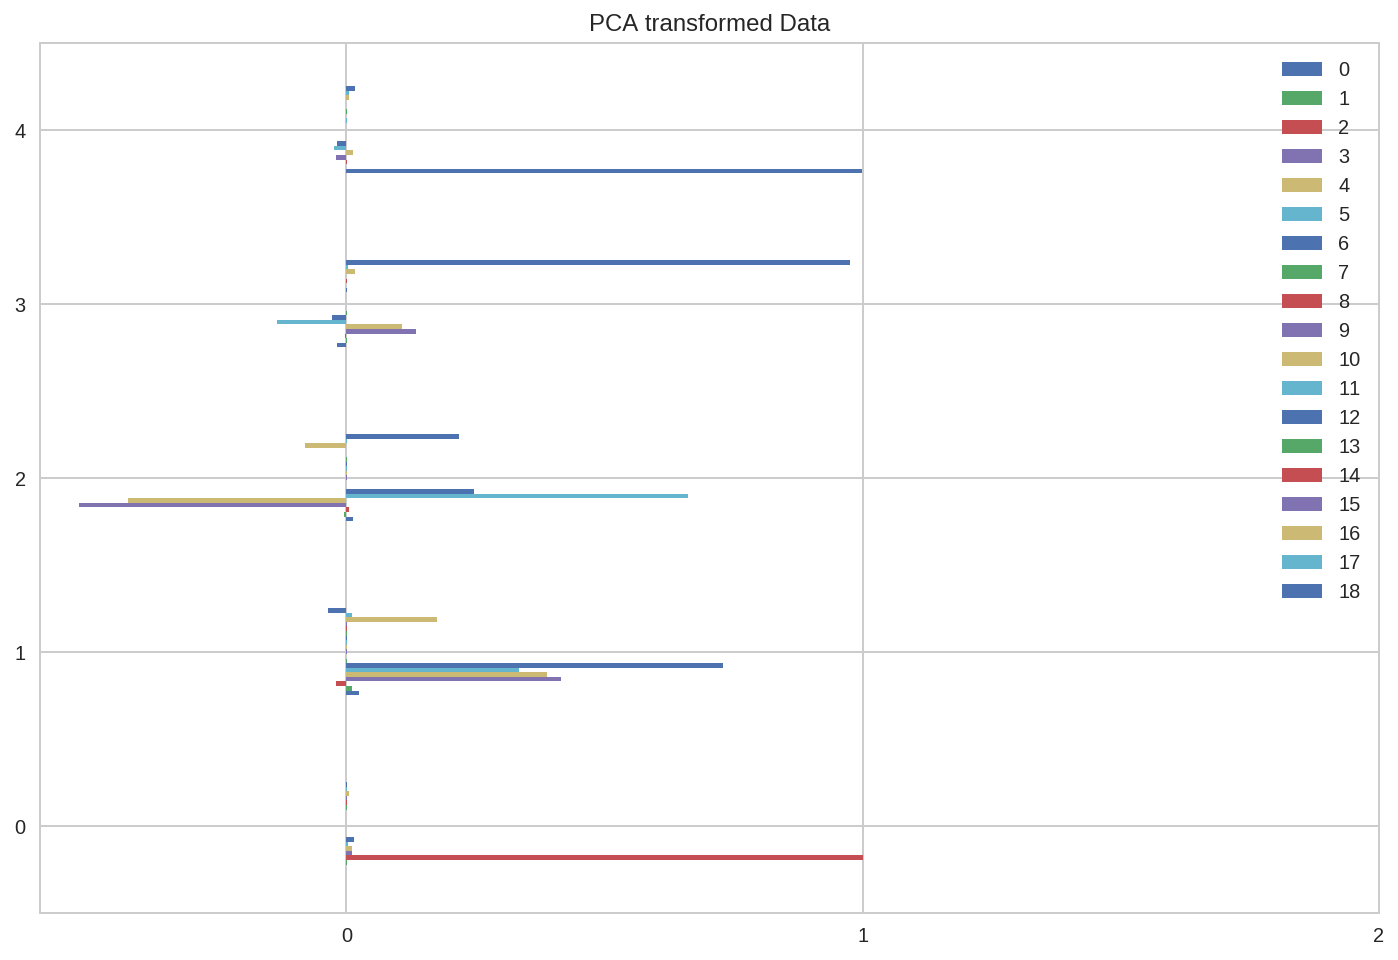

In [140]:
pca_df.plot(kind='barh', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(3))

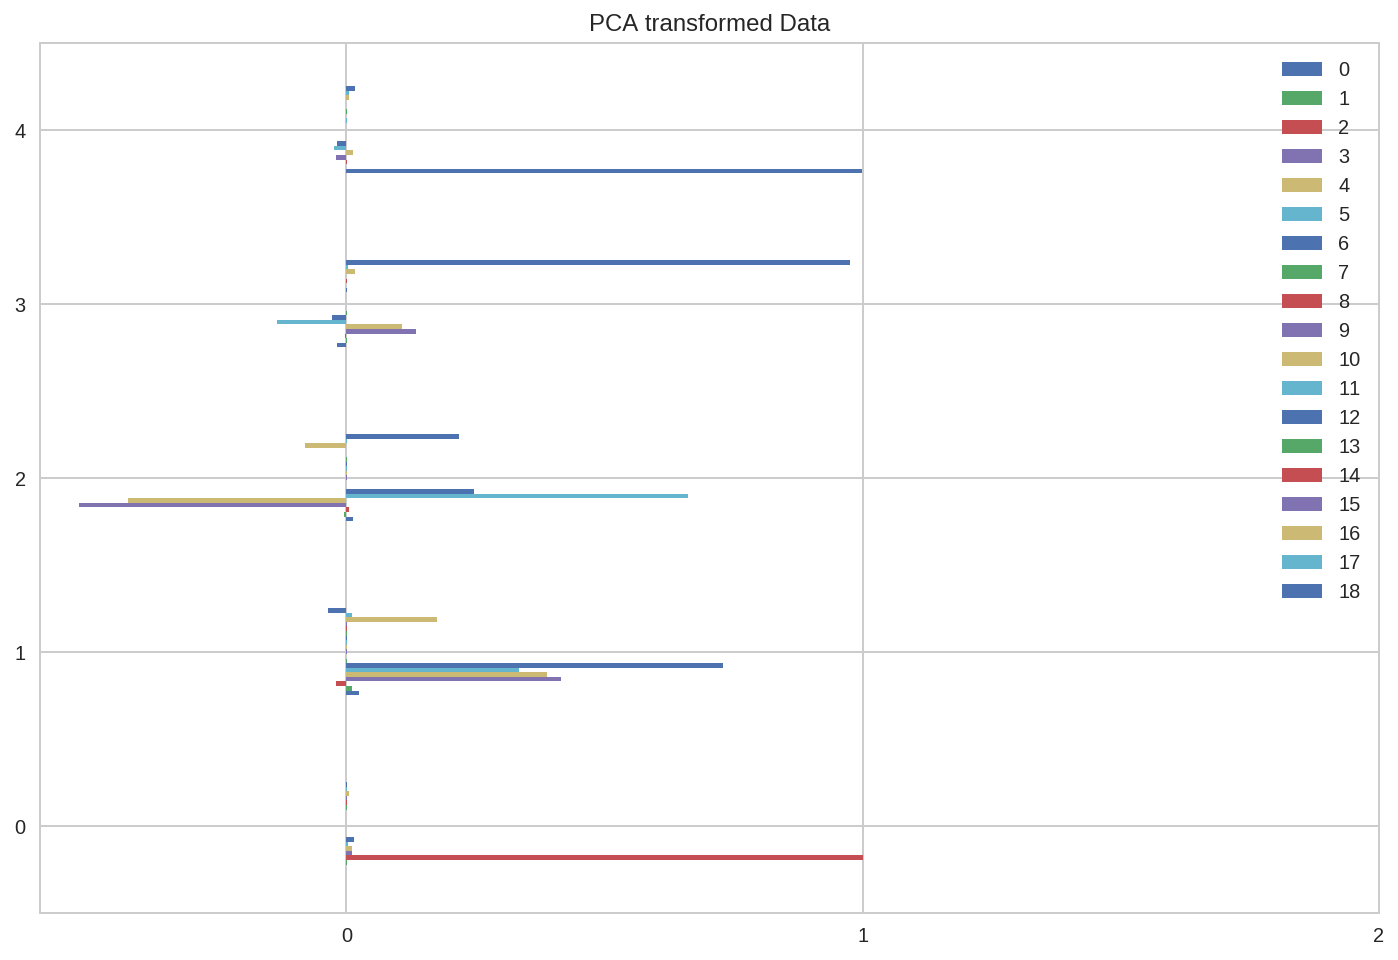

In [141]:
pca_df.plot(kind='barh', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(3))

In [144]:
pca_1 = PCA(n_components=1)

In [145]:
pca_1_vec = pca_1.fit(X_pc.values)

In [146]:
x_pca_1_comp = pca_1_vec.components_

To do a pca-transform of your data, you need to do 

    pca_1.transform(X)

In [147]:
x_pca_1_df = pd.DataFrame(x_pca_1_comp)

In [148]:
x_pca_1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.001404,0.000642,0.999763,0.011276,0.01121,0.002674,0.013917,0.000008,0.000001,0.000008,0.000002,0.000009,-4.608047e-07,0.000029,0.000017,0.000012,0.003939,0.000312,0.001806


In [149]:
pca_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('skb', SelectKBest( score_func = f_regression, k = 10) ),
    ('las', Lasso())
    ])

pca_params = {
    'skb__k': [5, 10, 15, 20],# 50, 100, 200, 250, 'all'],
    'las__alpha': np.logspace(-2,2,5)
}

pca_gs = GridSearchCV( pca_pipe,
                       param_grid = pca_params, 
                       n_jobs = -1,
                       cv = ShuffleSplit(10, random_state = 42)
                     )

In [150]:
pca_gs.fit(X_train, y_train)


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.1, train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('skb', SelectKBest(k=10, score_func=<function f_regression at 0x7f8399813...=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'skb__k': [5, 10, 15, 20], 'las__alpha': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [151]:
pca_gs.best_params_

{'las__alpha': 100.0, 'skb__k': 20}

In [152]:
pca_gs.score(X_train,y_train)

0.80335087851954745

In [153]:
pca_gs.score(X_test,y_test)

0.82742285485487599

In [154]:
pca_gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('skb', SelectKBest(k=20, score_func=<function f_regression at 0x7f83998139d8>)), ('las', Lasso(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [155]:
pca_gs.best_score_

0.71397684635047409

## Features that are renovateable are included in renovate_df dataframe

In [36]:
X_fixed = dumfixed_df

In [37]:
X_fixed.shape

(1385, 165)

In [38]:
y_fixed = house_df['SalePrice']

In [39]:
renovate_df = house_df[["ExterQual","ExterCond","Exterior2nd","Exterior1st","Heating","HeatingQC","CentralAir",
                "Electrical","GarageFinish","Utilities","PavedDrive","Fence","OverallQual","FireplaceQu",
                "BsmtCond","OverallCond","KitchenQual","GarageQual","GarageCond"]]

In [40]:
X_reno = renovate_df

In [41]:
X_reno_dummies = pd.get_dummies(X_reno , dummy_na=True)

In [42]:
X_reno_dummies.shape

(1385, 112)

In [43]:
y_res = y_fixed - ridge_reg.predict(X_fixed)

In [44]:
y_res.shape

(1385,)

In [45]:
X_reno_train2, X_reno_test2,y_reno_train2, y_reno_test2 = train_test_split(X_reno_dummies,y_res, random_state=42 )

# Ridge linear model

In [46]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 5)

In [47]:
ridge_reg.fit(X_reno_train2, y_reno_train2)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
predictions = ridge_reg.predict(X_reno_train2)
error = np.mean(np.abs(predictions - y_reno_train2))
print( error)

17051.4125291


In [49]:
test_pred_ridge = ridge_reg.predict(X_reno_test2)
test_err = np.mean(np.abs(test_pred_ridge - y_reno_test2))
print( test_err)

18072.9055355


In [50]:
d = {}
for alpha in [0.0, 0.01, 0.1, 1.0, 2.0, 5.0, 100.0, 1000.0]:
    ridge_reg = Ridge(alpha = alpha)
    ridge_reg.fit(X_reno_train2, y_reno_train2)
    predictions = ridge_reg.predict(X_reno_test2)
    test_err = np.mean(np.abs(predictions - y_reno_test2))
    d[alpha] = test_err

In [51]:
d

{0.0: 1.0159954826666882e+17,
 0.01: 18818.594509484836,
 0.1: 18767.431147701245,
 1.0: 18496.071664827847,
 2.0: 18326.679786884164,
 5.0: 18072.905535457034,
 100.0: 17620.049319870424,
 1000.0: 17956.706295122411}

In [52]:
y_reno_test2.shape

(347,)

In [53]:
RMSE_reno = np.sqrt((np.sum(np.square(y_reno_test2 - predictions))) * 1/347)

In [54]:
RMSE_reno

28780.668984262807

In [55]:
RMSE_reno = np.sqrt(mean_squared_error(y_reno_test2,predictions))
RMSE_reno

28780.668984262807

In [56]:
MAE_reno = abs(predictions - y_reno_test2).mean()

In [57]:
MAE_reno

17956.706295122411

In [58]:
print("Root Mean Square Error or Mean Square Error", RMSE_reno)
print("Mean Absolute Error", MAE_reno)

Root Mean Square Error or Mean Square Error 28780.6689843
Mean Absolute Error 17956.7062951


In [59]:
len(ridge_reg.coef_)

112

In [60]:
X_reno_test2.shape

(347, 112)

In [81]:
ridge_coef_df = pd.DataFrame(ridge_reg.coef_,X_reno_test2.columns )

In [82]:
ridge_coef_df = ridge_coef_df.reset_index()

In [83]:
ridge_coef_df.rename(columns={'index':'Features',0:'Coefficients'}, inplace=True)

In [87]:
ridge_coef_df = ridge_coef_df.sort('Coefficients', ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


### Top 20 coefficients and features that have a positive impact on the sales price.

In [93]:
ridge_coef_df.head(20)

,Features,Coefficients
1,OverallCond,2265.095243
0,OverallQual,1955.725170
95,KitchenQual_Ex,1081.120896
2,ExterQual_Ex,873.175862
89,FireplaceQu_nan,643.667576
68,GarageFinish_Fin,592.989569
33,Exterior1st_BrkFace,570.708104
84,FireplaceQu_Ex,550.810108
111,GarageCond_nan,457.915141
105,GarageQual_nan,457.915141


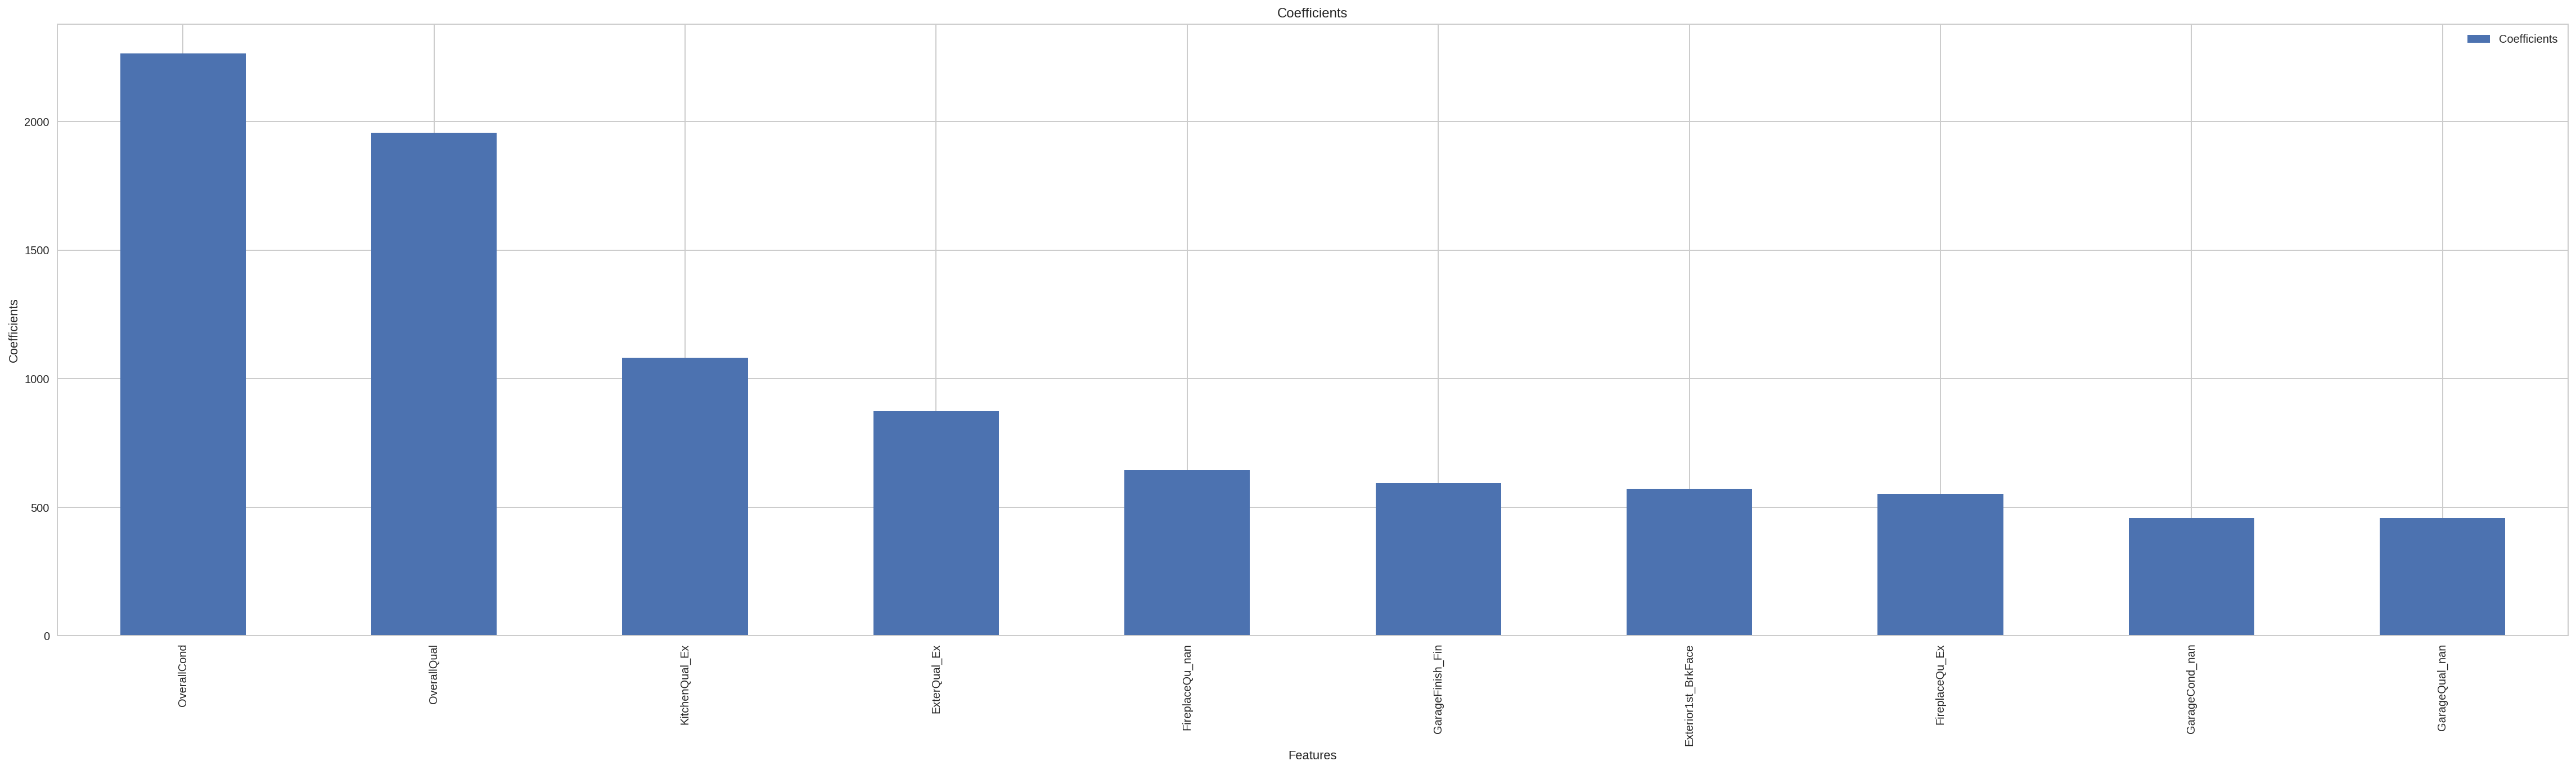

In [89]:
ridge_coef_df.head(10).plot.bar('Features','Coefficients', figsize=(40,10))
plt.title('Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

### Top 10 coefficients and features that have a negative impact on the sales price.

In [91]:
ridge_coef_df.tail(10)

,Features,Coefficients
43,Exterior1st_Wd Sdng,-266.637588
90,BsmtCond_Fa,-292.059222
41,Exterior1st_Stucco,-303.545150
60,CentralAir_Y,-304.038523
110,GarageCond_TA,-374.784284
104,GarageQual_TA,-524.944601
4,ExterQual_Gd,-730.326773
69,GarageFinish_RFn,-868.788404
88,FireplaceQu_TA,-910.850531
97,KitchenQual_Gd,-1049.710632


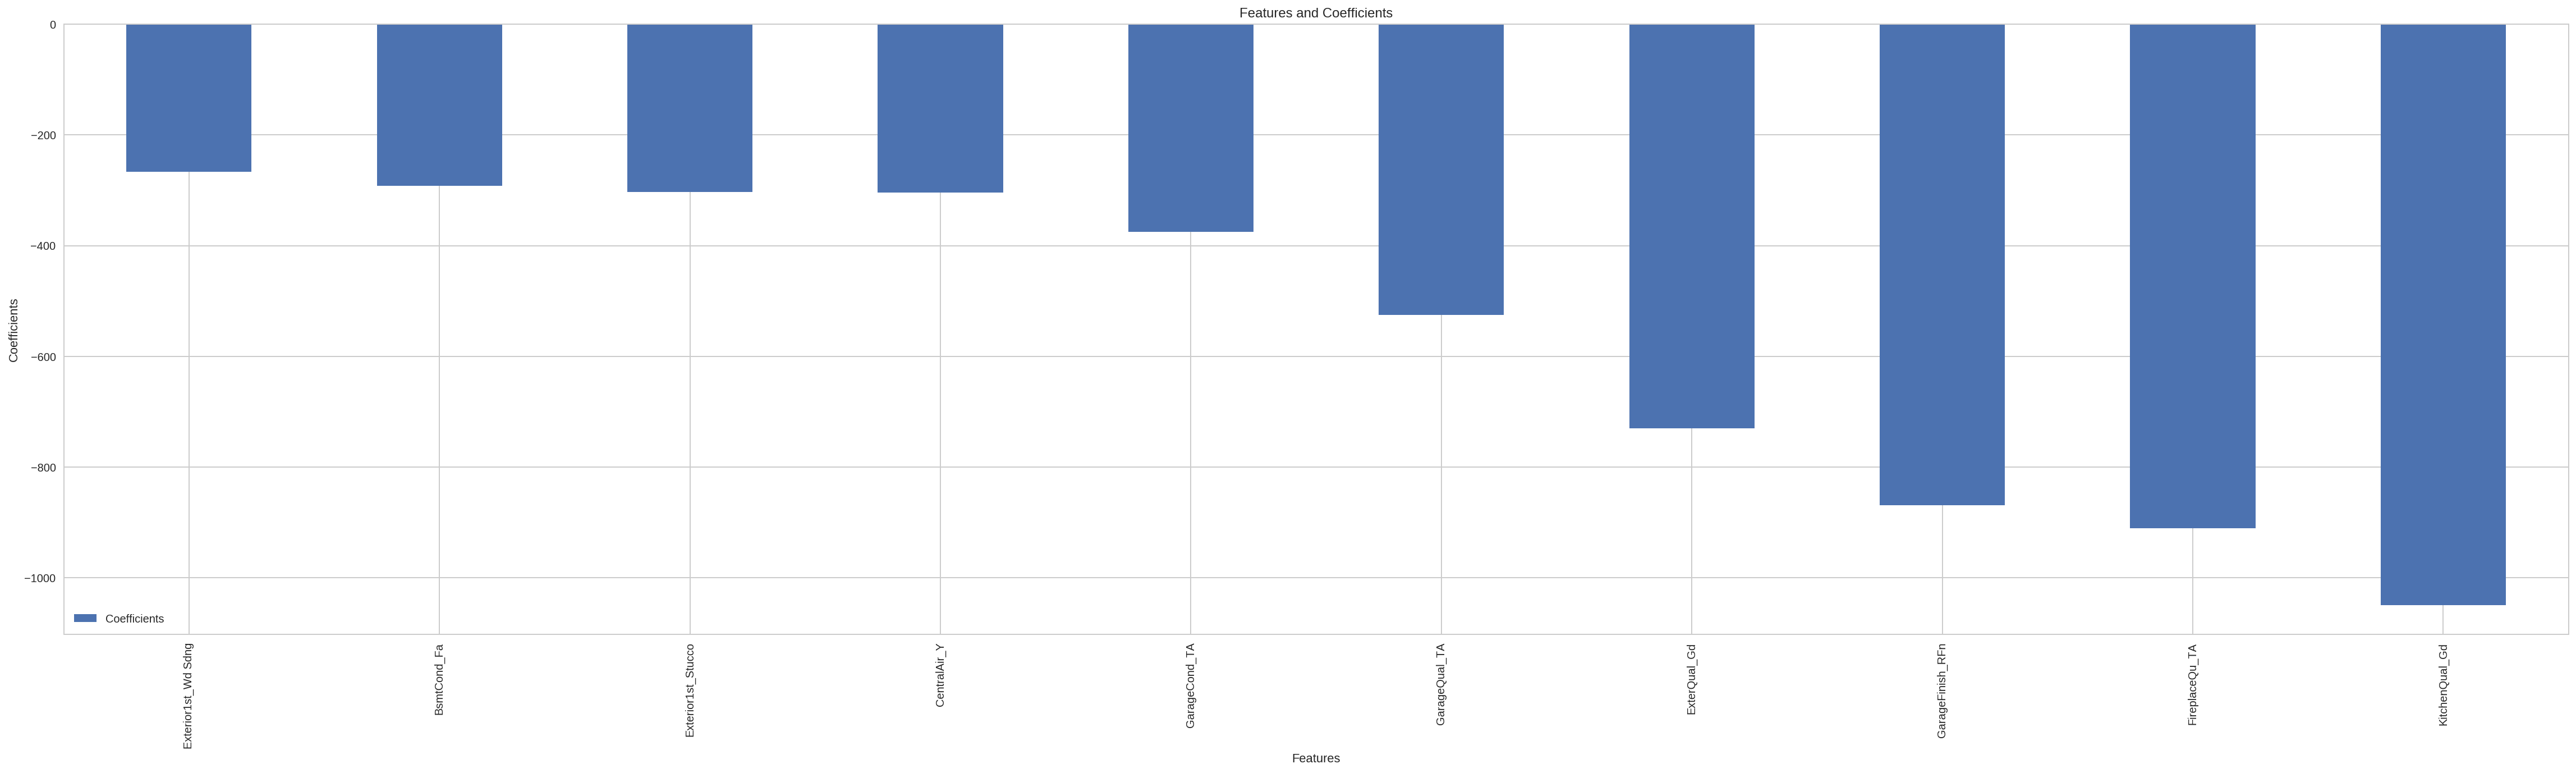

In [94]:
ridge_coef_df.tail(10).plot.bar('Features','Coefficients', figsize=(40,10))
plt.title('Features and Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

In [91]:
ridge_coef_df.tail(10)

,Features,Coefficients
43,Exterior1st_Wd Sdng,-266.637588
90,BsmtCond_Fa,-292.059222
41,Exterior1st_Stucco,-303.545150
60,CentralAir_Y,-304.038523
110,GarageCond_TA,-374.784284
104,GarageQual_TA,-524.944601
4,ExterQual_Gd,-730.326773
69,GarageFinish_RFn,-868.788404
88,FireplaceQu_TA,-910.850531
97,KitchenQual_Gd,-1049.710632


# Extra Trees

In [146]:
et_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', ExtraTreesRegressor())
])

In [147]:
etparams = {
    'clf__bootstrap':[False,True],
    'clf__n_estimators':range(10,210,40)
}

In [148]:
etgs = GridSearchCV(et_pipe, etparams, cv=5)

In [149]:
etgs.fit(X_reno_train2, y_reno_train2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__bootstrap': [False, True], 'clf__n_estimators': range(10, 210, 40)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [150]:
etgs.score(X_reno_train2, y_reno_train2)

0.74596332995213444

In [151]:
etgs.score(X_reno_test2, y_reno_test2)

0.085258218758376692

In [152]:
y_pred2 = etgs.predict(X_reno_test2)

In [153]:
etgs.best_params_

{'clf__bootstrap': True, 'clf__n_estimators': 90}

In [154]:
etgs_important_feat = etgs.best_estimator_.named_steps['clf'].feature_importances_

In [155]:
feat_etgs_imp = list(zip(X_reno_train2, etgs_important_feat))

feat_etgs_imp = pd.DataFrame(feat_etgs_imp)
feat_etgs_imp.rename(columns={1:'importance',0:'column'}, inplace=True)
feat_etgs_imp = feat_etgs_imp.sort(columns='importance', ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """


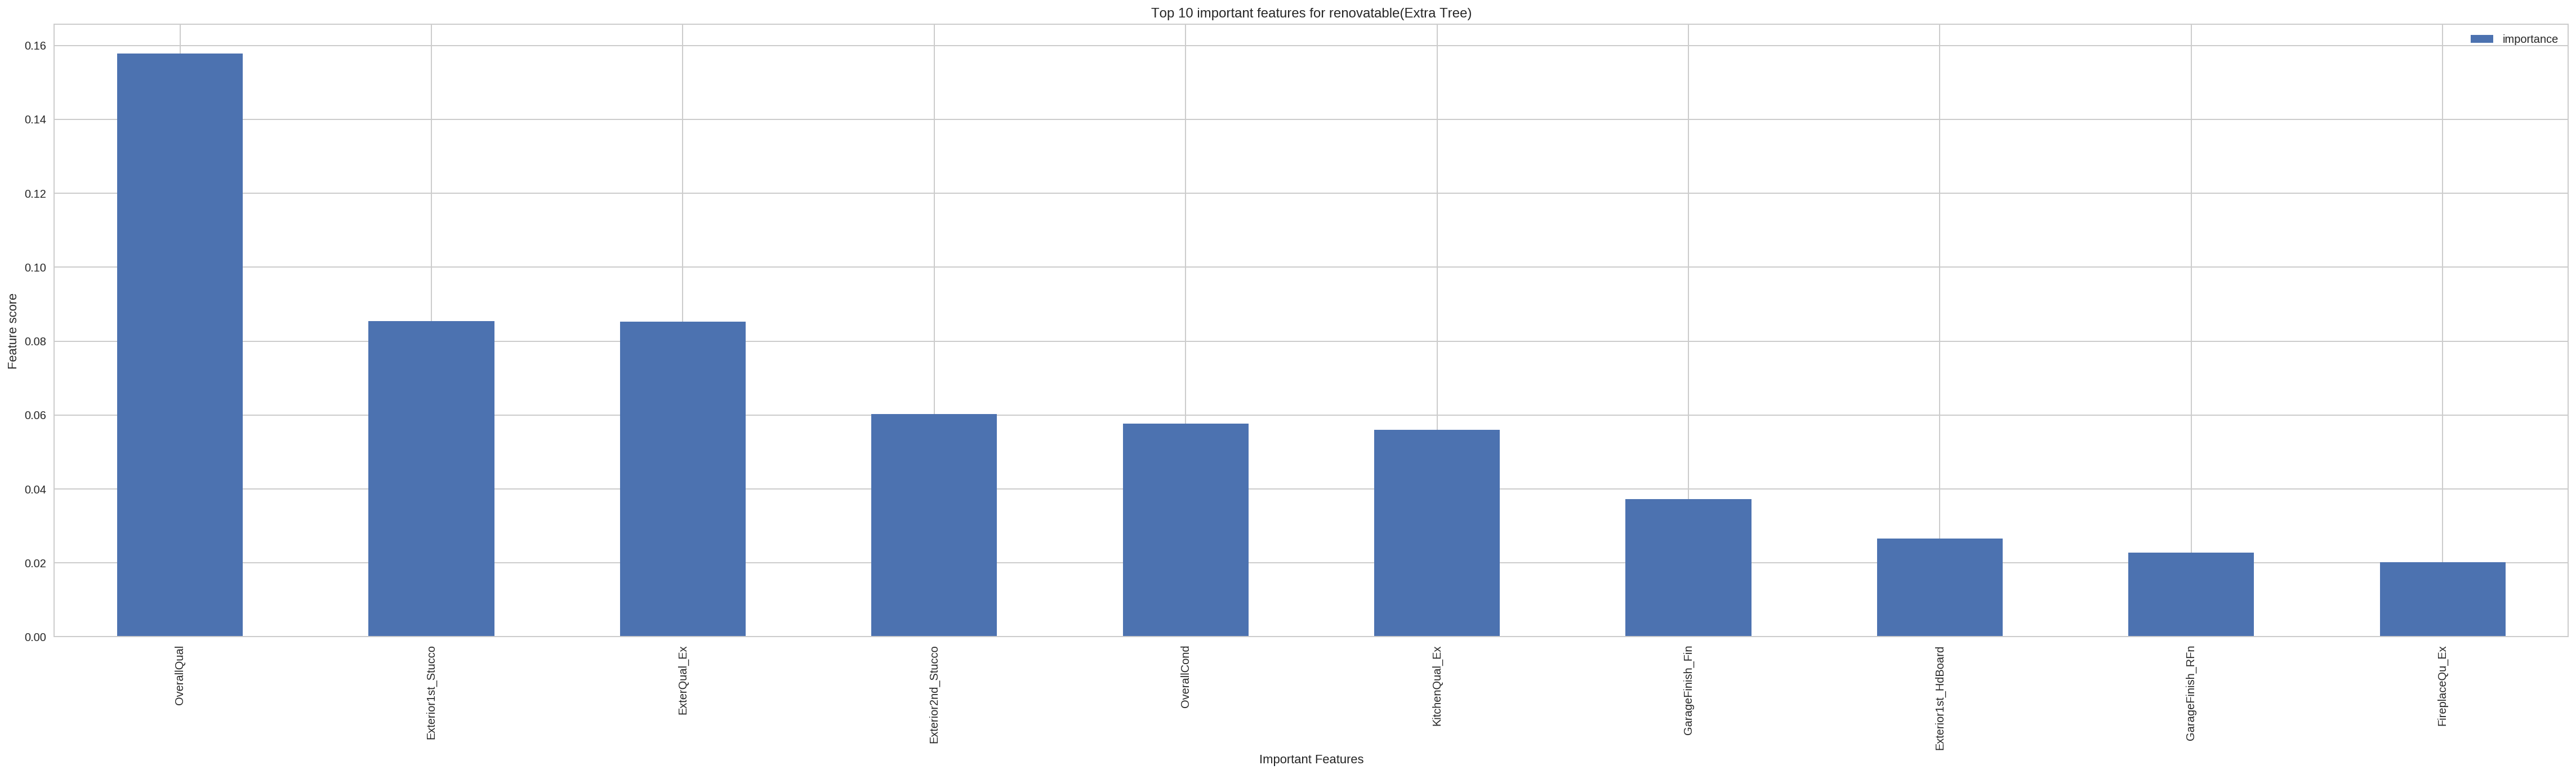

In [156]:
feat_etgs_imp.head(10).plot.bar('column','importance', figsize=(40,10))
plt.title('Top 10 important features for renovatable(Extra Tree)')
plt.xlabel('Important Features')
plt.ylabel('Feature score')
plt.show()

# Important features from Extra Trees are provided below.

In [157]:
feat_etgs_imp.head(10)

,column,importance
0,OverallQual,0.157804
41,Exterior1st_Stucco,0.085367
2,ExterQual_Ex,0.085215
25,Exterior2nd_Stucco,0.060286
1,OverallCond,0.057667
95,KitchenQual_Ex,0.056005
68,GarageFinish_Fin,0.037249
36,Exterior1st_HdBoard,0.026603
69,GarageFinish_RFn,0.022707
84,FireplaceQu_Ex,0.020174


In [182]:
etgs.best_score_

0.039157094947699388

## Solution 2 summary -
The above list makes sense even though the scores are poor.  Overall quality and condition along with Kitchen quality are important investment returns.

In [241]:
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sfm', SelectFromModel(Lasso(max_iter=100000))),
    ('rfr', RandomForestRegressor())
]) 

In [242]:
rf_params = {
    'rfr__n_estimators':range(10,60, 10),
    'sfm__threshold': [.01, .05, .1],
    'rfr__max_depth':[1,4,5,8,9,10,11,20,None],
    'rfr__max_features':['auto','log2']
}

In [243]:
rfgs = GridSearchCV(rf_pipe,rf_params, cv=5,n_jobs=-1)

In [245]:
rfgs.fit(X_reno_train2, y_reno_train2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sfm', SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=Fal...timators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'rfr__n_estimators': range(10, 60, 10), 'sfm__threshold': [0.01, 0.05, 0.1], 'rfr__max_depth': [1, 4, 5, 8, 9, 10, 11, 20, None], 'rfr__max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [246]:
rfgs.score(X_reno_train2, y_reno_train2)

0.35002605794642272

In [247]:
rfgs.score(X_reno_test2, y_reno_test2)

0.23676711177629481

In [248]:
rfgs.best_params_

{'rfr__max_depth': 4,
 'rfr__max_features': 'auto',
 'rfr__n_estimators': 30,
 'sfm__threshold': 0.01}

# Summary of Solution 2

1) Tried various models.  

2) The above list makes sense even though the scores are poor.  Overall quality and condition along with Kitchen quality are important investment returns.

3) Betas (coefficients) provide information on how much each renovatable feature impacts the sales price.

In [179]:
# Find out betas
from texttable import Texttable
t = Texttable()
t.add_rows([['Regression Model', 'R squared (test)', 'RMSE/MSE', 'MAE'], 
            ['Random Forest with GS',rfgs_score, RMSE_rfgs, MAE_rfgs],
            ['Random Forest without GS', rfwo_gsore,RMSE_model, MAE_model], 
            ['Extra Trees', etgs_score,RMSE_et, MAE_et], 
            ['Ridge',' ' ,RMSE,MAE],
            
           ])
print(t.draw())

+--------------------------+------------------+-----------+-----------+
|     Regression Model     | R squared (test) | RMSE/MSE  |    MAE    |
+==========================+==================+===========+===========+
| Random Forest with GS    | 0.866            | 29675.275 | 19793.933 |
+--------------------------+------------------+-----------+-----------+
| Random Forest without GS | 0.883            | 27745.822 | 18255.782 |
+--------------------------+------------------+-----------+-----------+
| Extra Trees              | 0.894            | 26347.551 | 16715.265 |
+--------------------------+------------------+-----------+-----------+
| Ridge                    |                  | 35827.276 | 22079.502 |
+--------------------------+------------------+-----------+-----------+


# EDA - Distribution of sales prices

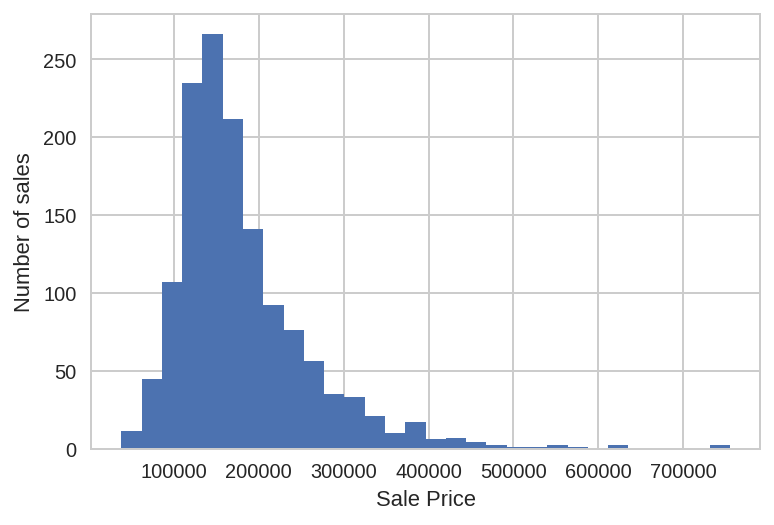

In [11]:
plt.hist(house_df['SalePrice'], bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Number of sales")
plt.show()

# Sales prices, by living area
There is a relationship between sales price and above ground living area. Some outliers are present in the data.

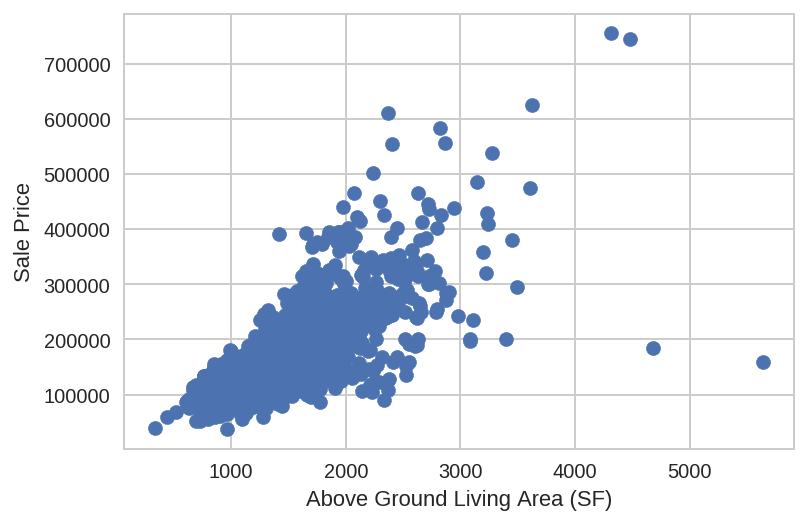

In [12]:
plt.scatter(house_df['GrLivArea'], house_df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above Ground Living Area (SF)')
plt.show()

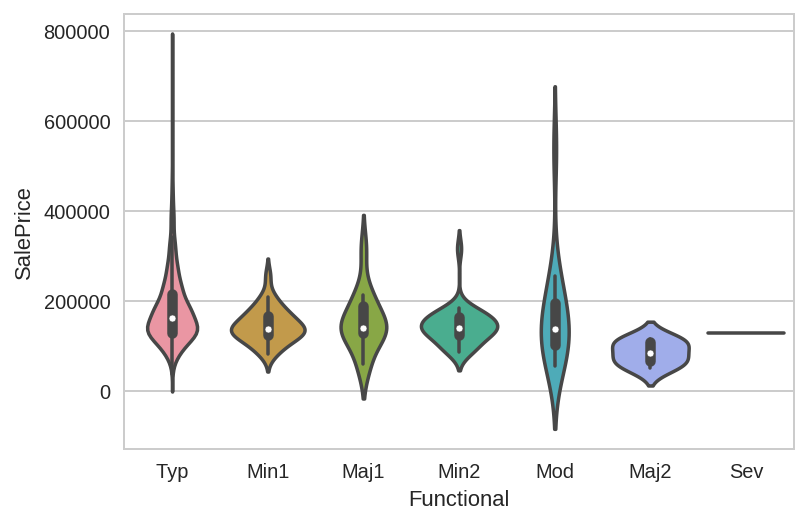

In [187]:
#Home Functionality
sns.violinplot('Functional', 'SalePrice', data = house_df)
plt.show()

# Price per square foot
It's useful to look at price per square foot, a typically used metric. The majority of sales in Ames, Iowa during the time period were focused around a price of roughly $125 per square foot.


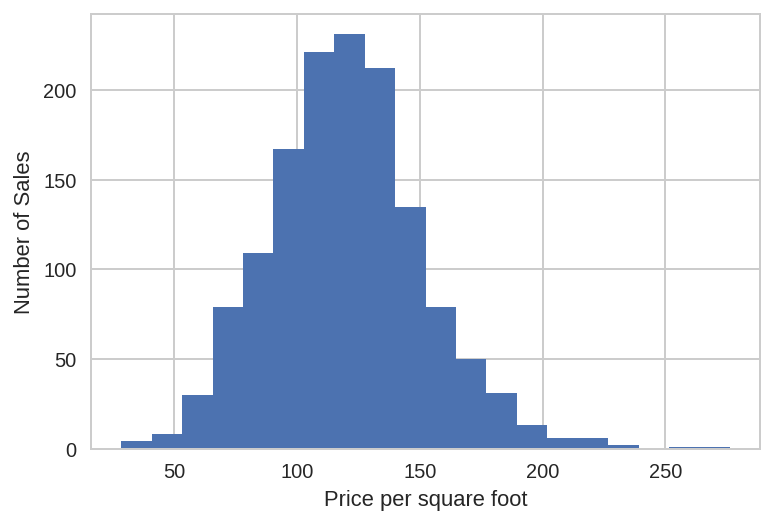

In [13]:
house_df['PSF'] = house_df['SalePrice']/house_df['GrLivArea']
plt.hist(house_df['PSF'], bins=20)
plt.ylabel('Number of Sales')
plt.xlabel('Price per square foot')
plt.show()

# Price per square foot, by year sold
It's somewhat surprising that the median price per square foot did not change over the time period, which included the mortgage crisis and great recession. The median is heavily influenced by volume of sales in the NWAmes neighborhood which had the highest volume of sales.

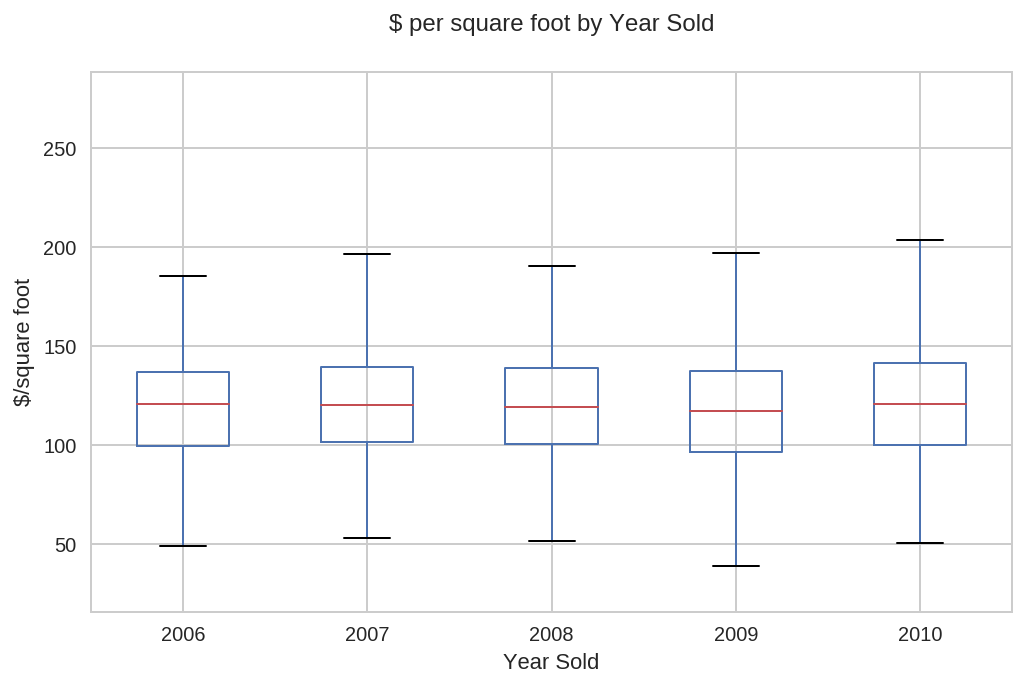

In [14]:
house_df.boxplot(column=['PSF'], by=['YrSold'], figsize=(8,5))
plt.suptitle('$ per square foot by Year Sold')
plt.title('')
plt.ylabel('$/square foot')
plt.xlabel('Year Sold')
plt.show()

# Home Age
Price per square foot appears to trend down with the age of the home, as expected.

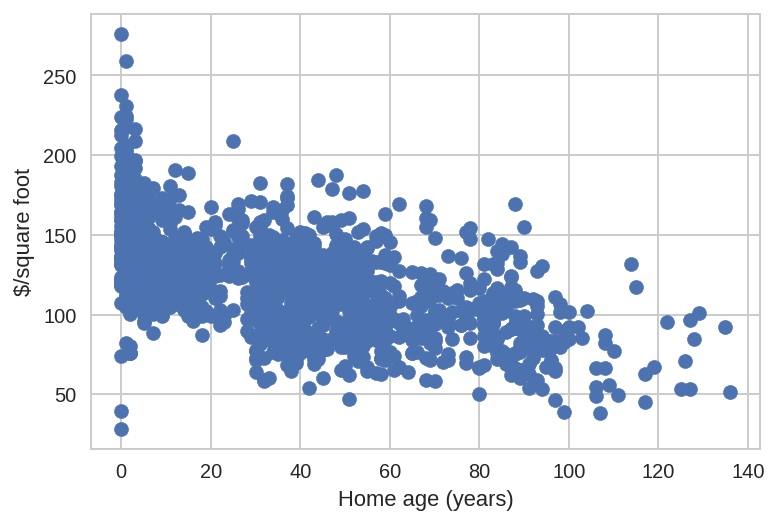

In [15]:
house_df['Age'] = house_df['YrSold'] - house_df['YearBuilt']
plt.scatter(house_df['Age'], house_df['PSF'])
plt.ylabel('$/square foot')
plt.xlabel('Home age (years)')
plt.show()

# Price per square foot, by neighborhood
Location matters. Data from 2009, the year of highest volume of sales, is used in order to reduce the influence of varying market conditions across years.

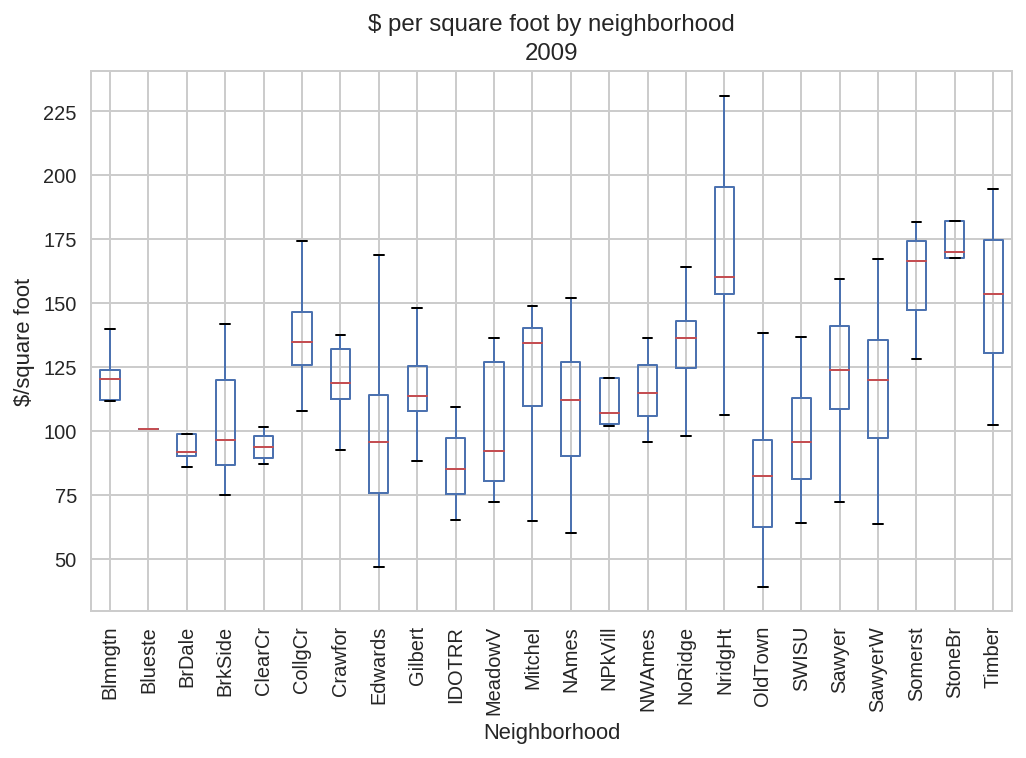

In [16]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['Neighborhood'], figsize=(8,5), rot=90)
plt.suptitle('$ per square foot by neighborhood')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Neighborhood')
plt.show()

# Price per square foot, by building type
Single family dwellings and townhome end units sold at higher prices per square foot.

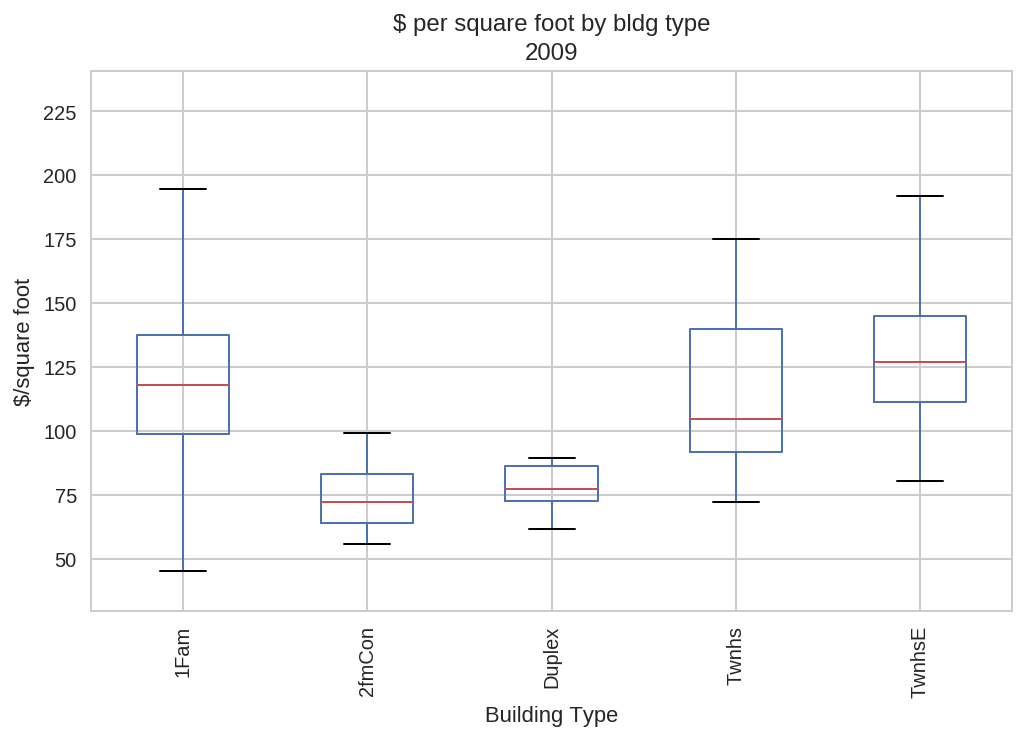

In [17]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['BldgType'], figsize=(8,5), rot=90)
plt.suptitle('$ per square foot by bldg type')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Building Type')
plt.show()

# Price per square foot, by number of bedrooms
All else being equal, homes in larger size categories typically sell for lower psf - the boxplot may reflect this.



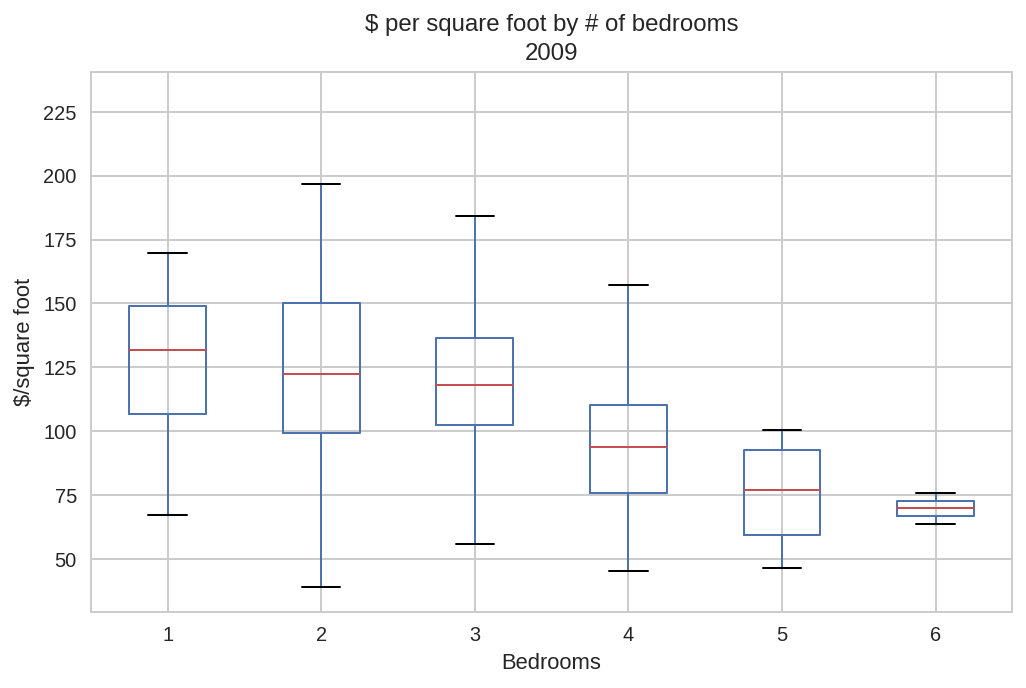

In [18]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['BedroomAbvGr'], figsize=(8,5))
plt.suptitle('$ per square foot by # of bedrooms')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Bedrooms')
plt.show()

# Price per square foot, by overall quality
Sales price appears to reflect quality to some degree.

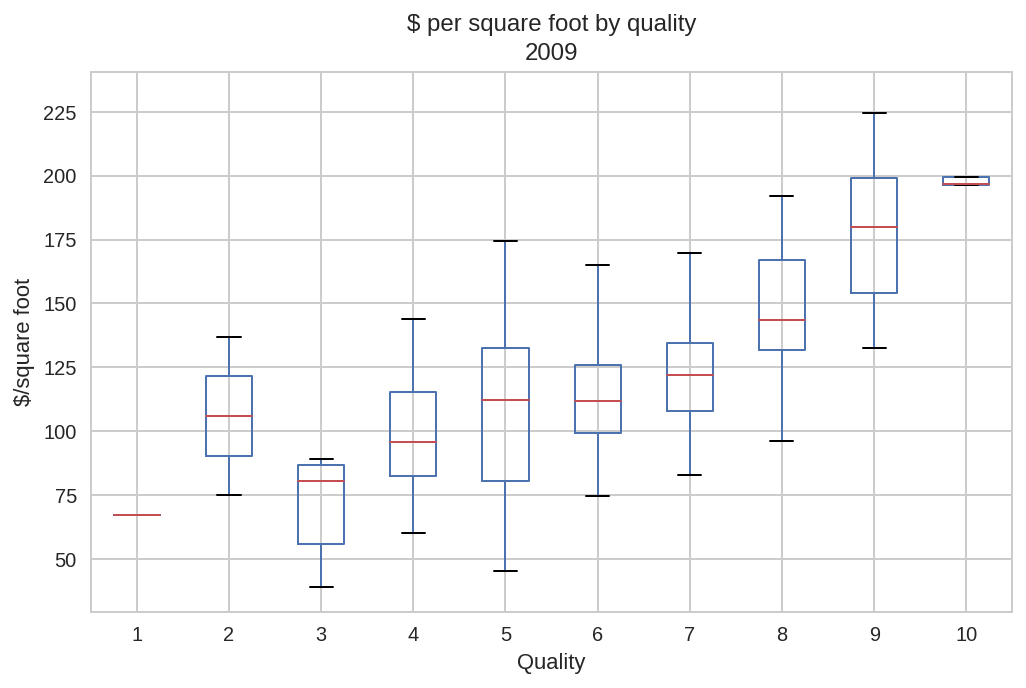

In [19]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['OverallQual'], figsize=(8,5))
plt.suptitle('$ per square foot by quality')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Quality')
plt.show()

# Price per square foot, by overall condition
The influence of overall condition is evident to a lesser degree.

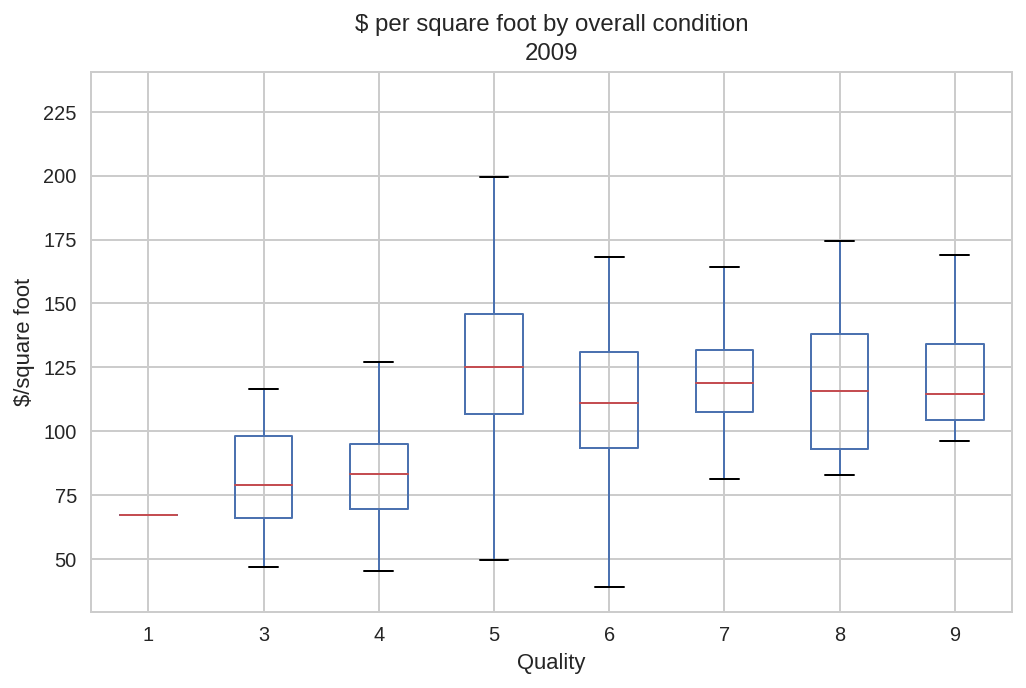

In [20]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['OverallCond'], figsize=(8,5))
plt.suptitle('$ per square foot by overall condition')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Quality')
plt.show()

# Price per square foot, by functionality rating
The functionality rating of most homes was considered typical. The limited data reflects expected lower prices for homes with inferior ratings.

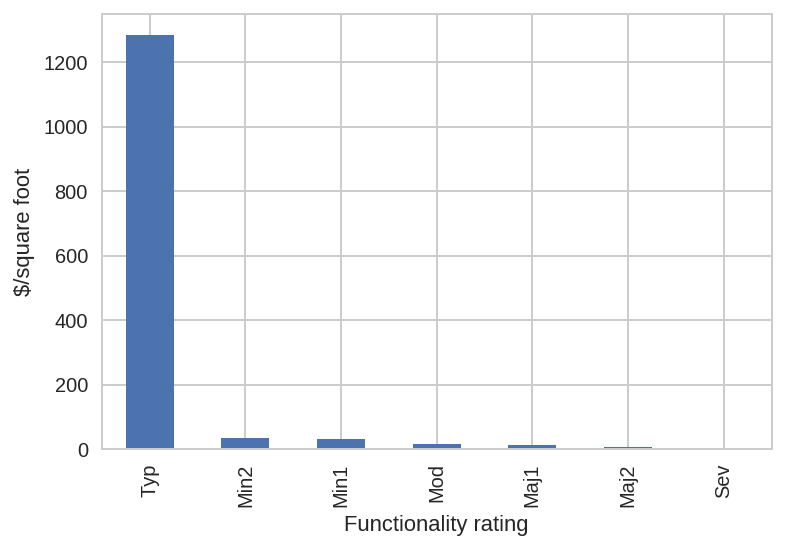

In [21]:
house_df['Functional'].value_counts().plot(kind='bar')
plt.ylabel('$/square foot')
plt.xlabel('Functionality rating')
plt.show()

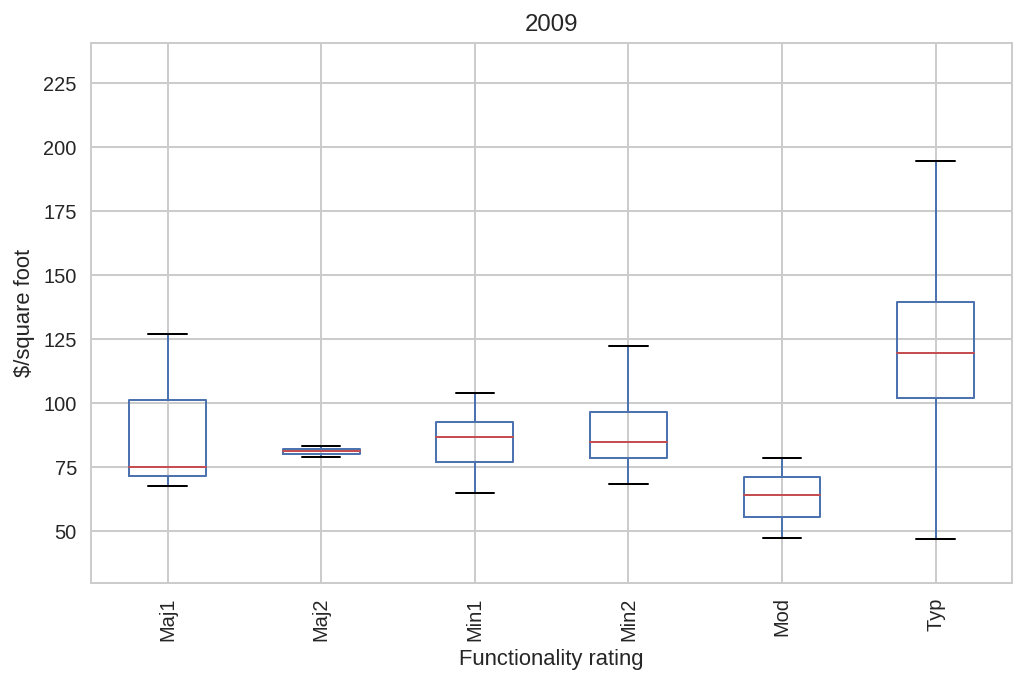

In [22]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['Functional'], figsize=(8,5), rot=90)
plt.suptitle('')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Functionality rating')
plt.show()

# Price per square foot, by sale condition
Most sales are considered normal. It appears that partial sales have higher per square foot prices.

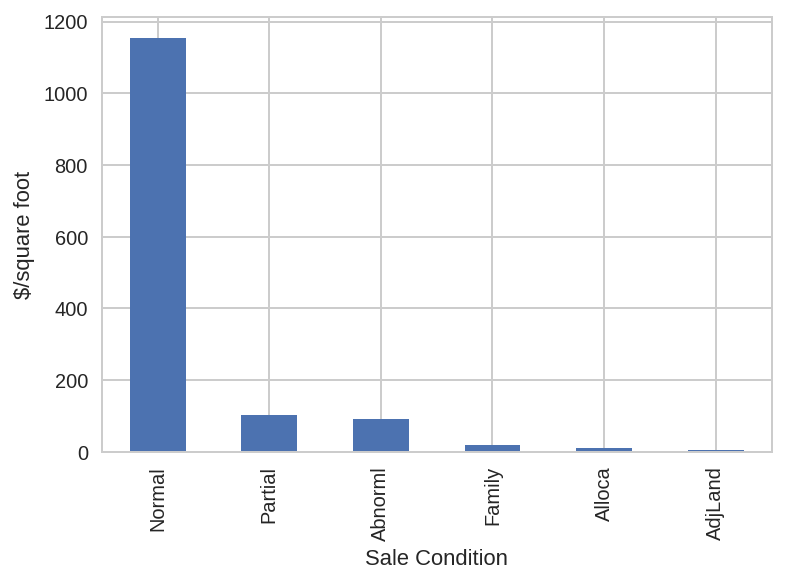

In [23]:
house_df['SaleCondition'].value_counts().plot(kind='bar')
plt.ylabel('$/square foot')
plt.xlabel('Sale Condition')
plt.show()

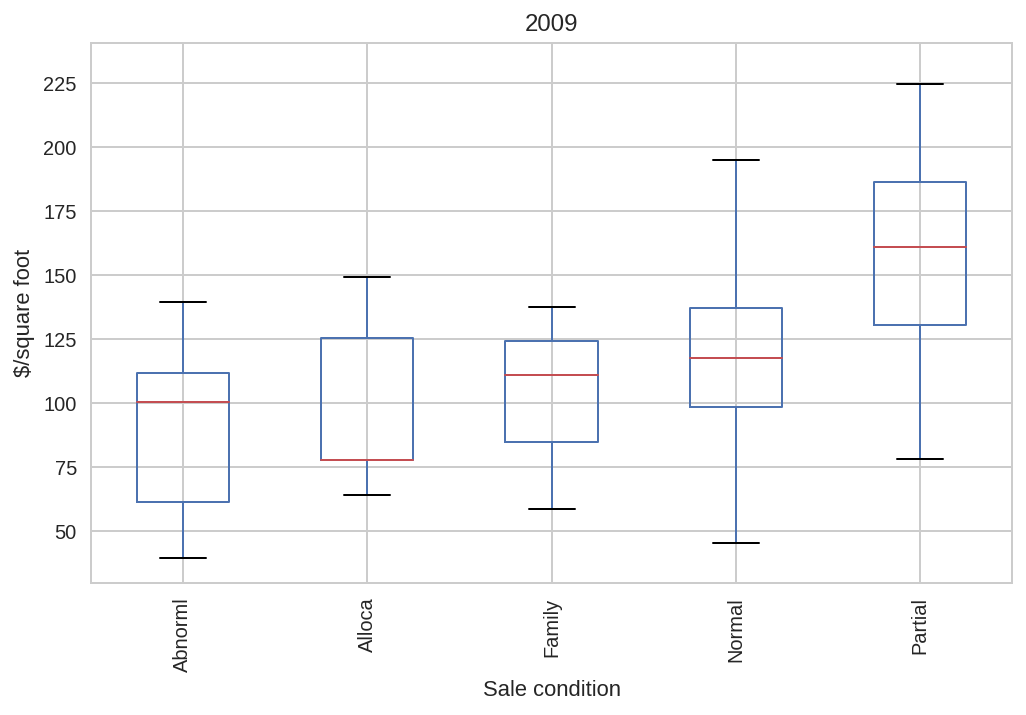

In [24]:
house_df[house_df["YrSold"]== 2009].boxplot(column=['PSF'], by=['SaleCondition'], figsize=(8,5), rot=90)
plt.suptitle('')
plt.title('2009')
plt.ylabel('$/square foot')
plt.xlabel('Sale condition')
plt.show()

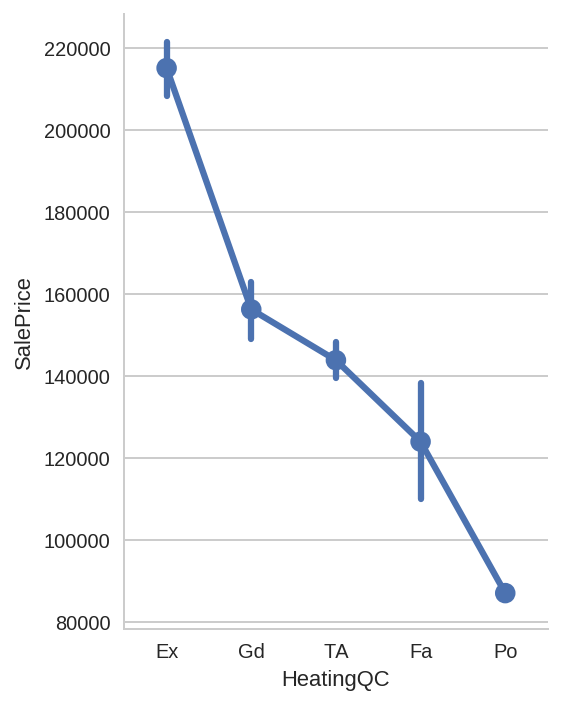

In [188]:
sns.factorplot(x="HeatingQC", y="SalePrice", data=house_df,size=5, aspect=.8)

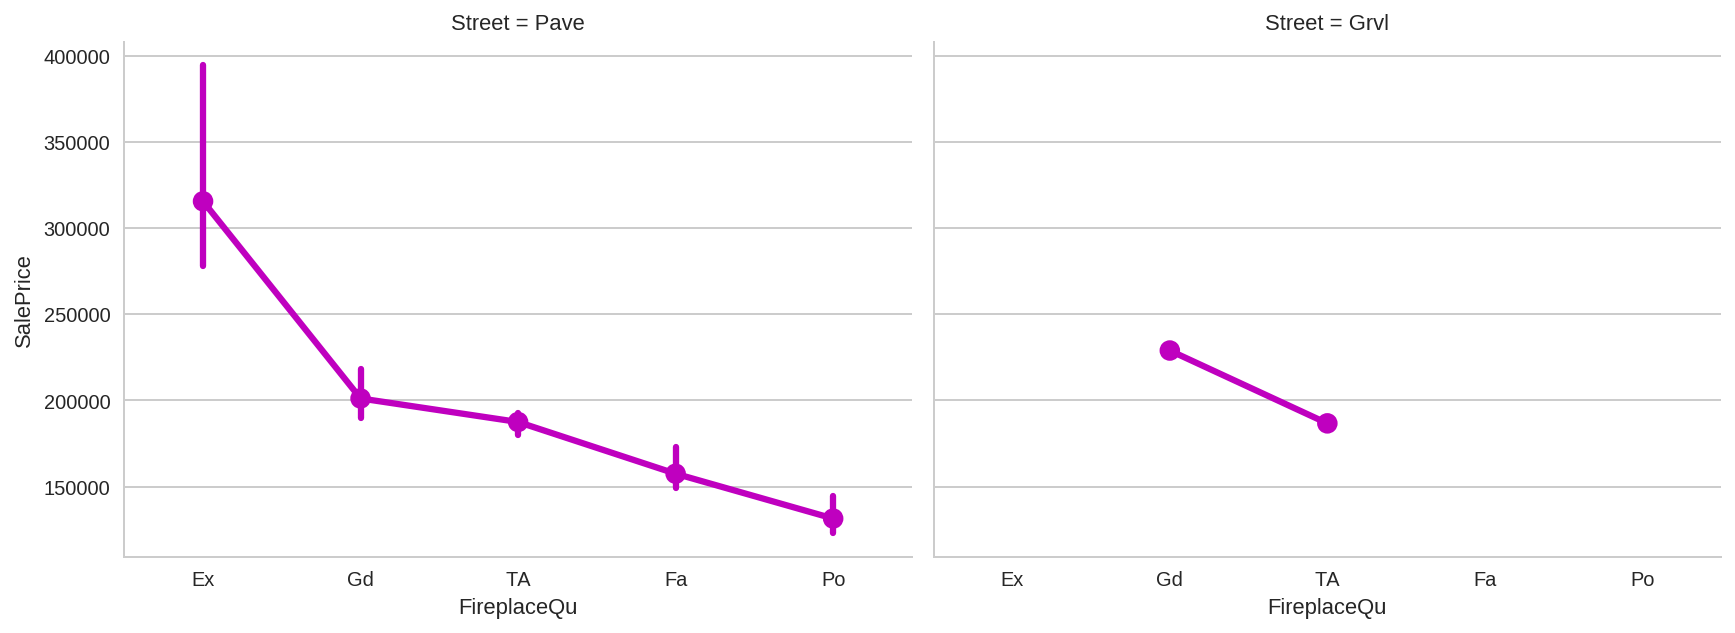

In [190]:
sns.factorplot('FireplaceQu', 'SalePrice', data = house_df, color = 'm',col = "Street", \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

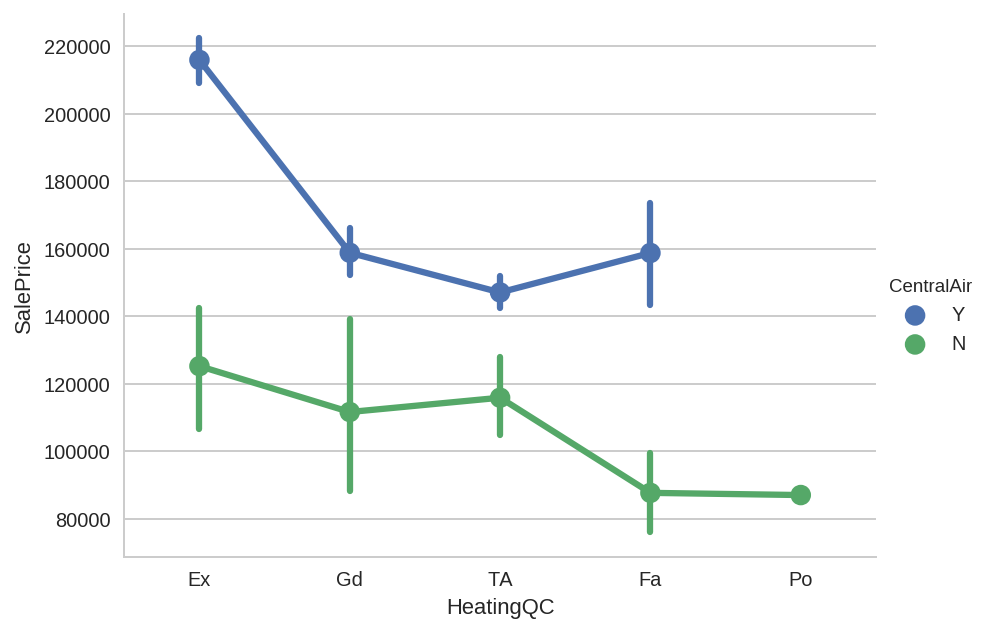

In [191]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = house_df, 
             size = 4.5, aspect = 1.4)

In [192]:
#Heating
pd.crosstab(house_df.HeatingQC, house_df.CentralAir)

CentralAir,N,Y
HeatingQC,,
Ex,7,674
Fa,24,25
Gd,13,220
Po,1,0
TA,44,377


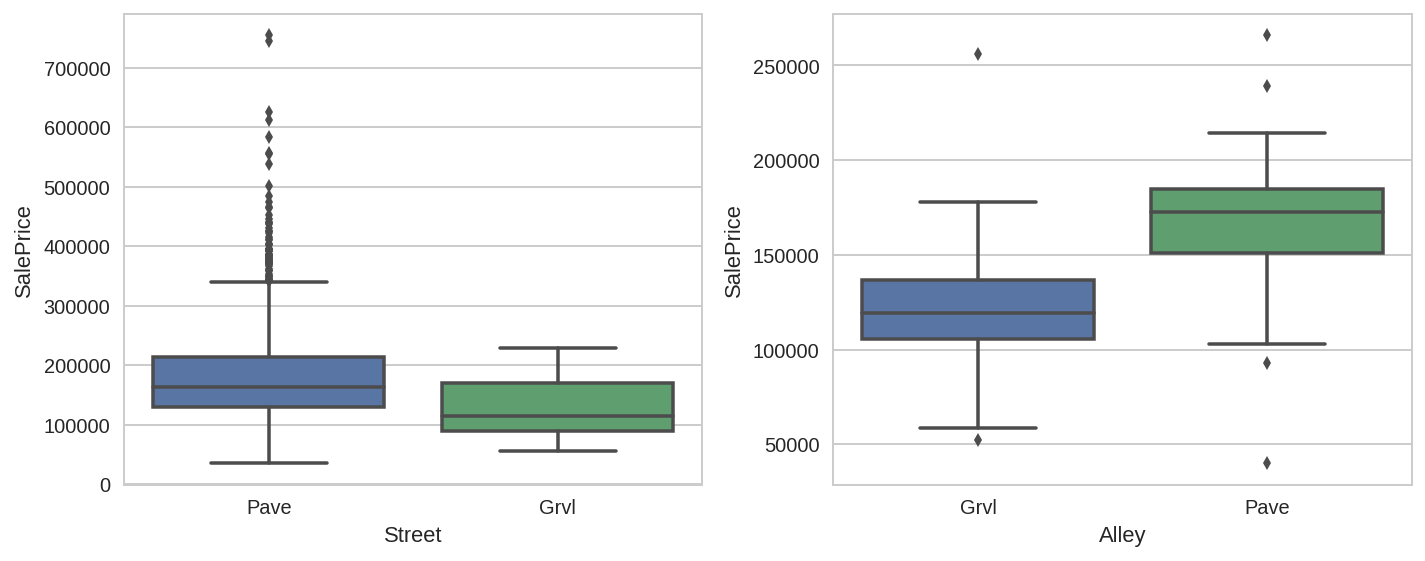

In [194]:
#Street & Alley Access
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = house, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = house, ax = ax[1])
plt.tight_layout()

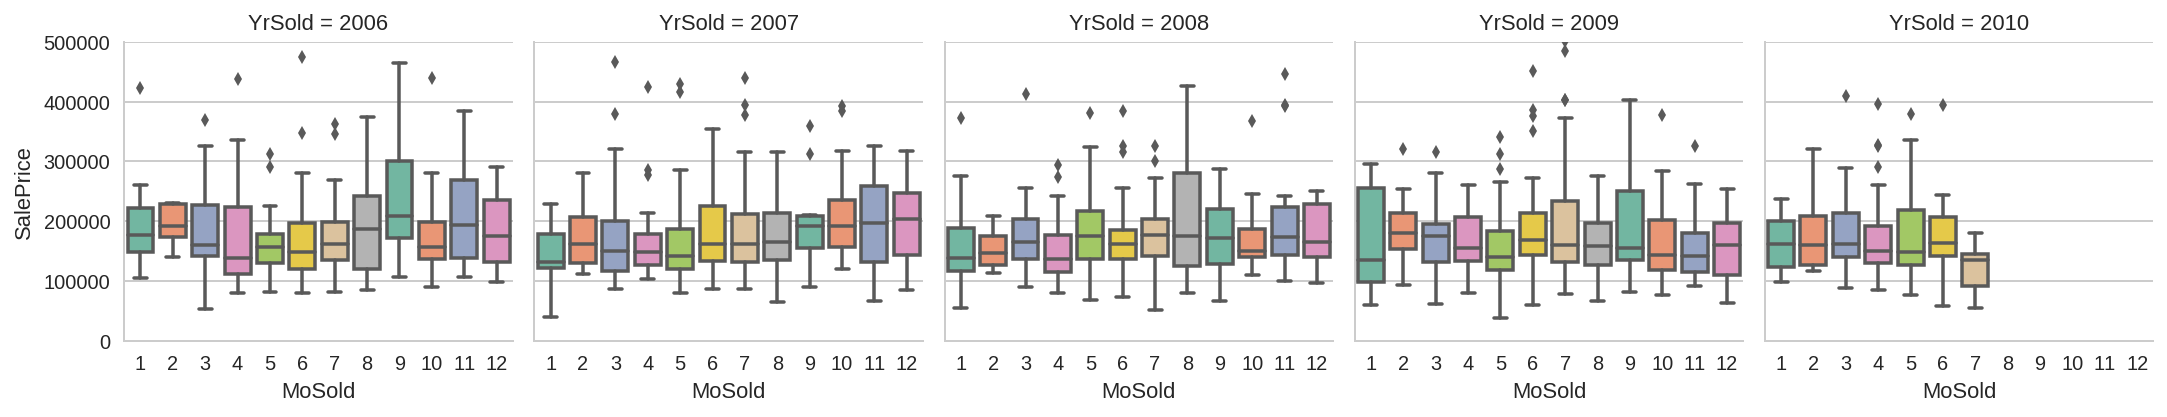

In [196]:
g = sns.FacetGrid(house_df, col = 'YrSold', col_wrap = 6)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13))\
.set(ylim = (0, 500000))
plt.tight_layout()

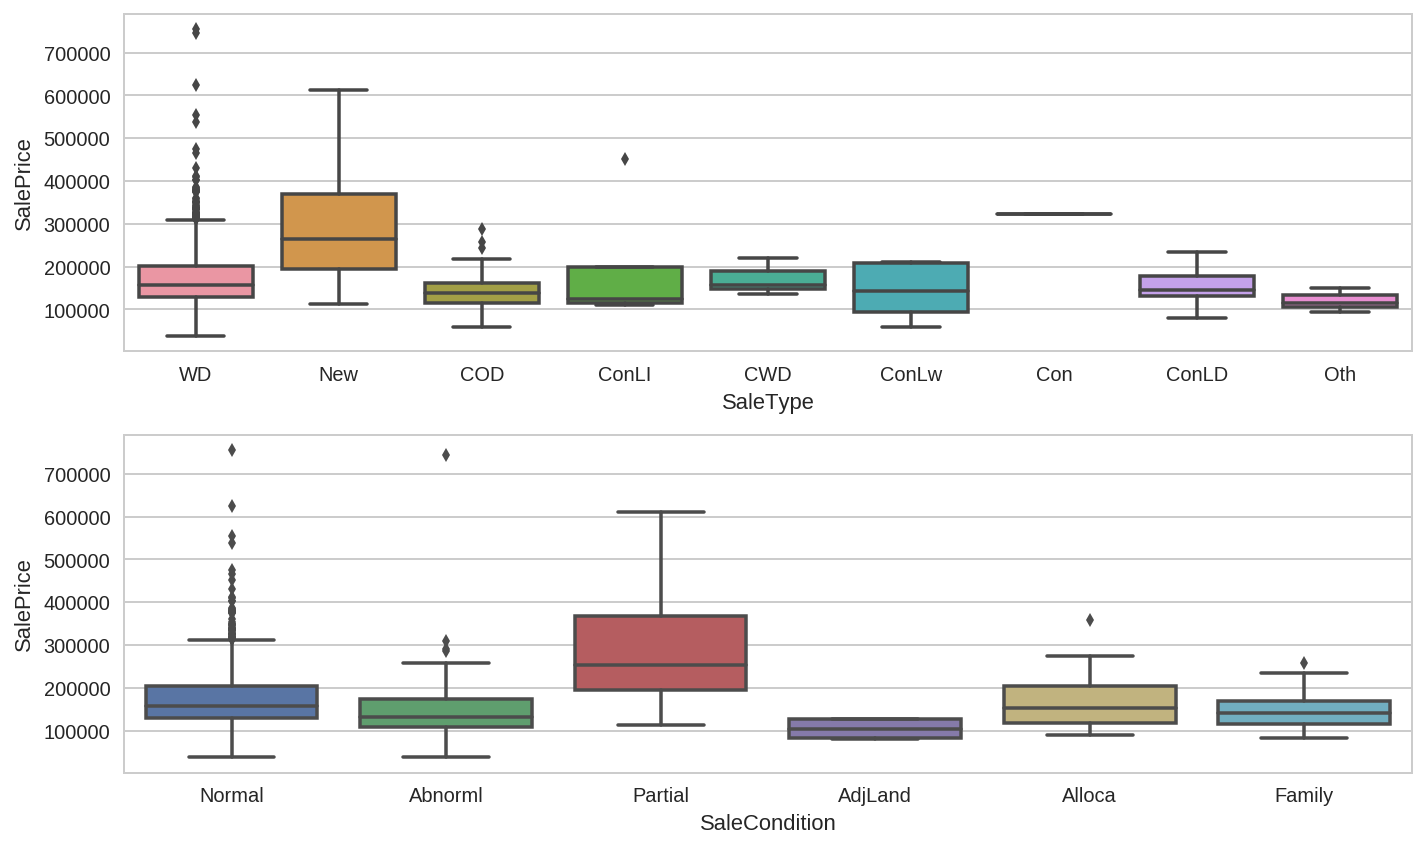

In [197]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = house_df, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house_df, ax = ax[1])
plt.tight_layout()

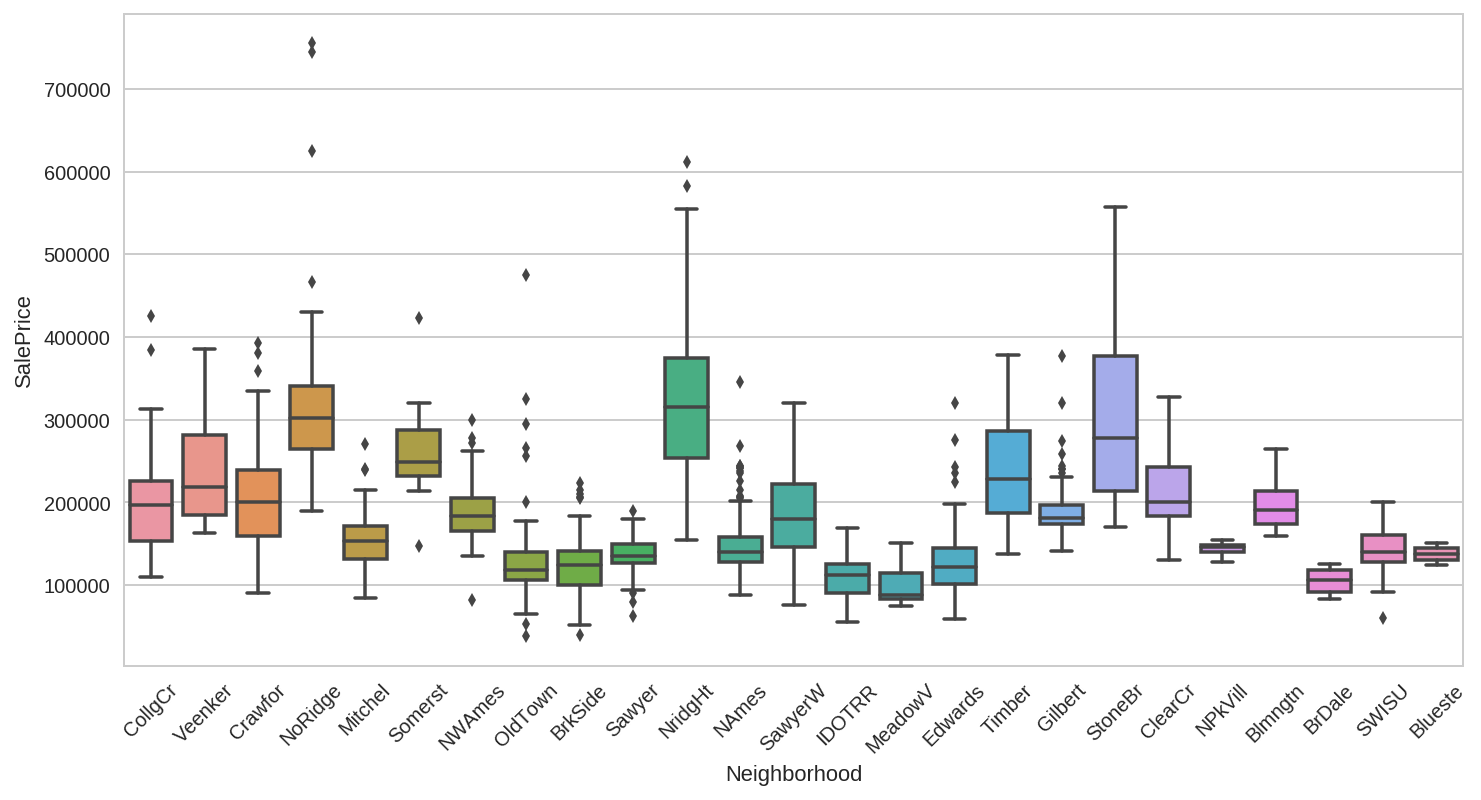

In [198]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = house_df)
xt = plt.xticks(rotation=45)

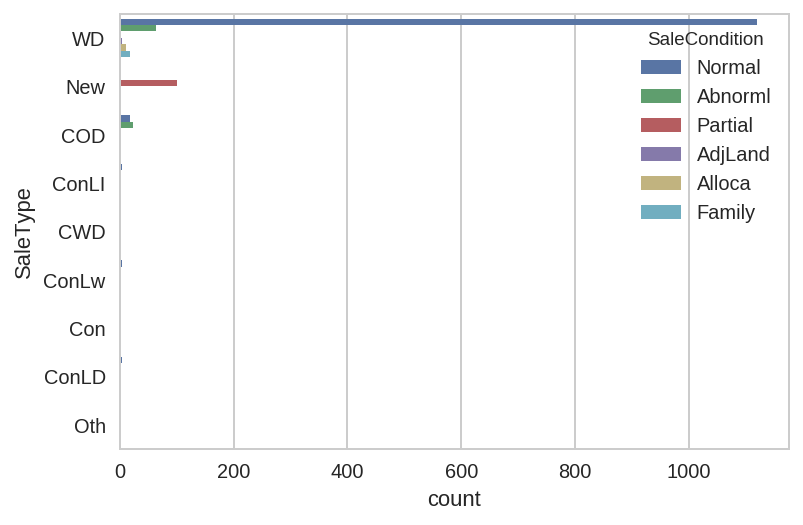

In [200]:
#Show value counts for two categorical variables:
ax = sns.countplot(y="SaleType", hue="SaleCondition", data=house_df)

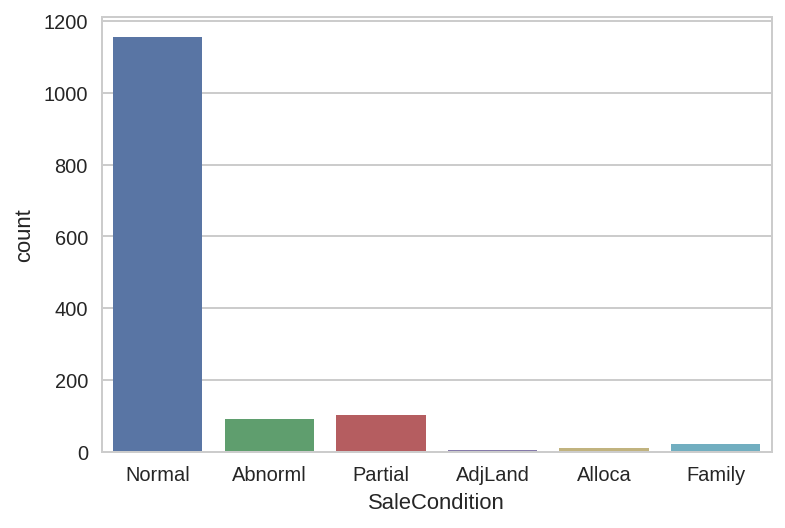

In [202]:
# Show value counts for a single categorical variable:
ax = sns.countplot(x="SaleCondition", data=house_df)

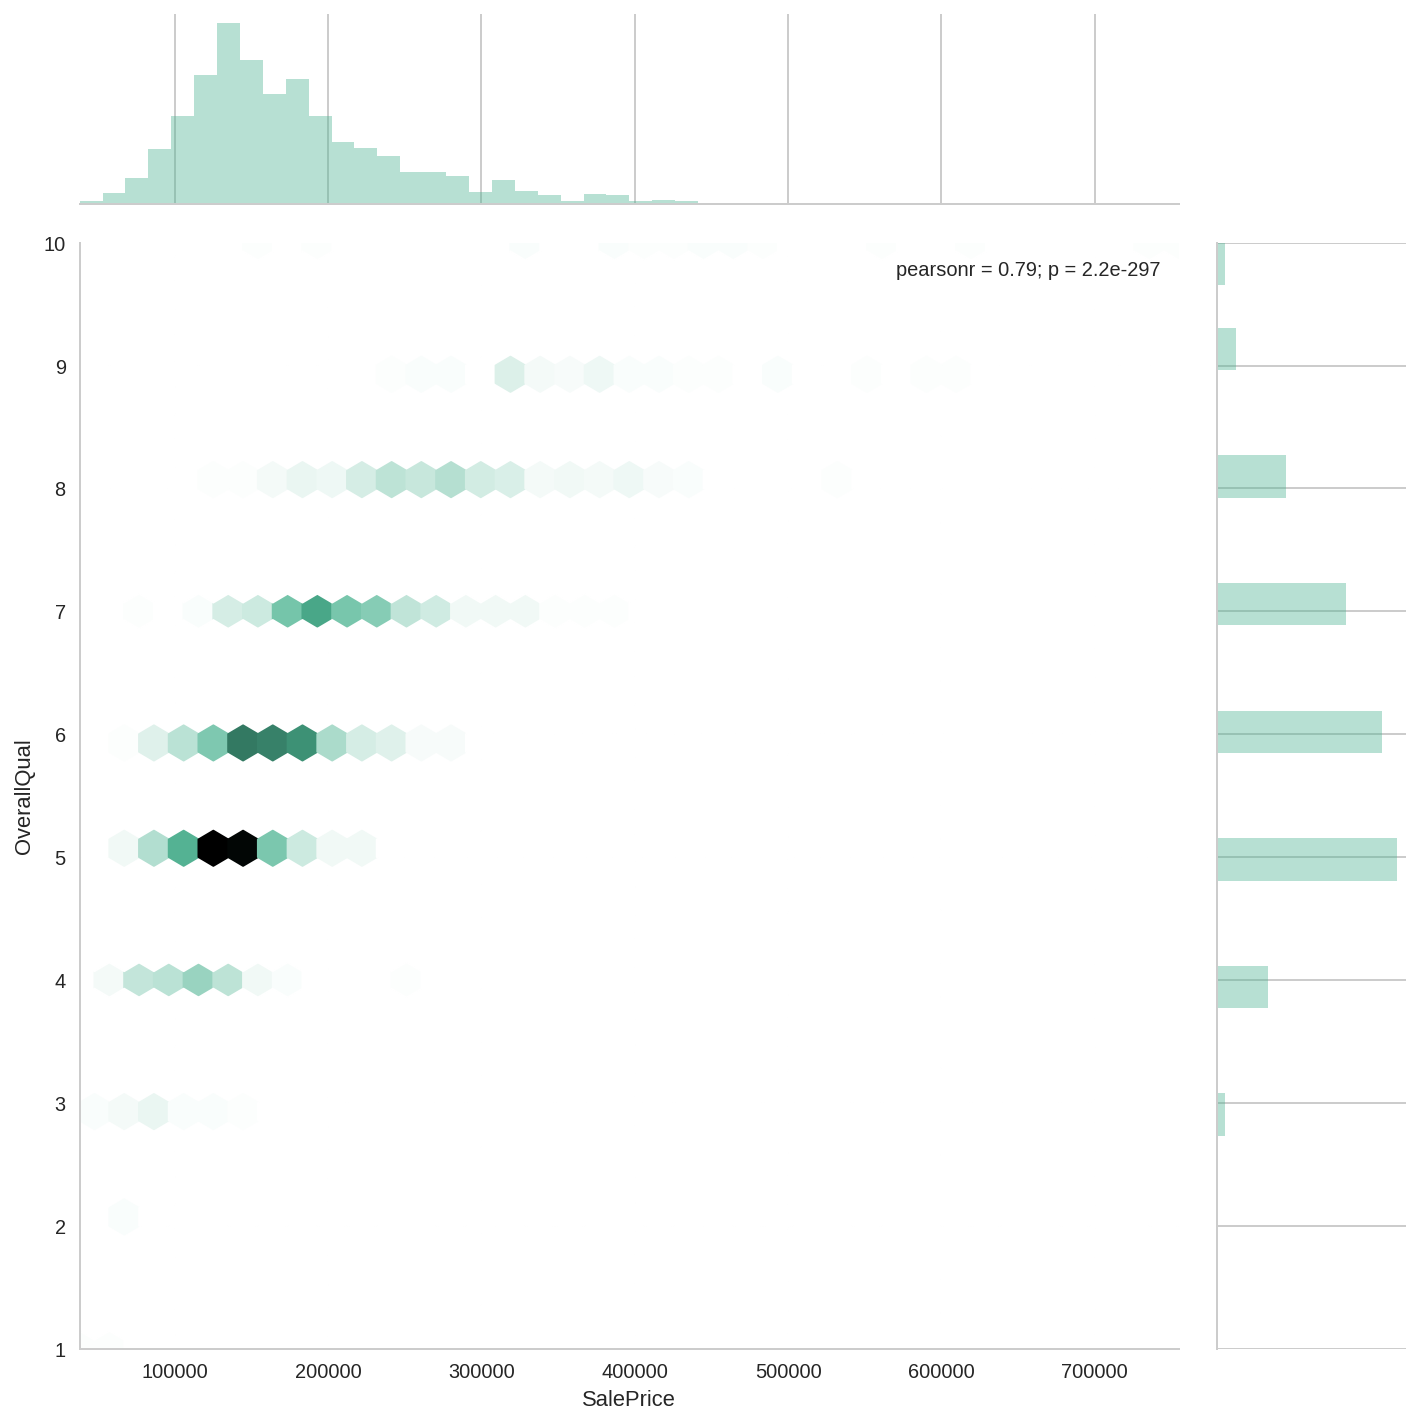

In [204]:
sns.jointplot(x="SalePrice", y="OverallQual", data=house_df, size=10, kind="hex", color="#4CB391")

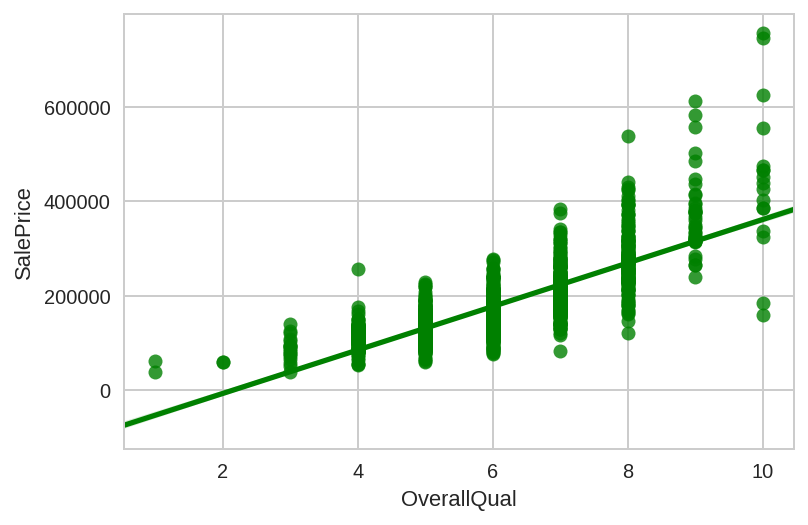

In [205]:
#Plot data and a linear regression model fit.
#Use a 68% confidence interval, which corresponds with the standard error of the estimate:
ax = sns.regplot(x = 'OverallQual', y = 'SalePrice', data = house_df, color = 'Green',ci=68)

In [4]:
# A:

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

# Solution 3

In [88]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [89]:
X_3 = house_df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SalePrice', 'PSF',
       'Age']]

In [90]:
y_3 = house_df['SaleCondition']

    y_3 = house_df['SaleCondition'] == 'Abnormal'

In [91]:
[X_3.isnull().sum()] 

[MSSubClass          0
 MSZoning            0
 LotFrontage         0
 LotArea             0
 Street              0
 LotShape            0
 LandContour         0
 Utilities           0
 LotConfig           0
 LandSlope           0
 Neighborhood        0
 Condition1          0
 Condition2          0
 BldgType            0
 HouseStyle          0
 OverallQual         0
 OverallCond         0
 YearBuilt           0
 YearRemodAdd        0
 RoofStyle           0
 RoofMatl            0
 Exterior1st         0
 Exterior2nd         0
 MasVnrType          5
 MasVnrArea          5
 ExterQual           0
 ExterCond           0
 Foundation          0
 BsmtQual           37
 BsmtCond           37
                  ... 
 KitchenAbvGr        0
 KitchenQual         0
 TotRmsAbvGrd        0
 Functional          0
 Fireplaces          0
 FireplaceQu       641
 GarageType         79
 GarageYrBlt        79
 GarageFinish       79
 GarageCars          0
 GarageArea          0
 GarageQual         79
 GarageCond

In [92]:
X_3_nonan = X_3.astype(object).replace(np.nan, 'None')


In [93]:
#X_3_nonan.info().sum()

In [94]:
X_3_dummies = pd.get_dummies(X_3_nonan , dummy_na=True)

In [95]:
X_train_3,X_test_3,  y_train_3, y_test_3 = train_test_split(X_3_dummies,y_3, random_state=42)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [98]:
neigh.fit(X_train_3, y_train_3) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [99]:
neigh.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')>

In [100]:
y_pred_knn = neigh.predict(X_test_3)

In [101]:
neigh.score(X_train_3, y_train_3)

0.8574181117533719

In [102]:
neigh.score(X_test_3, y_test_3)

0.81268011527377526

In [103]:
neigh.predict_proba(X_test_3)

array([[ 0.33333333,  0.        ,  0.        ,  0.        ,  0.66666667,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ]])

In [104]:
features = [X_train_3.columns]

k_range  = range(1, 31)
scores   = [] # we will capture our scores here

for k in k_range:
    knn    =  KNeighborsClassifier(n_neighbors=k)
    model  =  knn.fit(X_train_3, y_train_3)
    
    scores.append({
         'k':        k,
         'features': features,
         'train_score':    model.score(X_train_3, y_train_3),
         'test_score':    model.score(X_test_3, y_test_3)
    })
    
scores = pd.DataFrame(scores)
scores.head()

,features,k,test_score,train_score
0,"[[MSSubClass, LotFrontage, LotArea, OverallQua...",1,0.711816,1.000000
1,"[[MSSubClass, LotFrontage, LotArea, OverallQua...",2,0.700288,0.863198
2,"[[MSSubClass, LotFrontage, LotArea, OverallQua...",3,0.812680,0.857418
3,"[[MSSubClass, LotFrontage, LotArea, OverallQua...",4,0.821326,0.855491
4,"[[MSSubClass, LotFrontage, LotArea, OverallQua...",5,0.824207,0.847784


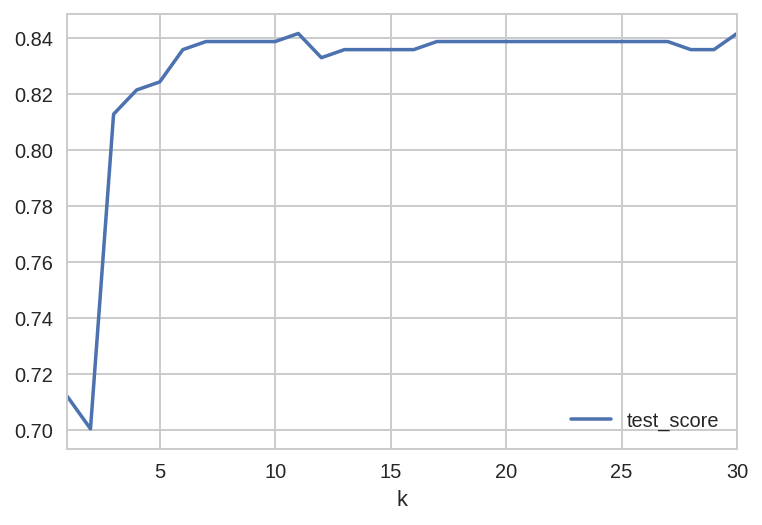

In [105]:
scores.plot(x="k", y="test_score")

In [106]:
from sklearn.cross_validation import StratifiedKFold
cv_indices = StratifiedKFold(y_train_3, n_folds=5)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


In [107]:
def accuracy_crossvalidator(X, Y, knn, cv_indices):
    
    # list to store the scores/accuracy of folds
    scores = []
    
    # iterate through the training and testing folds in cv_indices
    for fold_n, (train_i, test_i) in enumerate(cv_indices):
        
        # get the current X train & test subsets of X
        X_train = X.iloc[train_i, :]
        X_test = X.iloc[test_i, :].values

        # get the Y train & test subsets of Y
        Y_train = Y.iloc[train_i]
        Y_test = Y.iloc[test_i]

        # fit the knn model on the training data
        model = knn.fit(X_train, Y_train)
        
        # get the accuracy predicting the testing data
        score = model.score(X_test, Y_test)
        scores.append(score)
        
        print('Fold %d accuracy:' % fold_n, score)
        
    print('Mean CV accuracy:', np.mean(scores))

In [108]:
mean_knn_n5 = KNeighborsClassifier(n_neighbors=5,
                                   weights='uniform')

accuracy_crossvalidator(X_train_3, y_train_3, mean_knn_n5, cv_indices)

Fold 0 accuracy: 0.804761904762
Fold 1 accuracy: 0.802884615385
Fold 2 accuracy: 0.841346153846
Fold 3 accuracy: 0.821256038647
Fold 4 accuracy: 0.834146341463
Mean CV accuracy: 0.820879010821


In [109]:
mean_knn_n2 = KNeighborsClassifier(
    n_neighbors=10,       # The parameter K for number of neighbors
    weights='uniform'    # How votes are calculated per neighborhood for predicted points
)

accuracy_crossvalidator(X_train_3, y_train_3, mean_knn_n2, cv_indices)

Fold 0 accuracy: 0.819047619048
Fold 1 accuracy: 0.841346153846
Fold 2 accuracy: 0.836538461538
Fold 3 accuracy: 0.835748792271
Fold 4 accuracy: 0.848780487805
Mean CV accuracy: 0.836292302902


### Summary : KNN classifier did poorly. Trying Random Forest Classifier.

# Random Forest Classifier.

In [110]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2)
clf.fit(X_train_3, y_train_3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [111]:
clf.score(X_train_3, y_train_3)

0.99132947976878616

In [112]:
clf.score(X_test_3, y_test_3)

0.90489913544668588

In [113]:
y_pred_3 = clf.predict(X_test_3)

### Adding y_pred_3 to a copy of X_test_3 for visualizing

In [114]:
cp_X_test_3 = X_test_3

In [115]:
cp_X_test_3['SaleCondition'] = y_test_3
cp_X_test_3['y_pred_3'] = y_pred_3

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


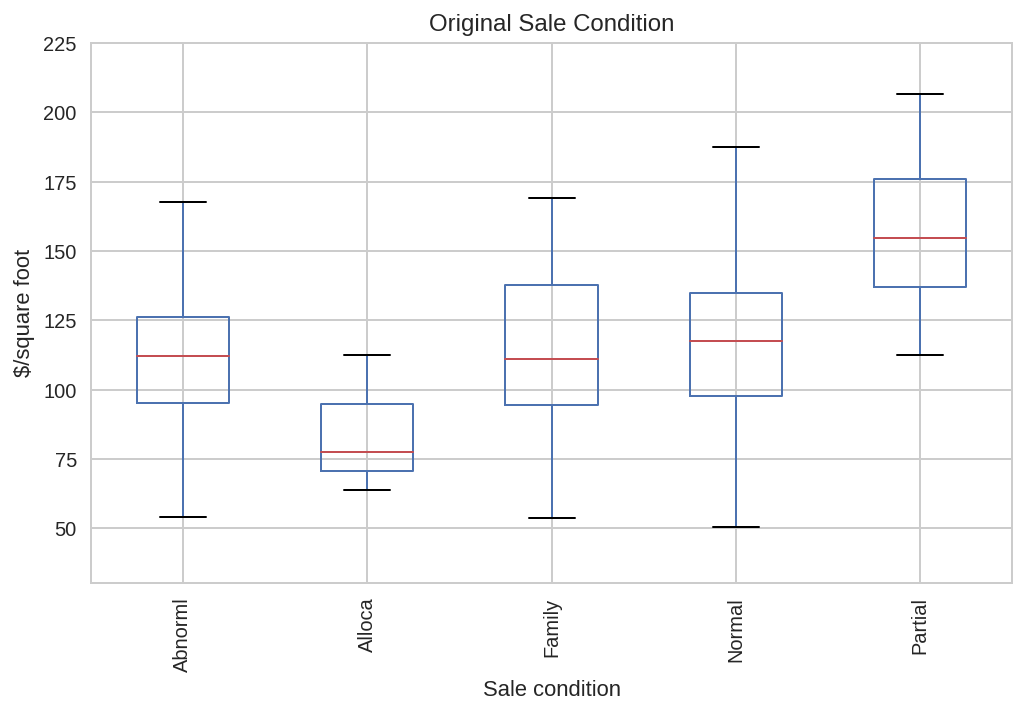

In [116]:
cp_X_test_3.boxplot(column=['PSF'], by=['SaleCondition'], figsize=(8,5), rot=90)
plt.suptitle('')
plt.title('Original Sale Condition')
plt.ylabel('$/square foot')
plt.xlabel('Sale condition')
plt.show()

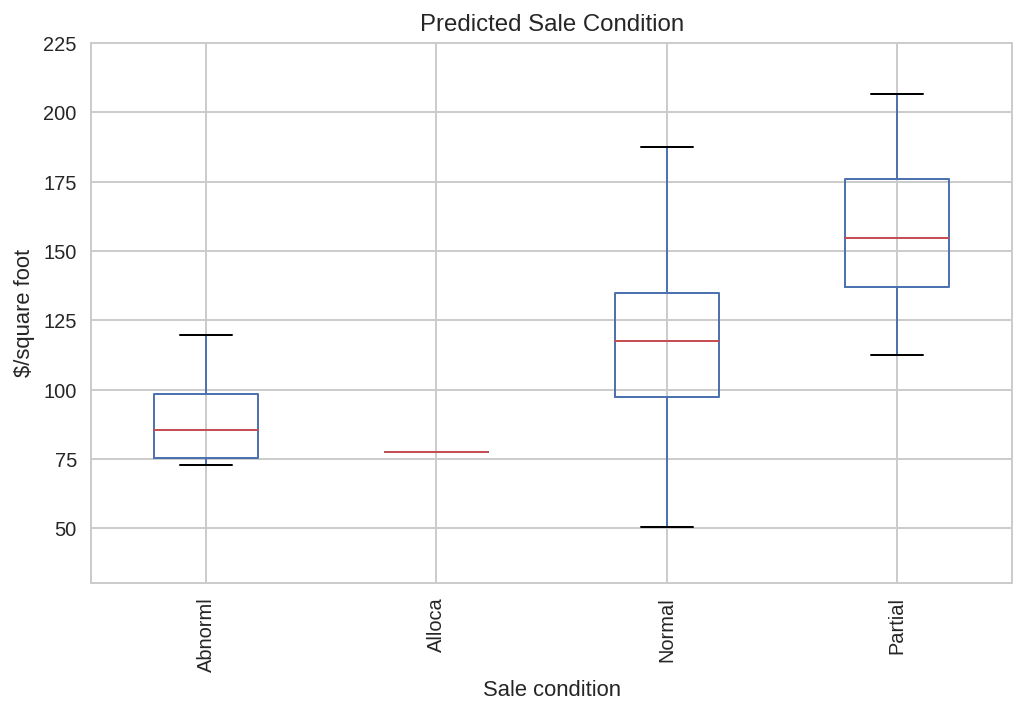

In [117]:
cp_X_test_3.boxplot(column=['PSF'], by=['y_pred_3'], figsize=(8,5), rot=90)
plt.suptitle('')
plt.title('Predicted Sale Condition')
plt.ylabel('$/square foot')
plt.xlabel('Sale condition')
plt.show()

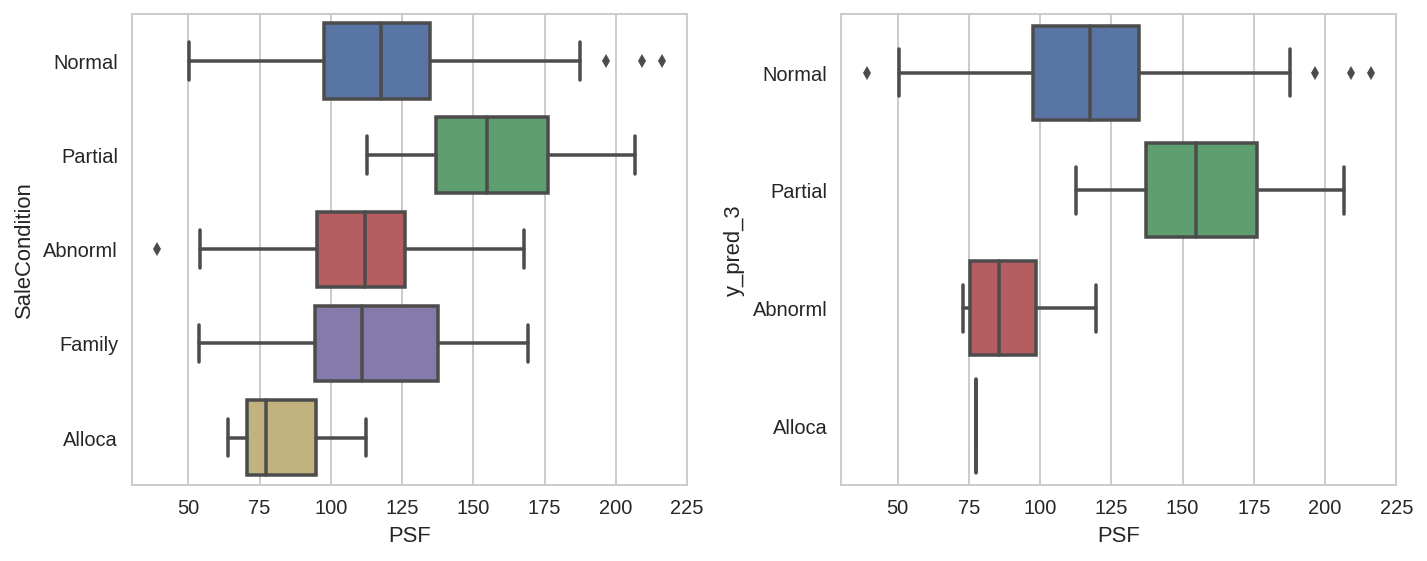

In [118]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'PSF', y = 'SaleCondition', data = cp_X_test_3, ax = ax[0])
sns.boxplot(x = 'PSF', y = 'y_pred_3', data = cp_X_test_3, ax = ax[1])
plt.tight_layout()

With multiclass classification, always good to look at the confusion matrix and classification report

In [119]:
clf.criterion

'gini'

In [120]:
clf_feature_importances = clf.feature_importances_

In [121]:
clf_feature_imp = list(zip(X_train_3, clf_feature_importances))

In [122]:
clf_feature_imp = pd.DataFrame(clf_feature_imp)
clf_feature_imp.rename(columns={1:'importance',0:'column'}, inplace=True)
clf_feature_imp = clf_feature_imp.sort(columns='importance', ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  This is separate from the ipykernel package so we can avoid doing imports until


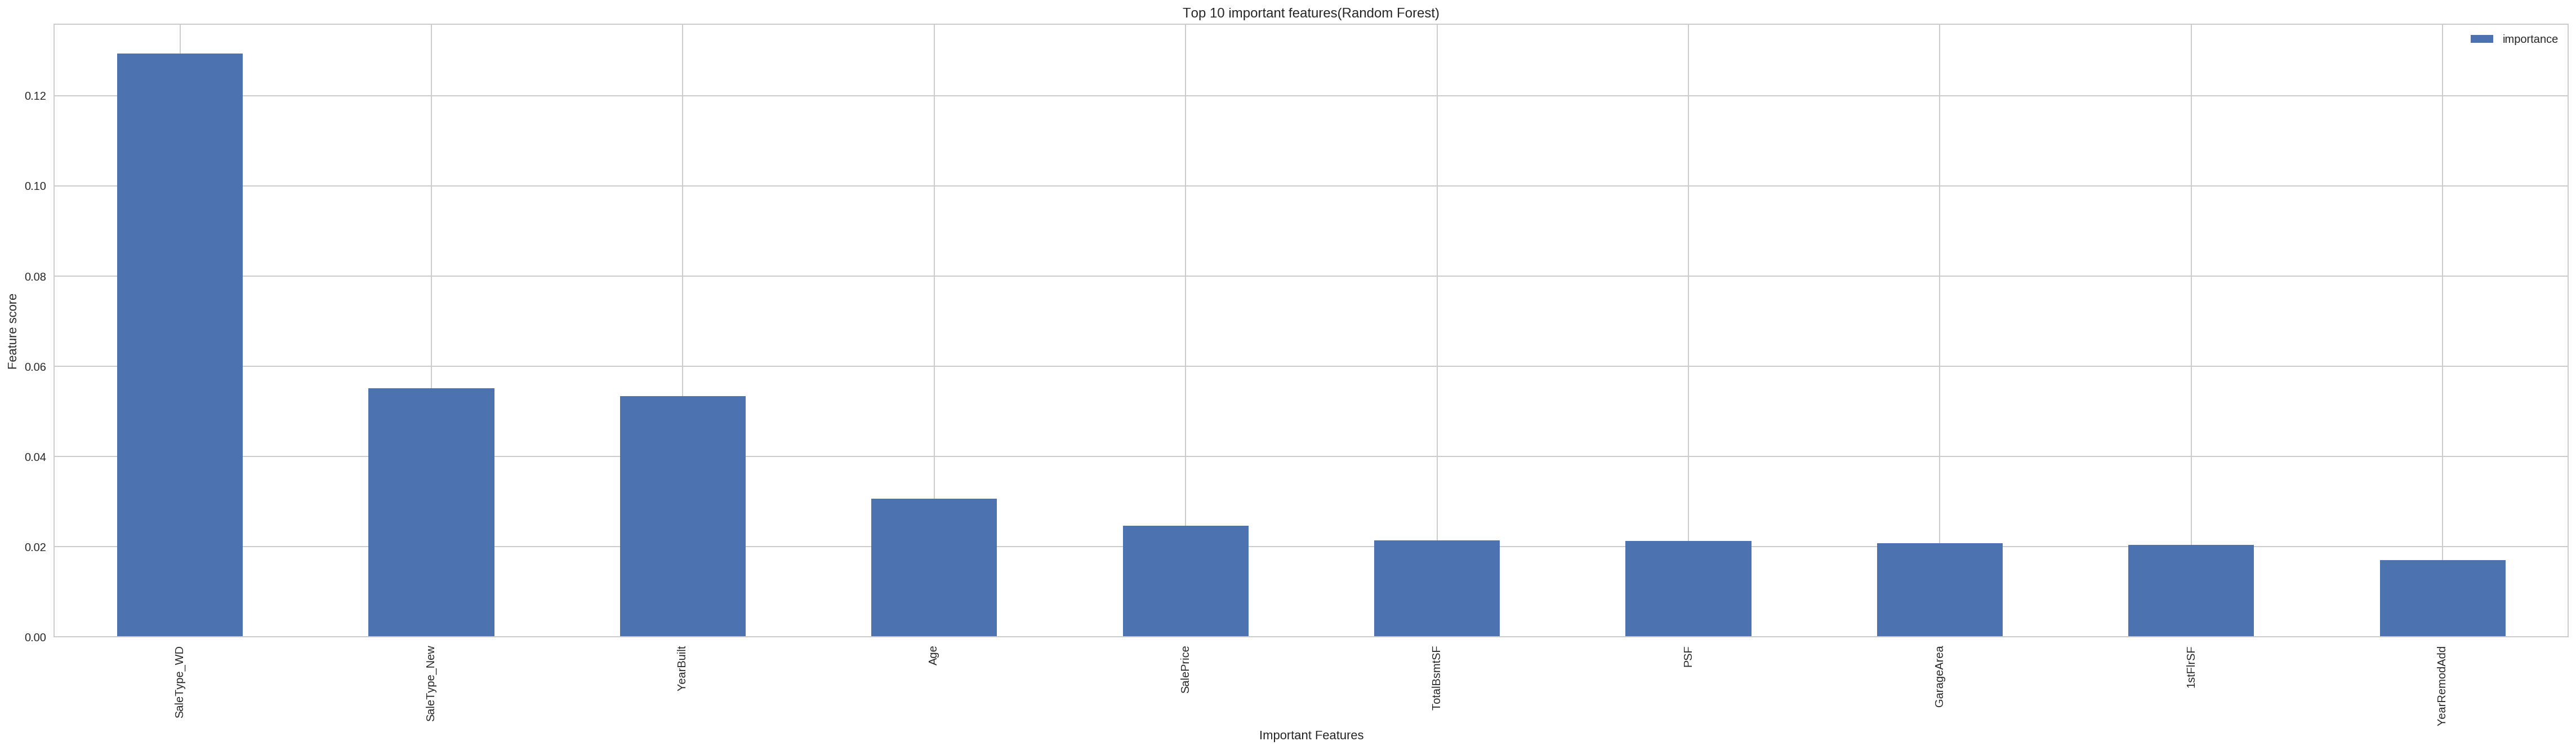

In [123]:
clf_feature_imp.head(10).plot.bar('column','importance', figsize=(40,10))
plt.title('Top 10 important features(Random Forest)')
plt.xlabel('Important Features')
plt.ylabel('Feature score')
plt.show()

In [124]:
clf_feature_imp.head(20)

,column,importance
751,SaleType_WD,0.129309
749,SaleType_New,0.055163
5,YearBuilt,0.053371
36,Age,0.030635
34,SalePrice,0.024668
10,TotalBsmtSF,0.021357
35,PSF,0.021264
24,GarageArea,0.020814
11,1stFlrSF,0.020429
6,YearRemodAdd,0.017018


### Solution 3 - Summary

The top 10 important features on SaleCondition are provided above. The predicted abnormal (inferred from box plots above) have gone down. Random Forest Classifier train score is 0.989 and a test score of 0.879

Classification report

Confusion matrix

precision & recall

In [126]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(y_pred_3,y_test_3)

array([[  2,   0,   0,   3,   0],
       [  0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [ 19,   2,   9, 287,   0],
       [  0,   0,   0,   0,  24]])

In [132]:
y_test_3.value_counts()

Normal     290
Partial     24
Abnorml     21
Family       9
Alloca       3
Name: SaleCondition, dtype: int64

In [136]:
len(y_pred_3 == 'Abnorml')

347

In [137]:
###Computing false and true positive rates
#fpr, tpr,_=roc_curve(y_pred_3,y_test_3,pos_label=None,drop_intermediate=False)
#
#import matplotlib.pyplot as plt
#plt.figure()
###Adding the ROC
#plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
###Random FPR and TPR
#plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
###Title and label
#plt.xlabel('FPR')
#plt.ylabel('TPR')
#plt.title('ROC curve')
#plt.show()

In [138]:
#roc_auc_score(y_pred_3,y_test_3)